# INTEGRATE on ESBJERG data

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # #%load_ext autoreload
    # # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True

Notebook detected. Parallel processing is OK


Getting data for case: ESBJERG


Downloaded ESBJERG_ALL.h5
Downloaded README_ESBJERG
--> Got data for case: ESBJERG
Using data file: ESBJERG_ALL.h5
Using GEX file: TX07_20230906_2x4_RC20-33.gex
f_data_h5=ESBJERG_ALL.h5


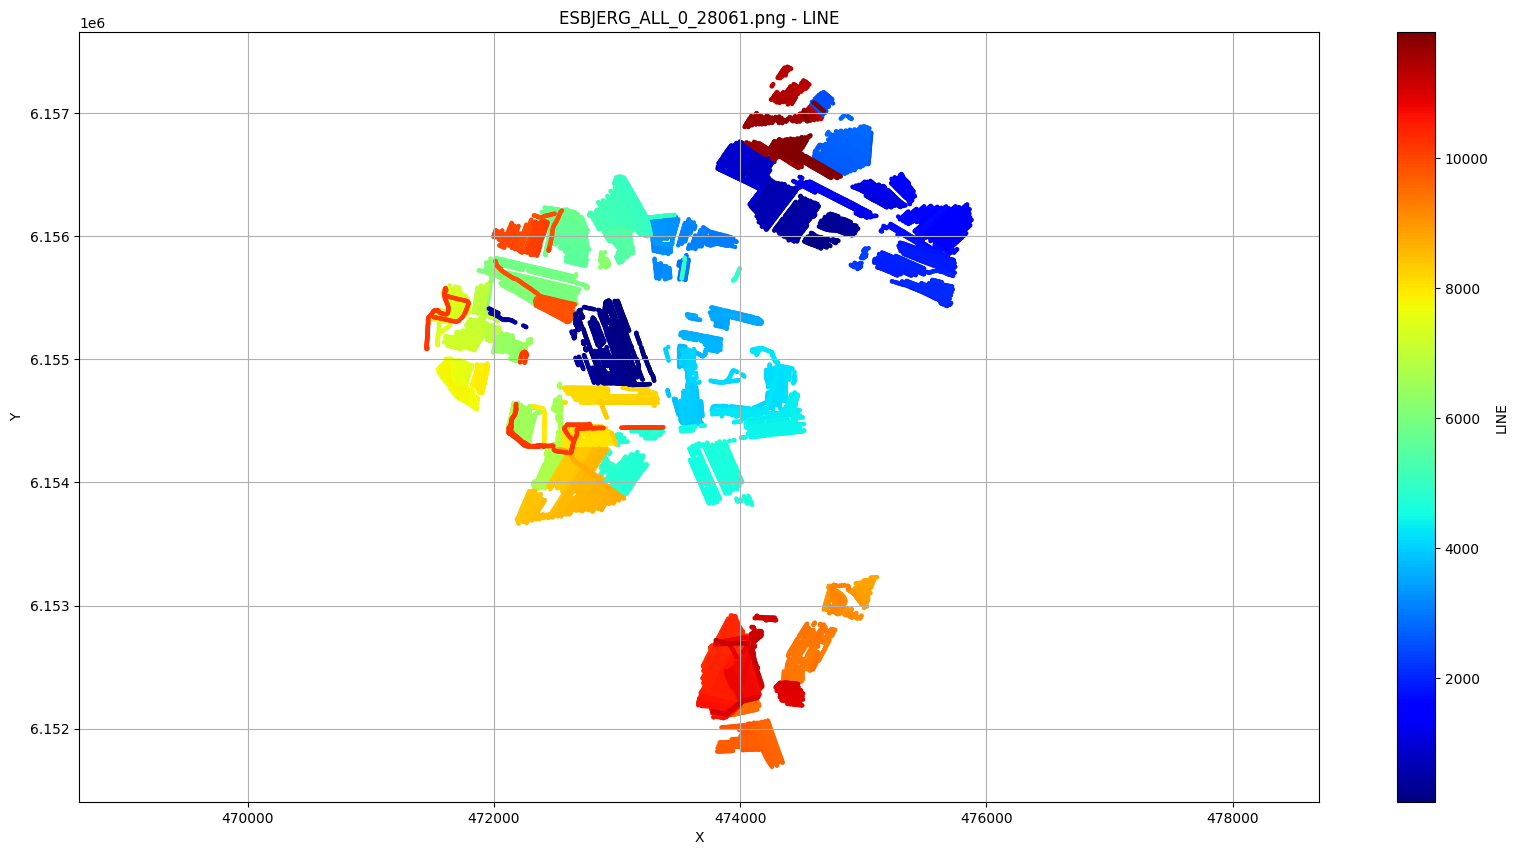

In [3]:
N=5000000
N=50000
case = 'ESBJERG'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

ig.plot_geometry(f_data_h5, pl='LINE')
X, Y, LINE, ELEVATION = ig.get_geometry(f_data_h5)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:

# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=500)
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='uniform', NLAY_min=1, NLAY_max=8, RHO_min=1, RHO_max=500)

# Plot some summary statistics of the prior model
#ig.plot_prior_stats(f_prior_h5)

prior_layered:   0%|                                         | 0/50000 [00:00<?, ?it/s]

prior_layered:   0%|                                         | 0/50000 [00:00<?, ?it/s]

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)

prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   2%|▊                                    | 33/1563 [00:01<00:47, 32.11it/s]

gatdaem1d:   3%|█                                    | 43/1563 [00:01<00:35, 42.71it/s]

gatdaem1d:   3%|█                                    | 43/1563 [00:01<00:35, 42.51it/s]

gatdaem1d:   2%|▊                                    | 34/1563 [00:01<00:45, 33.48it/s]

gatdaem1d:   2%|▊                                    | 32/1563 [00:01<00:49, 31.11it/s]

gatdaem1d:   3%|▉                                    | 42/1563 [00:01<00:36, 41.86it/s]

gatdaem1d:   2%|▋                                    | 31/1562 [00:01<00:49, 30.70it/s]

gatdaem1d:   2%|▋                                    | 31/1562 [00:01<00:49, 30.81it/s]

gatdaem1d:   2%|▊                                    | 32/1563 [00:01<00:48, 31.82it/s]

gatdaem1d:   2%|▊                                    | 32/1562 [00:01<00:48, 31.76it/s]

gatdaem1d:   3%|▉                                    | 41/1563 [00:01<00:37, 40.84it/s]

gatdaem1d:   2%|▋                                    | 31/1563 [00:01<00:50, 30.26it/s]

gatdaem1d:   3%|▉                                    | 42/1563 [00:01<00:36, 41.52it/s]

gatdaem1d:   2%|▋                                    | 31/1563 [00:01<00:51, 29.85it/s]

gatdaem1d:   3%|█                                    | 44/1563 [00:01<00:35, 43.12it/s]

gatdaem1d:   2%|▊                                    | 32/1563 [00:01<00:49, 31.14it/s]

gatdaem1d:   3%|▉                                    | 42/1562 [00:01<00:37, 40.84it/s]

gatdaem1d:   2%|▊                                    | 32/1562 [00:01<00:48, 31.64it/s]

gatdaem1d:   2%|▊                                    | 33/1563 [00:01<00:46, 32.68it/s]

gatdaem1d:   3%|█                                    | 43/1562 [00:01<00:35, 42.85it/s]

gatdaem1d:   3%|▉                                    | 41/1562 [00:01<00:37, 40.95it/s]

gatdaem1d:   3%|█                                    | 43/1563 [00:01<00:35, 42.51it/s]

gatdaem1d:   2%|▋                                    | 30/1563 [00:01<00:51, 29.68it/s]

gatdaem1d:   3%|▉                                    | 42/1562 [00:01<00:36, 41.51it/s]

gatdaem1d:   3%|▉                                    | 42/1562 [00:01<00:36, 41.53it/s]

gatdaem1d:   3%|▉                                    | 42/1562 [00:01<00:36, 41.15it/s]

gatdaem1d:   3%|▉                                    | 42/1562 [00:01<00:36, 41.13it/s]

gatdaem1d:   3%|▉                                    | 40/1562 [00:01<00:38, 39.61it/s]

gatdaem1d:   2%|▊                                    | 32/1562 [00:01<00:49, 31.09it/s]

gatdaem1d:   2%|▊                                    | 32/1562 [00:01<00:48, 31.50it/s]

gatdaem1d:   2%|▊                                    | 33/1562 [00:01<00:47, 32.39it/s]

gatdaem1d:   2%|▉                                    | 39/1562 [00:01<00:39, 38.38it/s]

gatdaem1d:   4%|█▌                                   | 64/1563 [00:02<00:47, 31.52it/s]

gatdaem1d:   6%|██                                   | 87/1563 [00:02<00:33, 43.46it/s]

gatdaem1d:   6%|██                                   | 86/1563 [00:02<00:35, 41.79it/s]

gatdaem1d:   6%|██                                   | 87/1563 [00:02<00:34, 43.19it/s]

gatdaem1d:   4%|█▌                                   | 65/1563 [00:02<00:46, 32.01it/s]

gatdaem1d:   4%|█▌                                   | 64/1563 [00:02<00:47, 31.29it/s]

gatdaem1d:   4%|█▌                                   | 64/1563 [00:02<00:47, 31.31it/s]

gatdaem1d:   6%|██▏                                  | 90/1563 [00:02<00:33, 44.24it/s]

gatdaem1d:   5%|█▉                                   | 84/1562 [00:02<00:35, 41.36it/s]

gatdaem1d:   4%|█▌                                   | 66/1562 [00:02<00:46, 32.52it/s]

gatdaem1d:   4%|█▍                                   | 62/1562 [00:02<00:50, 29.92it/s]

gatdaem1d:   4%|█▍                                   | 62/1563 [00:02<00:50, 30.02it/s]

gatdaem1d:   5%|█▊                                   | 75/1563 [00:02<00:39, 37.61it/s]

gatdaem1d:   5%|█▉                                   | 83/1562 [00:02<00:35, 41.50it/s]

gatdaem1d:   4%|█▌                                   | 65/1562 [00:02<00:46, 31.94it/s]

gatdaem1d:   5%|█▋                                   | 72/1563 [00:02<00:40, 36.72it/s]

gatdaem1d:   5%|██                                   | 85/1562 [00:02<00:35, 42.12it/s]

gatdaem1d:   6%|██                                   | 87/1563 [00:02<00:34, 43.07it/s]

gatdaem1d:   5%|█▉                                   | 84/1562 [00:02<00:35, 41.47it/s]

gatdaem1d:   5%|█▉                                   | 84/1562 [00:02<00:35, 41.57it/s]

gatdaem1d:   4%|█▍                                   | 62/1562 [00:02<00:50, 29.46it/s]

gatdaem1d:   5%|█▉                                   | 84/1562 [00:02<00:35, 41.65it/s]

gatdaem1d:   5%|█▉                                   | 82/1562 [00:02<00:36, 40.57it/s]

gatdaem1d:   4%|█▌                                   | 68/1563 [00:02<00:47, 31.47it/s]

gatdaem1d:   4%|█▌                                   | 64/1562 [00:02<00:49, 30.28it/s]

gatdaem1d:   4%|█▌                                   | 66/1562 [00:02<00:46, 32.06it/s]

gatdaem1d:   5%|█▉                                   | 80/1562 [00:02<00:37, 39.38it/s]

gatdaem1d:   4%|█▌                                   | 66/1563 [00:02<00:53, 28.04it/s]

gatdaem1d:   4%|█▌                                   | 64/1562 [00:02<00:52, 28.42it/s]

gatdaem1d:   6%|██                                   | 86/1563 [00:02<00:41, 35.20it/s]

gatdaem1d:   6%|██                                   | 86/1562 [00:02<00:42, 34.85it/s]

gatdaem1d:   5%|█▉                                   | 82/1563 [00:02<00:45, 32.25it/s]

gatdaem1d:   6%|██▎                                  | 96/1563 [00:03<00:46, 31.46it/s]

gatdaem1d:   7%|██▍                                 | 106/1563 [00:03<00:40, 35.96it/s]

gatdaem1d:   8%|██▉                                 | 129/1563 [00:03<00:34, 42.06it/s]

gatdaem1d:   7%|██▍                                 | 106/1563 [00:03<00:40, 36.00it/s]

gatdaem1d:   7%|██▍                                 | 106/1562 [00:03<00:40, 35.59it/s]

gatdaem1d:   7%|██▎                                 | 103/1563 [00:03<00:42, 34.71it/s]

gatdaem1d:   8%|██▉                                 | 126/1562 [00:03<00:34, 41.24it/s]

gatdaem1d:   7%|██▍                                 | 105/1562 [00:03<00:40, 35.57it/s]

gatdaem1d:   6%|██▏                                  | 94/1562 [00:03<00:48, 30.57it/s]

gatdaem1d:   7%|██▌                                 | 113/1563 [00:03<00:37, 38.55it/s]

gatdaem1d:   6%|██▎                                  | 98/1563 [00:03<00:46, 31.65it/s]

gatdaem1d:   8%|██▉                                 | 125/1562 [00:03<00:34, 41.23it/s]

gatdaem1d:   8%|██▊                                 | 123/1562 [00:03<00:35, 40.75it/s]

gatdaem1d:   7%|██▎                                 | 103/1562 [00:03<00:42, 34.35it/s]

gatdaem1d:   8%|██▉                                 | 126/1562 [00:03<00:34, 41.54it/s]

gatdaem1d:   8%|██▉                                 | 129/1562 [00:03<00:33, 42.65it/s]

gatdaem1d:   8%|██▉                                 | 128/1562 [00:03<00:34, 41.89it/s]

gatdaem1d:   6%|██▎                                 | 100/1563 [00:03<00:46, 31.60it/s]

gatdaem1d:   9%|███                                 | 135/1563 [00:03<00:33, 42.91it/s]

gatdaem1d:   6%|██▎                                  | 95/1562 [00:03<00:48, 30.54it/s]

gatdaem1d:   7%|██▍                                 | 106/1562 [00:03<00:41, 35.33it/s]

gatdaem1d:   7%|██▌                                 | 113/1563 [00:03<00:41, 34.79it/s]

gatdaem1d:   6%|██▎                                  | 97/1563 [00:03<00:50, 29.06it/s]

gatdaem1d:   6%|██▎                                  | 95/1562 [00:03<00:50, 29.26it/s]

gatdaem1d:   8%|███                                 | 131/1563 [00:03<00:38, 37.22it/s]

gatdaem1d:   8%|███                                 | 131/1563 [00:03<00:37, 37.99it/s]

gatdaem1d:   8%|██▉                                 | 126/1562 [00:03<00:39, 36.44it/s]

gatdaem1d:   8%|██▊                                 | 120/1562 [00:03<00:40, 35.47it/s]

gatdaem1d:   8%|███                                 | 131/1563 [00:03<00:39, 36.37it/s]

gatdaem1d:   7%|██▋                                 | 116/1563 [00:03<00:44, 32.49it/s]

gatdaem1d:   8%|██▊                                 | 123/1563 [00:03<00:43, 32.92it/s]

gatdaem1d:   8%|██▊                                 | 122/1562 [00:03<00:43, 32.96it/s]

gatdaem1d:   8%|██▉                                 | 128/1563 [00:04<00:45, 31.41it/s]

gatdaem1d:   9%|███▍                                | 147/1563 [00:04<00:37, 37.69it/s]

gatdaem1d:   9%|███▍                                | 147/1563 [00:04<00:37, 37.80it/s]

gatdaem1d:  10%|███▍                                | 149/1562 [00:04<00:37, 38.18it/s]

gatdaem1d:   9%|███▎                                | 145/1563 [00:04<00:38, 37.21it/s]

gatdaem1d:   8%|██▉                                 | 125/1562 [00:04<00:46, 30.59it/s]

gatdaem1d:   9%|███▎                                | 146/1562 [00:04<00:37, 37.43it/s]

gatdaem1d:  10%|███▌                                | 154/1563 [00:04<00:35, 39.33it/s]

gatdaem1d:  11%|███▊                                | 168/1562 [00:04<00:34, 40.95it/s]

gatdaem1d:   9%|███▎                                | 144/1562 [00:04<00:38, 36.92it/s]

gatdaem1d:  10%|███▊                                | 164/1562 [00:04<00:34, 40.57it/s]

gatdaem1d:  11%|███▊                                | 168/1562 [00:04<00:33, 41.08it/s]

gatdaem1d:  11%|███▊                                | 167/1562 [00:04<00:34, 40.85it/s]

gatdaem1d:  11%|███▉                                | 170/1562 [00:04<00:33, 41.50it/s]

gatdaem1d:   8%|██▉                                 | 130/1563 [00:04<00:45, 31.18it/s]

gatdaem1d:  11%|████                                | 178/1563 [00:04<00:32, 42.60it/s]

gatdaem1d:   8%|███                                 | 132/1563 [00:04<00:46, 30.77it/s]

gatdaem1d:   8%|██▉                                 | 126/1562 [00:04<00:47, 30.17it/s]

gatdaem1d:   9%|███▍                                | 147/1562 [00:04<00:37, 37.26it/s]

gatdaem1d:  11%|███▉                                | 172/1562 [00:04<00:34, 40.29it/s]

gatdaem1d:   9%|███▏                                | 138/1563 [00:04<00:42, 33.15it/s]

gatdaem1d:   8%|██▉                                 | 127/1562 [00:04<00:47, 30.13it/s]

gatdaem1d:   9%|███▍                                | 148/1563 [00:04<00:42, 33.10it/s]

gatdaem1d:  11%|███▉                                | 172/1563 [00:04<00:37, 36.64it/s]

gatdaem1d:  11%|███▉                                | 170/1563 [00:04<00:38, 36.11it/s]

gatdaem1d:  10%|███▊                                | 163/1563 [00:04<00:39, 35.29it/s]

gatdaem1d:  10%|███▊                                | 164/1562 [00:04<00:40, 34.33it/s]

gatdaem1d:  10%|███▍                                | 150/1563 [00:04<00:44, 31.48it/s]

gatdaem1d:  11%|███▉                                | 170/1563 [00:04<00:40, 34.67it/s]

gatdaem1d:  10%|███▌                                | 156/1562 [00:04<00:42, 32.82it/s]

gatdaem1d:  10%|███▌                                | 156/1562 [00:04<00:43, 32.33it/s]

gatdaem1d:  11%|███▉                                | 169/1563 [00:04<00:42, 33.15it/s]

gatdaem1d:  10%|███▋                                | 161/1563 [00:05<00:44, 31.73it/s]

gatdaem1d:  12%|████▍                               | 190/1563 [00:05<00:34, 39.53it/s]

gatdaem1d:  12%|████▎                               | 186/1563 [00:05<00:36, 38.22it/s]

gatdaem1d:  12%|████▍                               | 191/1562 [00:05<00:34, 39.35it/s]

gatdaem1d:  12%|████▎                               | 187/1562 [00:05<00:35, 38.55it/s]

gatdaem1d:  10%|███▌                                | 157/1562 [00:05<00:45, 30.87it/s]

gatdaem1d:  12%|████▎                               | 186/1562 [00:05<00:35, 38.61it/s]

gatdaem1d:  12%|████▎                               | 186/1563 [00:05<00:36, 38.20it/s]

gatdaem1d:  13%|████▌                               | 196/1563 [00:05<00:34, 40.04it/s]

gatdaem1d:  13%|████▋                               | 205/1562 [00:05<00:33, 40.68it/s]

gatdaem1d:  13%|████▊                               | 209/1562 [00:05<00:33, 40.60it/s]

gatdaem1d:  13%|████▊                               | 209/1562 [00:05<00:33, 40.99it/s]

gatdaem1d:  11%|███▉                                | 173/1563 [00:05<00:39, 35.10it/s]

gatdaem1d:  13%|████▊                               | 210/1562 [00:05<00:33, 40.93it/s]

gatdaem1d:  14%|████▉                               | 212/1562 [00:05<00:32, 41.26it/s]

gatdaem1d:  14%|█████                               | 221/1563 [00:05<00:32, 41.72it/s]

gatdaem1d:  10%|███▌                                | 157/1562 [00:05<00:46, 30.43it/s]

gatdaem1d:  12%|████▎                               | 189/1562 [00:05<00:35, 38.72it/s]

gatdaem1d:  10%|███▊                                | 163/1563 [00:05<00:46, 30.42it/s]

gatdaem1d:  10%|███▋                                | 159/1562 [00:05<00:46, 30.50it/s]

gatdaem1d:  11%|███▉                                | 172/1563 [00:05<00:42, 32.74it/s]

gatdaem1d:  12%|████▏                               | 182/1563 [00:05<00:42, 32.51it/s]

gatdaem1d:  14%|████▉                               | 213/1562 [00:05<00:36, 36.93it/s]

gatdaem1d:  13%|████▋                               | 205/1563 [00:05<00:36, 37.48it/s]

gatdaem1d:  13%|████▊                               | 210/1563 [00:05<00:39, 34.60it/s]

gatdaem1d:  12%|████▏                               | 182/1563 [00:05<00:44, 31.23it/s]

gatdaem1d:  13%|████▊                               | 207/1563 [00:05<00:39, 34.72it/s]

gatdaem1d:  13%|████▌                               | 199/1562 [00:05<00:40, 33.39it/s]

gatdaem1d:  12%|████▍                               | 190/1562 [00:05<00:41, 32.72it/s]

gatdaem1d:  12%|████▎                               | 189/1562 [00:05<00:42, 32.12it/s]

gatdaem1d:  13%|████▋                               | 206/1563 [00:05<00:40, 33.65it/s]

gatdaem1d:  13%|████▋                               | 203/1563 [00:05<00:43, 31.40it/s]

gatdaem1d:  15%|█████▎                              | 230/1563 [00:06<00:33, 39.50it/s]

gatdaem1d:  12%|████▍                               | 193/1563 [00:06<00:43, 31.53it/s]

gatdaem1d:  15%|█████▎                              | 233/1562 [00:06<00:33, 40.12it/s]

gatdaem1d:  15%|█████▎                              | 228/1562 [00:06<00:33, 39.32it/s]

gatdaem1d:  15%|█████▍                              | 237/1563 [00:06<00:32, 40.33it/s]

gatdaem1d:  15%|█████▏                              | 227/1563 [00:06<00:34, 39.06it/s]

gatdaem1d:  16%|█████▊                              | 250/1562 [00:06<00:31, 41.91it/s]

gatdaem1d:  16%|█████▊                              | 251/1562 [00:06<00:32, 40.88it/s]

gatdaem1d:  12%|████▎                               | 188/1562 [00:06<00:45, 30.44it/s]

gatdaem1d:  16%|█████▊                              | 252/1562 [00:06<00:31, 41.10it/s]

gatdaem1d:  14%|████▉                               | 214/1563 [00:06<00:36, 36.80it/s]

gatdaem1d:  16%|█████▊                              | 254/1562 [00:06<00:31, 41.24it/s]

gatdaem1d:  13%|████▌                               | 198/1562 [00:06<00:40, 33.77it/s]

gatdaem1d:  13%|████▋                               | 203/1563 [00:06<00:40, 33.49it/s]

gatdaem1d:  15%|█████▎                              | 231/1562 [00:06<00:33, 39.60it/s]

gatdaem1d:  14%|█████▏                              | 225/1562 [00:06<00:36, 36.43it/s]

gatdaem1d:  13%|████▋                               | 201/1562 [00:06<00:39, 34.16it/s]

gatdaem1d:  17%|██████                              | 263/1563 [00:06<00:32, 39.81it/s]

gatdaem1d:  16%|█████▊                              | 250/1562 [00:06<00:34, 38.10it/s]

gatdaem1d:  14%|█████▏                              | 225/1563 [00:06<00:38, 34.50it/s]

gatdaem1d:  13%|████▋                               | 205/1563 [00:06<00:42, 32.05it/s]

gatdaem1d:  14%|████▉                               | 215/1563 [00:06<00:41, 32.10it/s]

gatdaem1d:  16%|█████▊                              | 251/1562 [00:06<00:36, 35.52it/s]

gatdaem1d:  15%|█████▌                              | 240/1562 [00:06<00:37, 35.70it/s]

gatdaem1d:  14%|████▉                               | 214/1563 [00:06<00:43, 30.88it/s]

gatdaem1d:  16%|█████▌                              | 244/1563 [00:06<00:36, 35.75it/s]

gatdaem1d:  16%|█████▋                              | 246/1563 [00:06<00:38, 33.90it/s]

gatdaem1d:  14%|█████▏                              | 223/1562 [00:06<00:41, 32.07it/s]

gatdaem1d:  15%|█████▌                              | 242/1563 [00:06<00:39, 33.82it/s]

gatdaem1d:  14%|█████                               | 222/1562 [00:06<00:42, 31.23it/s]

gatdaem1d:  15%|█████▌                              | 241/1563 [00:06<00:41, 32.05it/s]

gatdaem1d:  16%|█████▌                              | 243/1563 [00:07<00:39, 33.75it/s]

gatdaem1d:  17%|██████▏                             | 271/1563 [00:07<00:32, 39.97it/s]

gatdaem1d:  15%|█████▍                              | 234/1563 [00:07<00:38, 34.58it/s]

gatdaem1d:  18%|██████▎                             | 274/1562 [00:07<00:32, 40.21it/s]

gatdaem1d:  17%|██████▏                             | 268/1562 [00:07<00:32, 39.34it/s]

gatdaem1d:  17%|██████▏                             | 269/1563 [00:07<00:32, 39.79it/s]

gatdaem1d:  19%|██████▋                             | 292/1562 [00:07<00:31, 40.82it/s]

gatdaem1d:  14%|█████                               | 219/1562 [00:07<00:44, 30.49it/s]

gatdaem1d:  19%|██████▋                             | 292/1562 [00:07<00:30, 41.39it/s]

gatdaem1d:  19%|██████▊                             | 297/1562 [00:07<00:30, 41.67it/s]

gatdaem1d:  19%|██████▊                             | 294/1562 [00:07<00:31, 40.90it/s]

gatdaem1d:  15%|█████▍                              | 237/1562 [00:07<00:37, 35.25it/s]

gatdaem1d:  16%|█████▌                              | 243/1563 [00:07<00:37, 35.48it/s]

gatdaem1d:  17%|██████▎                             | 273/1562 [00:07<00:32, 40.14it/s]

gatdaem1d:  16%|█████▌                              | 243/1562 [00:07<00:36, 36.63it/s]

gatdaem1d:  18%|██████▍                             | 278/1563 [00:07<00:34, 37.36it/s]

gatdaem1d:  19%|██████▋                             | 292/1562 [00:07<00:32, 39.03it/s]

gatdaem1d:  16%|█████▊                              | 251/1563 [00:07<00:38, 33.77it/s]

gatdaem1d:  15%|█████▍                              | 238/1563 [00:07<00:41, 31.96it/s]

gatdaem1d:  17%|██████                              | 262/1562 [00:07<00:38, 34.14it/s]

gatdaem1d:  16%|█████▋                              | 248/1563 [00:07<00:41, 31.95it/s]

gatdaem1d:  17%|██████                              | 261/1563 [00:07<00:39, 32.91it/s]

gatdaem1d:  19%|██████▉                             | 303/1563 [00:07<00:34, 36.97it/s]

gatdaem1d:  18%|██████▍                             | 281/1562 [00:07<00:34, 37.08it/s]

gatdaem1d:  16%|█████▊                              | 253/1563 [00:07<00:39, 33.14it/s]

gatdaem1d:  18%|██████▌                             | 287/1562 [00:07<00:37, 34.29it/s]

gatdaem1d:  18%|██████▍                             | 281/1563 [00:07<00:38, 33.54it/s]

gatdaem1d:  16%|█████▉                              | 256/1562 [00:07<00:40, 31.96it/s]

gatdaem1d:  16%|█████▊                              | 254/1562 [00:07<00:41, 31.19it/s]

gatdaem1d:  18%|██████▎                             | 276/1563 [00:07<00:39, 32.78it/s]

gatdaem1d:  18%|██████▍                             | 281/1563 [00:07<00:37, 34.43it/s]

gatdaem1d:  18%|██████▌                             | 286/1563 [00:08<00:35, 36.27it/s]

gatdaem1d:  18%|██████▎                             | 274/1563 [00:08<00:40, 31.90it/s]

gatdaem1d:  20%|███████▏                            | 313/1563 [00:08<00:30, 40.48it/s]

gatdaem1d:  18%|██████▎                             | 276/1563 [00:08<00:35, 36.66it/s]

gatdaem1d:  20%|███████▎                            | 315/1562 [00:08<00:30, 40.24it/s]

gatdaem1d:  20%|███████                             | 309/1563 [00:08<00:31, 39.68it/s]

gatdaem1d:  21%|███████▋                            | 334/1562 [00:08<00:30, 40.78it/s]

gatdaem1d:  17%|██████                              | 261/1562 [00:08<00:38, 33.94it/s]

gatdaem1d:  22%|███████▊                            | 340/1562 [00:08<00:29, 41.92it/s]

gatdaem1d:  21%|███████▋                            | 335/1562 [00:08<00:30, 40.68it/s]

gatdaem1d:  21%|███████▋                            | 334/1562 [00:08<00:30, 40.56it/s]

gatdaem1d:  18%|██████▌                             | 284/1563 [00:08<00:34, 37.10it/s]

gatdaem1d:  20%|███████▏                            | 314/1562 [00:08<00:30, 40.33it/s]

gatdaem1d:  18%|██████▍                             | 280/1562 [00:08<00:34, 36.68it/s]

gatdaem1d:  21%|███████▋                            | 332/1562 [00:08<00:31, 39.29it/s]

gatdaem1d:  17%|██████▎                             | 273/1562 [00:08<00:38, 33.76it/s]

gatdaem1d:  20%|███████                             | 308/1562 [00:08<00:35, 35.49it/s]

gatdaem1d:  17%|██████▏                             | 271/1563 [00:08<00:40, 31.92it/s]

gatdaem1d:  20%|███████▎                            | 316/1563 [00:08<00:34, 35.65it/s]

gatdaem1d:  18%|██████▌                             | 286/1563 [00:08<00:38, 32.99it/s]

gatdaem1d:  18%|██████▍                             | 280/1563 [00:08<00:40, 31.58it/s]

gatdaem1d:  22%|███████▉                            | 344/1563 [00:08<00:32, 37.96it/s]

gatdaem1d:  19%|██████▊                             | 297/1562 [00:08<00:38, 33.08it/s]

gatdaem1d:  19%|██████▊                             | 295/1563 [00:08<00:39, 32.45it/s]

gatdaem1d:  21%|███████▍                            | 323/1562 [00:08<00:32, 38.52it/s]

gatdaem1d:  18%|██████▌                             | 287/1563 [00:08<00:38, 32.74it/s]

gatdaem1d:  19%|██████▋                             | 289/1562 [00:08<00:40, 31.77it/s]

gatdaem1d:  20%|███████▎                            | 315/1563 [00:08<00:37, 33.04it/s]

gatdaem1d:  18%|██████▌                             | 286/1562 [00:08<00:41, 31.12it/s]

gatdaem1d:  21%|███████▍                            | 322/1562 [00:08<00:37, 33.11it/s]

gatdaem1d:  20%|███████                             | 309/1563 [00:08<00:38, 32.17it/s]

gatdaem1d:  21%|███████▌                            | 327/1563 [00:09<00:32, 37.62it/s]

gatdaem1d:  20%|███████▏                            | 313/1563 [00:09<00:36, 33.84it/s]

gatdaem1d:  20%|███████▎                            | 316/1563 [00:09<00:37, 33.19it/s]

gatdaem1d:  23%|████████▏                           | 354/1563 [00:09<00:30, 40.21it/s]

gatdaem1d:  20%|███████▎                            | 317/1563 [00:09<00:32, 37.80it/s]

gatdaem1d:  22%|████████                            | 351/1563 [00:09<00:30, 40.15it/s]

gatdaem1d:  19%|██████▉                             | 302/1562 [00:09<00:34, 36.04it/s]

gatdaem1d:  25%|████████▊                           | 383/1562 [00:09<00:28, 41.98it/s]

gatdaem1d:  24%|████████▋                           | 376/1562 [00:09<00:29, 40.49it/s]

gatdaem1d:  21%|███████▍                            | 325/1563 [00:09<00:32, 38.28it/s]

gatdaem1d:  24%|████████▋                           | 376/1562 [00:09<00:29, 40.77it/s]

gatdaem1d:  23%|████████▏                           | 356/1562 [00:09<00:31, 38.55it/s]

gatdaem1d:  23%|████████▏                           | 356/1562 [00:09<00:29, 40.68it/s]

gatdaem1d:  24%|████████▋                           | 375/1562 [00:09<00:30, 38.79it/s]

gatdaem1d:  24%|████████▌                           | 374/1562 [00:09<00:29, 39.96it/s]

gatdaem1d:  19%|██████▉                             | 303/1563 [00:09<00:39, 31.84it/s]

gatdaem1d:  20%|███████                             | 307/1562 [00:09<00:38, 32.68it/s]

gatdaem1d:  20%|███████▎                            | 317/1562 [00:09<00:35, 34.64it/s]

gatdaem1d:  21%|███████▍                            | 321/1563 [00:09<00:36, 34.24it/s]

gatdaem1d:  25%|████████▊                           | 384/1563 [00:09<00:30, 38.44it/s]

gatdaem1d:  22%|███████▉                            | 345/1562 [00:09<00:35, 34.13it/s]

gatdaem1d:  22%|███████▊                            | 338/1562 [00:09<00:34, 35.23it/s]

gatdaem1d:  20%|███████▎                            | 320/1563 [00:09<00:38, 32.27it/s]

gatdaem1d:  23%|████████▏                           | 353/1563 [00:09<00:35, 34.41it/s]

gatdaem1d:  23%|████████▍                           | 365/1562 [00:09<00:30, 39.48it/s]

gatdaem1d:  21%|███████▌                            | 328/1563 [00:09<00:39, 31.60it/s]

gatdaem1d:  21%|███████▍                            | 321/1562 [00:09<00:39, 31.49it/s]

gatdaem1d:  20%|███████▎                            | 318/1562 [00:09<00:39, 31.27it/s]

gatdaem1d:  22%|████████                            | 349/1563 [00:09<00:37, 32.74it/s]

gatdaem1d:  22%|███████▉                            | 343/1563 [00:09<00:37, 32.60it/s]

gatdaem1d:  20%|███████▎                            | 320/1563 [00:10<00:39, 31.12it/s]

gatdaem1d:  24%|████████▍                           | 369/1563 [00:10<00:30, 38.75it/s]

gatdaem1d:  23%|████████▏                           | 356/1562 [00:10<00:36, 32.67it/s]

gatdaem1d:  23%|████████▏                           | 355/1563 [00:10<00:33, 36.06it/s]

gatdaem1d:  25%|█████████                           | 395/1563 [00:10<00:28, 40.37it/s]

gatdaem1d:  23%|████████▎                           | 360/1563 [00:10<00:30, 39.28it/s]

gatdaem1d:  25%|█████████                           | 392/1563 [00:10<00:29, 40.37it/s]

gatdaem1d:  22%|███████▉                            | 342/1562 [00:10<00:32, 37.04it/s]

gatdaem1d:  22%|████████                            | 350/1563 [00:10<00:37, 32.08it/s]

gatdaem1d:  27%|█████████▊                          | 426/1562 [00:10<00:26, 42.08it/s]

gatdaem1d:  23%|████████▍                           | 366/1563 [00:10<00:30, 39.08it/s]

gatdaem1d:  27%|█████████▋                          | 419/1562 [00:10<00:27, 41.00it/s]

gatdaem1d:  27%|█████████▋                          | 418/1562 [00:10<00:27, 40.92it/s]

gatdaem1d:  25%|█████████▏                          | 397/1562 [00:10<00:28, 40.57it/s]

gatdaem1d:  27%|█████████▋                          | 418/1562 [00:10<00:27, 41.02it/s]

gatdaem1d:  21%|███████▋                            | 335/1563 [00:10<00:38, 31.89it/s]

gatdaem1d:  27%|█████████▌                          | 414/1562 [00:10<00:31, 36.70it/s]

gatdaem1d:  25%|█████████                           | 395/1562 [00:10<00:33, 35.24it/s]

gatdaem1d:  22%|███████▊                            | 340/1562 [00:10<00:38, 31.93it/s]

gatdaem1d:  23%|████████▎                           | 363/1563 [00:10<00:33, 36.32it/s]

gatdaem1d:  23%|████████                            | 352/1562 [00:10<00:36, 33.59it/s]

gatdaem1d:  24%|████████▊                           | 381/1562 [00:10<00:31, 37.29it/s]

gatdaem1d:  25%|████████▉                           | 388/1563 [00:10<00:34, 33.78it/s]

gatdaem1d:  27%|█████████▋                          | 423/1563 [00:10<00:30, 36.91it/s]

gatdaem1d:  24%|████████▊                           | 380/1562 [00:10<00:35, 33.04it/s]

gatdaem1d:  23%|████████▏                           | 353/1563 [00:10<00:38, 31.27it/s]

gatdaem1d:  23%|████████▎                           | 360/1563 [00:10<00:38, 31.10it/s]

gatdaem1d:  23%|████████▎                           | 362/1562 [00:10<00:35, 34.10it/s]

gatdaem1d:  26%|█████████▎                          | 405/1562 [00:10<00:31, 37.15it/s]

gatdaem1d:  22%|████████                            | 350/1562 [00:10<00:39, 31.06it/s]

gatdaem1d:  25%|████████▊                           | 385/1563 [00:10<00:33, 35.24it/s]

gatdaem1d:  24%|████████▊                           | 382/1563 [00:11<00:36, 32.36it/s]

gatdaem1d:  26%|█████████▍                          | 411/1563 [00:11<00:29, 39.57it/s]

gatdaem1d:  25%|█████████                           | 394/1563 [00:11<00:31, 36.75it/s]

gatdaem1d:  25%|████████▉                           | 389/1562 [00:11<00:36, 32.31it/s]

gatdaem1d:  26%|█████████▎                          | 402/1563 [00:11<00:29, 39.95it/s]

gatdaem1d:  28%|██████████                          | 436/1563 [00:11<00:28, 40.24it/s]

gatdaem1d:  28%|█████████▉                          | 434/1563 [00:11<00:27, 40.69it/s]

gatdaem1d:  23%|████████                            | 352/1563 [00:11<00:40, 29.65it/s]

gatdaem1d:  30%|██████████▊                         | 469/1562 [00:11<00:26, 41.84it/s]

gatdaem1d:  26%|█████████▎                          | 407/1563 [00:11<00:29, 39.34it/s]

gatdaem1d:  29%|██████████▌                         | 459/1562 [00:11<00:27, 40.59it/s]

gatdaem1d:  28%|██████████                          | 439/1562 [00:11<00:27, 40.71it/s]

gatdaem1d:  30%|██████████▌                         | 461/1562 [00:11<00:27, 40.54it/s]

gatdaem1d:  25%|████████▊                           | 383/1563 [00:11<00:37, 31.29it/s]

gatdaem1d:  29%|██████████▌                         | 460/1562 [00:11<00:26, 41.22it/s]

gatdaem1d:  24%|████████▊                           | 380/1562 [00:11<00:33, 34.84it/s]

gatdaem1d:  23%|████████▍                           | 367/1563 [00:11<00:38, 31.40it/s]

gatdaem1d:  24%|████████▊                           | 380/1562 [00:11<00:34, 34.22it/s]

gatdaem1d:  26%|█████████▎                          | 404/1563 [00:11<00:30, 37.55it/s]

gatdaem1d:  27%|█████████▋                          | 422/1562 [00:11<00:29, 38.28it/s]

gatdaem1d:  29%|██████████▍                         | 451/1562 [00:11<00:31, 35.14it/s]

gatdaem1d:  28%|█████████▉                          | 431/1562 [00:11<00:32, 34.31it/s]

gatdaem1d:  25%|████████▉                           | 386/1562 [00:11<00:36, 32.56it/s]

gatdaem1d:  25%|████████▉                           | 386/1563 [00:11<00:37, 31.73it/s]

gatdaem1d:  25%|█████████                           | 393/1563 [00:11<00:37, 31.59it/s]

gatdaem1d:  27%|█████████▋                          | 422/1563 [00:11<00:34, 32.96it/s]

gatdaem1d:  27%|█████████▌                          | 414/1562 [00:11<00:35, 32.19it/s]

gatdaem1d:  29%|██████████▌                         | 461/1563 [00:11<00:30, 35.68it/s]

gatdaem1d:  26%|█████████▎                          | 404/1562 [00:11<00:31, 36.22it/s]

gatdaem1d:  24%|████████▊                           | 382/1562 [00:11<00:37, 31.27it/s]

gatdaem1d:  27%|█████████▋                          | 423/1563 [00:12<00:32, 34.86it/s]

gatdaem1d:  27%|█████████▊                          | 427/1563 [00:11<00:30, 37.10it/s]

gatdaem1d:  29%|██████████▍                         | 451/1563 [00:12<00:28, 39.67it/s]

gatdaem1d:  31%|███████████                         | 478/1563 [00:12<00:26, 40.59it/s]

gatdaem1d:  28%|██████████▏                         | 444/1563 [00:12<00:27, 40.29it/s]

gatdaem1d:  27%|█████████▋                          | 422/1562 [00:12<00:35, 31.89it/s]

gatdaem1d:  28%|██████████▏                         | 443/1562 [00:12<00:31, 35.21it/s]

gatdaem1d:  30%|██████████▉                         | 475/1563 [00:12<00:26, 40.46it/s]

gatdaem1d:  24%|████████▊                           | 382/1563 [00:12<00:39, 29.67it/s]

gatdaem1d:  28%|█████████▉                          | 432/1563 [00:12<00:32, 34.96it/s]

gatdaem1d:  29%|██████████▎                         | 450/1563 [00:12<00:27, 40.27it/s]

gatdaem1d:  32%|███████████▌                        | 503/1562 [00:12<00:25, 40.78it/s]

gatdaem1d:  32%|███████████▌                        | 500/1562 [00:12<00:26, 40.24it/s]

gatdaem1d:  31%|███████████                         | 480/1562 [00:12<00:26, 40.39it/s]

gatdaem1d:  27%|█████████▌                          | 415/1563 [00:12<00:37, 30.71it/s]

gatdaem1d:  27%|█████████▌                          | 417/1562 [00:12<00:32, 35.11it/s]

gatdaem1d:  32%|███████████▌                        | 502/1562 [00:12<00:25, 40.86it/s]

gatdaem1d:  33%|███████████▊                        | 511/1562 [00:12<00:27, 38.92it/s]

gatdaem1d:  26%|█████████▏                          | 399/1563 [00:12<00:37, 31.21it/s]

gatdaem1d:  27%|█████████▋                          | 422/1562 [00:12<00:31, 36.32it/s]

gatdaem1d:  29%|██████████▎                         | 446/1563 [00:12<00:28, 38.84it/s]

gatdaem1d:  30%|██████████▋                         | 464/1562 [00:12<00:28, 39.18it/s]

gatdaem1d:  27%|█████████▋                          | 419/1562 [00:12<00:35, 32.13it/s]

gatdaem1d:  31%|███████████▏                        | 487/1562 [00:12<00:31, 33.72it/s]

gatdaem1d:  30%|██████████▋                         | 466/1562 [00:12<00:33, 32.98it/s]

gatdaem1d:  27%|█████████▋                          | 418/1563 [00:12<00:36, 31.13it/s]

gatdaem1d:  29%|██████████▍                         | 454/1562 [00:12<00:32, 34.18it/s]

gatdaem1d:  29%|██████████▌                         | 456/1563 [00:12<00:34, 32.51it/s]

gatdaem1d:  27%|█████████▊                          | 425/1563 [00:12<00:36, 30.79it/s]

gatdaem1d:  28%|██████████▎                         | 445/1562 [00:12<00:29, 37.57it/s]

gatdaem1d:  30%|██████████▋                         | 463/1563 [00:13<00:30, 36.32it/s]

gatdaem1d:  30%|██████████▊                         | 469/1563 [00:13<00:28, 38.25it/s]

gatdaem1d:  27%|█████████▌                          | 414/1562 [00:12<00:36, 31.04it/s]

gatdaem1d:  31%|███████████▎                        | 492/1563 [00:13<00:26, 39.94it/s]

gatdaem1d:  32%|███████████▍                        | 497/1563 [00:13<00:31, 34.32it/s]

gatdaem1d:  33%|███████████▉                        | 519/1563 [00:13<00:25, 40.67it/s]

gatdaem1d:  29%|██████████▍                         | 454/1562 [00:13<00:34, 31.86it/s]

gatdaem1d:  31%|███████████▏                        | 486/1563 [00:13<00:26, 40.57it/s]

gatdaem1d:  33%|███████████▉                        | 516/1563 [00:13<00:25, 40.36it/s]

gatdaem1d:  26%|█████████▍                          | 412/1563 [00:13<00:38, 29.70it/s]

gatdaem1d:  31%|███████████                         | 479/1562 [00:13<00:31, 34.31it/s]

gatdaem1d:  35%|████████████▌                       | 545/1562 [00:13<00:24, 41.12it/s]

gatdaem1d:  35%|████████████▍                       | 541/1562 [00:13<00:25, 40.05it/s]

gatdaem1d:  30%|██████████▊                         | 468/1563 [00:13<00:32, 34.09it/s]

gatdaem1d:  31%|███████████▎                        | 491/1563 [00:13<00:27, 39.24it/s]

gatdaem1d:  29%|██████████▎                         | 446/1563 [00:13<00:36, 30.56it/s]

gatdaem1d:  35%|████████████▌                       | 544/1562 [00:13<00:24, 40.92it/s]

gatdaem1d:  28%|██████████                          | 437/1563 [00:13<00:33, 33.15it/s]

gatdaem1d:  30%|██████████▋                         | 463/1562 [00:13<00:29, 37.53it/s]

gatdaem1d:  33%|████████████                        | 521/1562 [00:13<00:27, 37.26it/s]

gatdaem1d:  31%|███████████▏                        | 486/1563 [00:13<00:27, 39.06it/s]

gatdaem1d:  32%|███████████▌                        | 504/1562 [00:13<00:26, 39.37it/s]

gatdaem1d:  29%|██████████▍                         | 453/1562 [00:13<00:33, 32.71it/s]

gatdaem1d:  35%|████████████▋                       | 551/1562 [00:13<00:28, 35.20it/s]

gatdaem1d:  31%|███████████▎                        | 492/1562 [00:13<00:30, 35.08it/s]

gatdaem1d:  29%|██████████▎                         | 450/1563 [00:13<00:36, 30.63it/s]

gatdaem1d:  29%|██████████▍                         | 452/1562 [00:13<00:35, 31.15it/s]

gatdaem1d:  31%|███████████▏                        | 483/1562 [00:13<00:28, 37.53it/s]

gatdaem1d:  32%|███████████▌                        | 500/1562 [00:14<00:32, 32.39it/s]

gatdaem1d:  33%|████████████                        | 521/1562 [00:14<00:32, 32.29it/s]

gatdaem1d:  29%|██████████▍                         | 451/1562 [00:14<00:33, 32.75it/s]

gatdaem1d:  33%|███████████▋                        | 508/1563 [00:14<00:27, 38.32it/s]

gatdaem1d:  29%|██████████▌                         | 456/1563 [00:14<00:37, 29.72it/s]

gatdaem1d:  31%|███████████▎                        | 489/1563 [00:14<00:34, 30.94it/s]

gatdaem1d:  31%|███████████▎                        | 490/1562 [00:14<00:32, 32.84it/s]

gatdaem1d:  34%|████████████▎                       | 533/1563 [00:14<00:26, 38.54it/s]

gatdaem1d:  36%|████████████▉                       | 560/1563 [00:14<00:25, 38.82it/s]

gatdaem1d:  34%|████████████▏                       | 527/1563 [00:14<00:26, 38.93it/s]

gatdaem1d:  32%|███████████▌                        | 500/1563 [00:14<00:32, 33.00it/s]

gatdaem1d:  36%|████████████▊                       | 557/1563 [00:14<00:26, 38.36it/s]

gatdaem1d:  33%|███████████▊                        | 514/1562 [00:14<00:31, 33.09it/s]

gatdaem1d:  28%|██████████▏                         | 442/1563 [00:14<00:40, 27.48it/s]

gatdaem1d:  34%|████████████▎                       | 532/1563 [00:14<00:33, 30.79it/s]

gatdaem1d:  37%|█████████████▍                      | 582/1562 [00:14<00:25, 38.32it/s]

gatdaem1d:  34%|████████████▏                       | 531/1563 [00:14<00:27, 37.49it/s]

gatdaem1d:  37%|█████████████▍                      | 585/1562 [00:14<00:24, 39.23it/s]

gatdaem1d:  32%|███████████▌                        | 501/1562 [00:14<00:28, 37.26it/s]

gatdaem1d:  31%|██████████▉                         | 477/1563 [00:14<00:38, 28.50it/s]

gatdaem1d:  32%|███████████▌                        | 503/1563 [00:14<00:34, 31.03it/s]

gatdaem1d:  34%|████████████                        | 526/1563 [00:14<00:27, 37.74it/s]

gatdaem1d:  35%|████████████▌                       | 544/1562 [00:14<00:26, 38.27it/s]

gatdaem1d:  30%|██████████▊                         | 471/1563 [00:14<00:35, 30.58it/s]

gatdaem1d:  38%|█████████████▌                      | 587/1562 [00:14<00:28, 34.75it/s]

gatdaem1d:  34%|████████████▍                       | 537/1562 [00:15<00:30, 33.66it/s]

gatdaem1d:  31%|███████████▎                        | 489/1562 [00:14<00:32, 32.63it/s]

gatdaem1d:  31%|███████████▏                        | 488/1562 [00:15<00:31, 33.88it/s]

gatdaem1d:  31%|███████████▏                        | 487/1562 [00:15<00:35, 30.30it/s]

gatdaem1d:  36%|████████████▉                       | 559/1562 [00:14<00:29, 33.50it/s]

gatdaem1d:  35%|████████████▌                       | 547/1563 [00:15<00:26, 38.13it/s]

gatdaem1d:  35%|████████████▊                       | 554/1562 [00:15<00:31, 32.04it/s]

gatdaem1d:  31%|███████████                         | 481/1563 [00:15<00:36, 29.25it/s]

gatdaem1d:  31%|███████████▏                        | 486/1563 [00:15<00:37, 29.09it/s]

gatdaem1d:  34%|████████████▏                       | 529/1562 [00:15<00:29, 34.47it/s]

gatdaem1d:  38%|█████████████▌                      | 588/1562 [00:15<00:29, 32.94it/s]

gatdaem1d:  33%|████████████                        | 521/1563 [00:15<00:34, 30.51it/s]

gatdaem1d:  34%|████████████▏                       | 528/1562 [00:15<00:31, 32.37it/s]

gatdaem1d:  38%|█████████████▊                      | 600/1563 [00:15<00:24, 39.10it/s]

gatdaem1d:  36%|█████████████                       | 567/1563 [00:15<00:25, 38.96it/s]

gatdaem1d:  33%|████████████                        | 521/1562 [00:15<00:30, 33.66it/s]

gatdaem1d:  38%|█████████████▊                      | 598/1563 [00:15<00:24, 38.92it/s]

gatdaem1d:  34%|████████████▎                       | 534/1563 [00:15<00:31, 32.43it/s]

gatdaem1d:  31%|███████████                         | 482/1563 [00:15<00:35, 30.78it/s]

gatdaem1d:  37%|█████████████▏                      | 572/1563 [00:15<00:27, 35.39it/s]

gatdaem1d:  35%|████████████▋                       | 548/1562 [00:15<00:31, 32.49it/s]

gatdaem1d:  40%|██████████████▎                     | 622/1562 [00:15<00:24, 38.52it/s]

gatdaem1d:  37%|█████████████▏                      | 571/1563 [00:15<00:26, 37.96it/s]

gatdaem1d:  36%|████████████▉                       | 564/1563 [00:15<00:32, 30.32it/s]

gatdaem1d:  40%|██████████████▍                     | 625/1562 [00:15<00:23, 39.15it/s]

gatdaem1d:  35%|████████████▌                       | 543/1562 [00:15<00:26, 38.43it/s]

gatdaem1d:  33%|███████████▊                        | 511/1563 [00:15<00:35, 30.00it/s]

gatdaem1d:  34%|████████████▎                       | 535/1563 [00:15<00:32, 31.20it/s]

gatdaem1d:  36%|█████████████                       | 565/1563 [00:15<00:26, 38.02it/s]

gatdaem1d:  37%|█████████████▍                      | 583/1562 [00:15<00:25, 38.39it/s]

gatdaem1d:  32%|███████████▌                        | 503/1563 [00:16<00:34, 30.33it/s]

gatdaem1d:  34%|████████████▏                       | 530/1562 [00:15<00:29, 34.94it/s]

gatdaem1d:  37%|█████████████▎                      | 578/1562 [00:16<00:27, 35.53it/s]

gatdaem1d:  34%|████████████▏                       | 531/1562 [00:16<00:28, 36.44it/s]

gatdaem1d:  38%|█████████████▊                      | 600/1562 [00:15<00:27, 35.47it/s]

gatdaem1d:  33%|███████████▉                        | 519/1562 [00:16<00:34, 30.55it/s]

gatdaem1d:  38%|█████████████▌                      | 587/1562 [00:16<00:30, 31.76it/s]

gatdaem1d:  33%|███████████▉                        | 516/1563 [00:16<00:35, 29.34it/s]

gatdaem1d:  40%|██████████████▍                     | 624/1562 [00:16<00:27, 33.54it/s]

gatdaem1d:  36%|█████████████▏                      | 570/1562 [00:16<00:27, 36.38it/s]

gatdaem1d:  33%|███████████▊                        | 511/1563 [00:16<00:36, 28.68it/s]

gatdaem1d:  36%|████████████▉                       | 560/1563 [00:16<00:30, 32.71it/s]

gatdaem1d:  37%|█████████████▍                      | 586/1563 [00:16<00:27, 36.11it/s]

gatdaem1d:  40%|██████████████▎                     | 622/1562 [00:16<00:28, 32.56it/s]

gatdaem1d:  41%|██████████████▊                     | 642/1563 [00:16<00:23, 39.77it/s]

gatdaem1d:  39%|██████████████                      | 608/1563 [00:16<00:24, 39.30it/s]

gatdaem1d:  36%|████████████▉                       | 561/1562 [00:16<00:31, 31.68it/s]

gatdaem1d:  41%|██████████████▋                     | 639/1563 [00:16<00:23, 39.25it/s]

gatdaem1d:  33%|███████████▊                        | 514/1563 [00:16<00:33, 31.10it/s]

gatdaem1d:  36%|█████████████                       | 567/1563 [00:16<00:31, 31.96it/s]

gatdaem1d:  36%|████████████▊                       | 556/1562 [00:16<00:31, 32.20it/s]

gatdaem1d:  42%|███████████████▎                    | 663/1562 [00:16<00:23, 39.08it/s]

gatdaem1d:  39%|██████████████                      | 611/1563 [00:16<00:24, 38.48it/s]

gatdaem1d:  37%|█████████████▍                      | 581/1562 [00:16<00:31, 31.48it/s]

gatdaem1d:  39%|██████████████                      | 608/1563 [00:16<00:27, 34.15it/s]

gatdaem1d:  38%|█████████████▋                      | 595/1563 [00:16<00:32, 29.92it/s]

gatdaem1d:  43%|███████████████▎                    | 665/1562 [00:16<00:22, 39.04it/s]

gatdaem1d:  37%|█████████████▍                      | 583/1562 [00:16<00:25, 38.84it/s]

gatdaem1d:  35%|████████████▍                       | 542/1563 [00:16<00:33, 30.10it/s]

gatdaem1d:  39%|█████████████▉                      | 604/1563 [00:16<00:25, 38.20it/s]

gatdaem1d:  40%|██████████████▎                     | 623/1562 [00:16<00:24, 38.69it/s]

gatdaem1d:  36%|█████████████                       | 567/1563 [00:16<00:33, 29.84it/s]

gatdaem1d:  36%|█████████████                       | 566/1562 [00:16<00:28, 35.18it/s]

gatdaem1d:  40%|██████████████▏                     | 618/1562 [00:17<00:25, 36.70it/s]

gatdaem1d:  34%|████████████▎                       | 534/1563 [00:17<00:34, 29.80it/s]

gatdaem1d:  37%|█████████████▏                      | 571/1562 [00:17<00:26, 37.41it/s]

gatdaem1d:  41%|██████████████▊                     | 642/1562 [00:16<00:24, 37.06it/s]

gatdaem1d:  35%|████████████▋                       | 551/1562 [00:17<00:32, 30.89it/s]

gatdaem1d:  35%|████████████▌                       | 548/1563 [00:17<00:33, 30.03it/s]

gatdaem1d:  40%|██████████████▎                     | 619/1562 [00:17<00:30, 31.30it/s]

gatdaem1d:  39%|██████████████                      | 611/1562 [00:17<00:25, 37.58it/s]

gatdaem1d:  35%|████████████▍                       | 541/1563 [00:17<00:35, 29.04it/s]

gatdaem1d:  38%|█████████████▊                      | 599/1563 [00:17<00:27, 34.46it/s]

gatdaem1d:  44%|███████████████▋                    | 683/1563 [00:17<00:21, 40.03it/s]

gatdaem1d:  42%|███████████████▏                    | 659/1562 [00:17<00:27, 32.49it/s]

gatdaem1d:  38%|█████████████▊                      | 601/1562 [00:17<00:28, 33.94it/s]

gatdaem1d:  43%|███████████████▋                    | 679/1563 [00:17<00:22, 39.43it/s]

gatdaem1d:  41%|██████████████▉                     | 648/1563 [00:17<00:23, 38.45it/s]

gatdaem1d:  42%|███████████████                     | 656/1562 [00:17<00:28, 31.35it/s]

gatdaem1d:  40%|██████████████▎                     | 623/1563 [00:17<00:27, 34.28it/s]

gatdaem1d:  45%|████████████████▏                   | 703/1562 [00:17<00:21, 39.28it/s]

gatdaem1d:  38%|█████████████▊                      | 600/1563 [00:17<00:30, 31.62it/s]

gatdaem1d:  38%|█████████████▌                      | 589/1562 [00:17<00:30, 32.21it/s]

gatdaem1d:  42%|███████████████                     | 652/1563 [00:17<00:23, 38.98it/s]

gatdaem1d:  35%|████████████▌                       | 546/1563 [00:17<00:33, 30.42it/s]

gatdaem1d:  39%|██████████████▏                     | 613/1562 [00:17<00:30, 31.55it/s]

gatdaem1d:  40%|██████████████▍                     | 629/1563 [00:17<00:30, 30.92it/s]

gatdaem1d:  40%|██████████████▍                     | 624/1562 [00:17<00:23, 39.46it/s]

gatdaem1d:  37%|█████████████▏                      | 573/1563 [00:17<00:32, 30.13it/s]

gatdaem1d:  45%|████████████████▏                   | 705/1562 [00:17<00:22, 38.51it/s]

gatdaem1d:  41%|██████████████▊                     | 644/1563 [00:17<00:23, 38.56it/s]

gatdaem1d:  42%|███████████████▎                    | 663/1562 [00:17<00:23, 38.97it/s]

gatdaem1d:  41%|██████████████▊                     | 643/1563 [00:17<00:28, 32.62it/s]

gatdaem1d:  38%|█████████████▊                      | 599/1563 [00:18<00:31, 30.39it/s]

gatdaem1d:  39%|█████████████▉                      | 606/1562 [00:17<00:26, 36.38it/s]

gatdaem1d:  42%|███████████████▏                    | 658/1562 [00:18<00:24, 37.39it/s]

gatdaem1d:  37%|█████████████▏                      | 573/1563 [00:18<00:30, 32.38it/s]

gatdaem1d:  44%|███████████████▋                    | 681/1562 [00:17<00:23, 37.60it/s]

gatdaem1d:  39%|██████████████                      | 610/1562 [00:18<00:25, 37.69it/s]

gatdaem1d:  37%|█████████████▍                      | 583/1562 [00:18<00:31, 30.73it/s]

gatdaem1d:  37%|█████████████▎                      | 579/1563 [00:18<00:32, 29.98it/s]

gatdaem1d:  42%|███████████████                     | 652/1562 [00:18<00:23, 38.45it/s]

gatdaem1d:  37%|█████████████▏                      | 571/1563 [00:18<00:33, 29.27it/s]

gatdaem1d:  41%|██████████████▊                     | 641/1563 [00:18<00:25, 36.48it/s]

gatdaem1d:  42%|███████████████                     | 651/1562 [00:18<00:29, 30.81it/s]

gatdaem1d:  46%|████████████████▋                   | 724/1563 [00:18<00:20, 40.24it/s]

gatdaem1d:  41%|██████████████▊                     | 642/1562 [00:18<00:25, 35.90it/s]

gatdaem1d:  46%|████████████████▌                   | 719/1563 [00:18<00:21, 39.14it/s]

gatdaem1d:  44%|███████████████▉                    | 693/1562 [00:18<00:27, 31.49it/s]

gatdaem1d:  42%|███████████████▏                    | 658/1563 [00:18<00:26, 33.71it/s]

gatdaem1d:  44%|███████████████▊                    | 688/1562 [00:18<00:28, 30.71it/s]

gatdaem1d:  48%|█████████████████▏                  | 744/1562 [00:18<00:20, 39.60it/s]

gatdaem1d:  40%|██████████████▌                     | 632/1563 [00:18<00:29, 31.46it/s]

gatdaem1d:  44%|███████████████▉                    | 692/1563 [00:18<00:22, 39.16it/s]

gatdaem1d:  37%|█████████████▎                      | 577/1563 [00:18<00:32, 30.34it/s]

gatdaem1d:  40%|██████████████▎                     | 622/1562 [00:18<00:29, 31.74it/s]

gatdaem1d:  43%|███████████████▍                    | 670/1563 [00:18<00:26, 33.66it/s]

gatdaem1d:  43%|███████████████▎                    | 664/1562 [00:18<00:22, 39.26it/s]

gatdaem1d:  41%|██████████████▊                     | 645/1562 [00:18<00:29, 31.20it/s]

gatdaem1d:  44%|███████████████▊                    | 687/1563 [00:18<00:24, 35.75it/s]

gatdaem1d:  39%|█████████████▉                      | 604/1563 [00:18<00:31, 30.31it/s]

gatdaem1d:  44%|███████████████▊                    | 684/1563 [00:18<00:22, 38.77it/s]

gatdaem1d:  45%|████████████████▏                   | 703/1562 [00:18<00:21, 39.05it/s]

gatdaem1d:  44%|███████████████▋                    | 682/1563 [00:18<00:25, 34.03it/s]

gatdaem1d:  40%|██████████████▌                     | 631/1563 [00:19<00:30, 30.61it/s]

gatdaem1d:  41%|██████████████▉                     | 646/1562 [00:19<00:24, 37.40it/s]

gatdaem1d:  48%|█████████████████▏                  | 744/1562 [00:19<00:23, 35.47it/s]

gatdaem1d:  46%|████████████████▋                   | 722/1562 [00:19<00:21, 38.31it/s]

gatdaem1d:  39%|█████████████▉                      | 606/1563 [00:19<00:29, 31.90it/s]

gatdaem1d:  41%|██████████████▉                     | 648/1562 [00:19<00:24, 37.01it/s]

gatdaem1d:  39%|██████████████▏                     | 616/1563 [00:19<00:29, 32.01it/s]

gatdaem1d:  39%|██████████████▏                     | 614/1562 [00:19<00:31, 30.14it/s]

gatdaem1d:  44%|███████████████▉                    | 692/1562 [00:19<00:22, 38.87it/s]

gatdaem1d:  39%|█████████████▉                      | 603/1563 [00:19<00:32, 29.99it/s]

gatdaem1d:  44%|███████████████▋                    | 682/1563 [00:19<00:23, 37.66it/s]

gatdaem1d:  44%|███████████████▋                    | 682/1562 [00:19<00:28, 30.66it/s]

gatdaem1d:  45%|████████████████                    | 696/1562 [00:19<00:24, 34.65it/s]

gatdaem1d:  44%|███████████████▋                    | 683/1562 [00:19<00:23, 37.23it/s]

gatdaem1d:  49%|█████████████████▌                  | 765/1563 [00:19<00:20, 39.89it/s]

gatdaem1d:  49%|█████████████████▌                  | 760/1563 [00:19<00:20, 39.59it/s]

gatdaem1d:  46%|████████████████▋                   | 726/1562 [00:19<00:26, 31.58it/s]

gatdaem1d:  46%|████████████████▌                   | 719/1562 [00:19<00:27, 30.78it/s]

gatdaem1d:  42%|███████████████▎                    | 664/1563 [00:19<00:28, 31.48it/s]

gatdaem1d:  50%|██████████████████                  | 784/1562 [00:19<00:19, 39.26it/s]

gatdaem1d:  47%|████████████████▊                   | 732/1563 [00:19<00:21, 39.10it/s]

gatdaem1d:  39%|██████████████                      | 608/1563 [00:19<00:31, 30.48it/s]

gatdaem1d:  44%|███████████████▉                    | 692/1563 [00:19<00:26, 33.06it/s]

gatdaem1d:  45%|████████████████▍                   | 711/1563 [00:19<00:23, 35.74it/s]

gatdaem1d:  45%|████████████████▏                   | 704/1562 [00:19<00:21, 39.37it/s]

gatdaem1d:  42%|███████████████                     | 655/1562 [00:19<00:28, 31.55it/s]

gatdaem1d:  41%|██████████████▊                     | 641/1563 [00:19<00:28, 32.10it/s]

gatdaem1d:  46%|████████████████▋                   | 724/1563 [00:19<00:23, 35.18it/s]

gatdaem1d:  43%|███████████████▌                    | 677/1562 [00:19<00:29, 30.48it/s]

gatdaem1d:  46%|████████████████▋                   | 723/1563 [00:19<00:21, 38.56it/s]

gatdaem1d:  48%|█████████████████                   | 743/1562 [00:19<00:21, 38.23it/s]

gatdaem1d:  46%|████████████████▌                   | 717/1563 [00:20<00:25, 33.44it/s]

gatdaem1d:  44%|███████████████▊                    | 686/1562 [00:20<00:22, 38.10it/s]

gatdaem1d:  42%|███████████████▏                    | 662/1563 [00:20<00:29, 30.36it/s]

gatdaem1d:  49%|█████████████████▌                  | 762/1562 [00:20<00:20, 38.49it/s]

gatdaem1d:  44%|███████████████▉                    | 689/1562 [00:20<00:22, 38.16it/s]

gatdaem1d:  41%|██████████████▋                     | 639/1563 [00:20<00:29, 31.37it/s]

gatdaem1d:  41%|██████████████▊                     | 645/1562 [00:20<00:30, 30.23it/s]

gatdaem1d:  41%|██████████████▊                     | 643/1563 [00:20<00:27, 32.89it/s]

gatdaem1d:  46%|████████████████▌                   | 720/1563 [00:20<00:22, 37.73it/s]

gatdaem1d:  50%|█████████████████▉                  | 780/1562 [00:20<00:23, 33.48it/s]

gatdaem1d:  46%|████████████████▍                   | 713/1562 [00:20<00:27, 30.58it/s]

gatdaem1d:  42%|██████████████▉                     | 649/1563 [00:20<00:29, 30.90it/s]

gatdaem1d:  46%|████████████████▋                   | 723/1562 [00:20<00:22, 38.00it/s]

gatdaem1d:  47%|████████████████▊                   | 731/1562 [00:20<00:22, 37.12it/s]

gatdaem1d:  52%|██████████████████▌                 | 805/1563 [00:20<00:19, 39.85it/s]

gatdaem1d:  47%|████████████████▊                   | 732/1562 [00:20<00:24, 33.47it/s]

gatdaem1d:  51%|██████████████████▍                 | 800/1563 [00:20<00:19, 39.49it/s]

gatdaem1d:  49%|█████████████████▋                  | 765/1562 [00:20<00:23, 33.57it/s]

gatdaem1d:  48%|█████████████████▎                  | 750/1562 [00:20<00:26, 30.52it/s]

gatdaem1d:  49%|█████████████████▊                  | 772/1563 [00:20<00:20, 39.36it/s]

gatdaem1d:  45%|████████████████▏                   | 704/1563 [00:20<00:25, 33.79it/s]

gatdaem1d:  41%|██████████████▊                     | 642/1563 [00:20<00:29, 31.33it/s]

gatdaem1d:  53%|██████████████████▉                 | 824/1562 [00:20<00:18, 39.15it/s]

gatdaem1d:  48%|█████████████████▎                  | 749/1563 [00:20<00:22, 36.28it/s]

gatdaem1d:  48%|█████████████████▏                  | 744/1562 [00:20<00:20, 39.34it/s]

gatdaem1d:  46%|████████████████▋                   | 726/1563 [00:20<00:26, 32.19it/s]

gatdaem1d:  44%|███████████████▊                    | 687/1562 [00:20<00:28, 30.92it/s]

gatdaem1d:  49%|█████████████████▌                  | 763/1563 [00:20<00:20, 38.90it/s]

gatdaem1d:  45%|████████████████▎                   | 708/1562 [00:20<00:28, 30.21it/s]

gatdaem1d:  43%|███████████████▌                    | 674/1563 [00:20<00:28, 31.31it/s]

gatdaem1d:  49%|█████████████████▌                  | 760/1563 [00:21<00:23, 34.22it/s]

gatdaem1d:  48%|█████████████████▍                  | 756/1563 [00:21<00:23, 34.82it/s]

gatdaem1d:  46%|████████████████▋                   | 726/1562 [00:21<00:21, 38.40it/s]

gatdaem1d:  44%|███████████████▉                    | 693/1563 [00:21<00:28, 30.01it/s]

gatdaem1d:  51%|██████████████████▍                 | 801/1562 [00:21<00:19, 38.47it/s]

gatdaem1d:  47%|████████████████▊                   | 728/1562 [00:21<00:21, 38.18it/s]

gatdaem1d:  44%|███████████████▋                    | 683/1563 [00:21<00:25, 34.76it/s]

gatdaem1d:  49%|█████████████████▌                  | 760/1563 [00:21<00:21, 38.17it/s]

gatdaem1d:  50%|██████████████████                  | 782/1562 [00:21<00:22, 34.92it/s]

gatdaem1d:  43%|███████████████▍                    | 671/1563 [00:21<00:28, 30.83it/s]

gatdaem1d:  43%|███████████████▌                    | 676/1562 [00:21<00:29, 29.73it/s]

gatdaem1d:  48%|█████████████████▏                  | 744/1562 [00:21<00:27, 30.28it/s]

gatdaem1d:  49%|█████████████████▌                  | 764/1562 [00:21<00:20, 38.73it/s]

gatdaem1d:  44%|███████████████▋                    | 681/1563 [00:21<00:28, 30.69it/s]

gatdaem1d:  52%|██████████████████▊                 | 814/1562 [00:21<00:23, 32.46it/s]

gatdaem1d:  54%|███████████████████▍                | 845/1563 [00:21<00:18, 39.40it/s]

gatdaem1d:  54%|███████████████████▎                | 840/1563 [00:21<00:18, 39.26it/s]

gatdaem1d:  49%|█████████████████▋                  | 766/1562 [00:21<00:24, 32.89it/s]

gatdaem1d:  52%|██████████████████▌                 | 805/1562 [00:21<00:21, 35.15it/s]

gatdaem1d:  50%|██████████████████                  | 781/1562 [00:21<00:25, 30.49it/s]

gatdaem1d:  49%|█████████████████▋                  | 769/1562 [00:21<00:22, 34.60it/s]

gatdaem1d:  52%|██████████████████▋                 | 812/1563 [00:21<00:19, 39.29it/s]

gatdaem1d:  47%|████████████████▉                   | 738/1563 [00:21<00:24, 33.54it/s]

gatdaem1d:  43%|███████████████▌                    | 674/1563 [00:21<00:28, 31.32it/s]

gatdaem1d:  50%|██████████████████▏                 | 789/1563 [00:21<00:20, 37.16it/s]

gatdaem1d:  50%|██████████████████                  | 785/1562 [00:21<00:19, 39.78it/s]

gatdaem1d:  46%|████████████████▍                   | 714/1563 [00:21<00:25, 33.79it/s]

gatdaem1d:  52%|██████████████████▌                 | 805/1563 [00:21<00:19, 39.59it/s]

gatdaem1d:  49%|█████████████████▍                  | 759/1563 [00:21<00:25, 31.43it/s]

gatdaem1d:  46%|████████████████▌                   | 719/1562 [00:21<00:27, 30.51it/s]

gatdaem1d:  51%|██████████████████▎                 | 795/1563 [00:22<00:22, 34.41it/s]

gatdaem1d:  47%|█████████████████                   | 739/1562 [00:21<00:27, 29.86it/s]

gatdaem1d:  55%|███████████████████▉                | 864/1562 [00:21<00:19, 36.32it/s]

gatdaem1d:  51%|██████████████████▎                 | 797/1563 [00:22<00:21, 36.40it/s]

gatdaem1d:  49%|█████████████████▋                  | 767/1562 [00:22<00:20, 39.08it/s]

gatdaem1d:  46%|████████████████▋                   | 724/1563 [00:22<00:27, 30.17it/s]

gatdaem1d:  54%|███████████████████▎                | 840/1562 [00:22<00:18, 38.62it/s]

gatdaem1d:  49%|█████████████████▋                  | 767/1562 [00:22<00:20, 38.09it/s]

gatdaem1d:  46%|████████████████▋                   | 725/1563 [00:22<00:22, 36.75it/s]

gatdaem1d:  51%|██████████████████▍                 | 801/1563 [00:22<00:19, 38.98it/s]

gatdaem1d:  45%|████████████████▏                   | 702/1563 [00:22<00:27, 30.77it/s]

gatdaem1d:  45%|████████████████▎                   | 707/1562 [00:22<00:28, 30.01it/s]

gatdaem1d:  51%|██████████████████▌                 | 804/1562 [00:22<00:19, 39.05it/s]

gatdaem1d:  50%|█████████████████▊                  | 775/1562 [00:22<00:26, 30.20it/s]

gatdaem1d:  52%|██████████████████▊                 | 818/1562 [00:22<00:21, 34.11it/s]

gatdaem1d:  46%|████████████████▍                   | 712/1563 [00:22<00:27, 30.65it/s]

gatdaem1d:  57%|████████████████████▍               | 885/1563 [00:22<00:17, 39.53it/s]

gatdaem1d:  56%|████████████████████▎               | 882/1563 [00:22<00:17, 39.74it/s]

gatdaem1d:  54%|███████████████████▍                | 845/1562 [00:22<00:19, 36.31it/s]

gatdaem1d:  54%|███████████████████▌                | 847/1562 [00:22<00:22, 31.09it/s]

gatdaem1d:  52%|██████████████████▋                 | 812/1562 [00:22<00:24, 30.52it/s]

gatdaem1d:  55%|███████████████████▌                | 852/1563 [00:22<00:18, 39.14it/s]

gatdaem1d:  45%|████████████████▎                   | 706/1563 [00:22<00:27, 31.34it/s]

gatdaem1d:  53%|███████████████████                 | 829/1563 [00:22<00:19, 37.86it/s]

gatdaem1d:  51%|██████████████████▍                 | 800/1562 [00:22<00:24, 31.62it/s]

gatdaem1d:  53%|███████████████████                 | 825/1562 [00:22<00:18, 39.66it/s]

gatdaem1d:  49%|█████████████████▊                  | 772/1563 [00:22<00:24, 32.46it/s]

gatdaem1d:  52%|██████████████████▌                 | 805/1562 [00:22<00:22, 33.45it/s]

gatdaem1d:  54%|███████████████████▍                | 845/1563 [00:22<00:18, 39.67it/s]

gatdaem1d:  48%|█████████████████▎                  | 754/1563 [00:22<00:22, 35.51it/s]

gatdaem1d:  51%|██████████████████▍                 | 799/1563 [00:22<00:22, 33.70it/s]

gatdaem1d:  53%|███████████████████▎                | 836/1563 [00:23<00:20, 36.25it/s]

gatdaem1d:  48%|█████████████████▎                  | 750/1562 [00:22<00:26, 30.30it/s]

gatdaem1d:  49%|█████████████████▋                  | 770/1562 [00:22<00:26, 29.84it/s]

gatdaem1d:  53%|███████████████████▏                | 834/1563 [00:23<00:19, 36.46it/s]

gatdaem1d:  52%|██████████████████▌                 | 808/1562 [00:23<00:19, 39.31it/s]

gatdaem1d:  48%|█████████████████▍                  | 755/1563 [00:23<00:26, 30.35it/s]

gatdaem1d:  58%|████████████████████▊               | 901/1562 [00:23<00:18, 35.00it/s]

gatdaem1d:  52%|██████████████████▌                 | 808/1562 [00:23<00:19, 38.90it/s]

gatdaem1d:  49%|█████████████████▋                  | 766/1563 [00:23<00:21, 37.84it/s]

gatdaem1d:  54%|███████████████████▍                | 842/1563 [00:23<00:18, 39.37it/s]

gatdaem1d:  47%|█████████████████                   | 740/1562 [00:23<00:26, 30.83it/s]

gatdaem1d:  47%|████████████████▉                   | 733/1563 [00:23<00:27, 30.32it/s]

gatdaem1d:  52%|██████████████████▌                 | 807/1562 [00:23<00:24, 30.71it/s]

gatdaem1d:  56%|████████████████████▎               | 879/1562 [00:23<00:19, 35.84it/s]

gatdaem1d:  55%|███████████████████▊                | 859/1562 [00:23<00:19, 35.99it/s]

gatdaem1d:  48%|█████████████████▎                  | 752/1563 [00:23<00:24, 33.29it/s]

gatdaem1d:  59%|█████████████████████▎              | 925/1563 [00:23<00:16, 39.45it/s]

gatdaem1d:  59%|█████████████████████▎              | 923/1563 [00:23<00:16, 39.93it/s]

gatdaem1d:  56%|████████████████████▎               | 879/1562 [00:23<00:22, 30.75it/s]

gatdaem1d:  54%|███████████████████▍                | 844/1562 [00:23<00:19, 36.21it/s]

gatdaem1d:  54%|███████████████████▍                | 843/1562 [00:23<00:23, 30.43it/s]

gatdaem1d:  57%|████████████████████▌               | 894/1563 [00:23<00:16, 39.82it/s]

gatdaem1d:  56%|████████████████████                | 870/1563 [00:23<00:17, 38.78it/s]

gatdaem1d:  47%|████████████████▉                   | 738/1563 [00:23<00:26, 30.95it/s]

gatdaem1d:  55%|███████████████████▉                | 866/1562 [00:23<00:17, 39.84it/s]

gatdaem1d:  53%|███████████████████▏                | 832/1562 [00:23<00:23, 31.20it/s]

gatdaem1d:  56%|████████████████████▎               | 882/1562 [00:23<00:19, 34.38it/s]

gatdaem1d:  52%|██████████████████▌                 | 805/1563 [00:23<00:23, 32.51it/s]

gatdaem1d:  54%|███████████████████▍                | 846/1562 [00:23<00:20, 35.31it/s]

gatdaem1d:  57%|████████████████████▍               | 886/1563 [00:23<00:16, 39.94it/s]

gatdaem1d:  54%|███████████████████▎                | 840/1563 [00:23<00:20, 35.69it/s]

gatdaem1d:  51%|██████████████████▏                 | 790/1562 [00:23<00:23, 32.92it/s]

gatdaem1d:  51%|██████████████████▍                 | 802/1562 [00:23<00:25, 30.21it/s]

gatdaem1d:  54%|███████████████████▌                | 849/1562 [00:24<00:17, 39.76it/s]

gatdaem1d:  51%|██████████████████▏                 | 790/1563 [00:24<00:23, 33.41it/s]

gatdaem1d:  50%|██████████████████                  | 786/1563 [00:24<00:26, 29.85it/s]

gatdaem1d:  56%|████████████████████                | 873/1563 [00:24<00:20, 34.07it/s]

gatdaem1d:  54%|███████████████████▌                | 849/1562 [00:24<00:18, 39.37it/s]

gatdaem1d:  52%|██████████████████▌                 | 806/1563 [00:24<00:19, 38.31it/s]

gatdaem1d:  56%|████████████████████▎               | 882/1563 [00:24<00:17, 39.12it/s]

gatdaem1d:  49%|█████████████████▊                  | 771/1562 [00:24<00:25, 30.67it/s]

gatdaem1d:  56%|████████████████████                | 871/1563 [00:24<00:20, 33.41it/s]

gatdaem1d:  60%|█████████████████████▌              | 937/1562 [00:24<00:19, 32.80it/s]

gatdaem1d:  49%|█████████████████▌                  | 764/1563 [00:24<00:26, 30.32it/s]

gatdaem1d:  58%|████████████████████▋               | 899/1562 [00:24<00:17, 36.97it/s]

gatdaem1d:  54%|███████████████████▎                | 838/1562 [00:24<00:23, 30.36it/s]

gatdaem1d:  51%|██████████████████▏                 | 792/1563 [00:24<00:21, 35.15it/s]

gatdaem1d:  62%|██████████████████████▏             | 965/1563 [00:24<00:15, 39.42it/s]

gatdaem1d:  59%|█████████████████████               | 916/1562 [00:24<00:18, 35.17it/s]

gatdaem1d:  62%|██████████████████████▏             | 964/1563 [00:24<00:14, 40.20it/s]

gatdaem1d:  58%|████████████████████▉               | 911/1562 [00:24<00:20, 31.03it/s]

gatdaem1d:  56%|████████████████████▏               | 874/1562 [00:24<00:22, 30.42it/s]

gatdaem1d:  58%|████████████████████▉               | 910/1563 [00:24<00:16, 38.94it/s]

gatdaem1d:  60%|█████████████████████▌              | 934/1563 [00:24<00:15, 39.35it/s]

gatdaem1d:  58%|████████████████████▉               | 907/1562 [00:24<00:16, 40.17it/s]

gatdaem1d:  49%|█████████████████▋                  | 769/1563 [00:24<00:26, 30.53it/s]

gatdaem1d:  54%|███████████████████▎                | 839/1563 [00:24<00:22, 32.85it/s]

gatdaem1d:  57%|████████████████████▍               | 887/1562 [00:24<00:18, 36.77it/s]

gatdaem1d:  56%|████████████████████▎               | 881/1562 [00:24<00:19, 34.52it/s]

gatdaem1d:  56%|████████████████████▎               | 881/1563 [00:24<00:18, 37.19it/s]

gatdaem1d:  55%|███████████████████▉                | 864/1562 [00:24<00:22, 30.40it/s]

gatdaem1d:  59%|█████████████████████▏              | 917/1562 [00:24<00:19, 33.38it/s]

gatdaem1d:  59%|█████████████████████▎              | 926/1563 [00:24<00:16, 39.50it/s]

gatdaem1d:  53%|███████████████████▏                | 831/1562 [00:24<00:20, 35.07it/s]

gatdaem1d:  53%|███████████████████▏                | 833/1562 [00:25<00:24, 29.87it/s]

gatdaem1d:  57%|████████████████████▍               | 889/1562 [00:25<00:16, 39.79it/s]

gatdaem1d:  52%|██████████████████▊                 | 817/1563 [00:25<00:24, 29.92it/s]

gatdaem1d:  57%|████████████████████▍               | 889/1562 [00:25<00:17, 39.49it/s]

gatdaem1d:  53%|██████████████████▉                 | 824/1563 [00:25<00:22, 32.52it/s]

gatdaem1d:  58%|████████████████████▉               | 908/1563 [00:25<00:19, 33.72it/s]

gatdaem1d:  54%|███████████████████▍                | 845/1563 [00:25<00:18, 38.17it/s]

gatdaem1d:  59%|█████████████████████▏              | 922/1563 [00:25<00:16, 39.05it/s]

gatdaem1d:  51%|██████████████████▎                 | 796/1563 [00:25<00:24, 30.68it/s]

gatdaem1d:  58%|████████████████████▊               | 905/1563 [00:25<00:19, 32.99it/s]

gatdaem1d:  51%|██████████████████▍                 | 802/1562 [00:25<00:25, 30.11it/s]

gatdaem1d:  60%|█████████████████████▋              | 939/1562 [00:25<00:16, 37.61it/s]

gatdaem1d:  62%|██████████████████████▍             | 971/1562 [00:25<00:18, 32.35it/s]

gatdaem1d:  56%|████████████████████                | 869/1562 [00:25<00:22, 30.31it/s]

gatdaem1d:  64%|██████████████████████▌            | 1006/1563 [00:25<00:14, 39.60it/s]

gatdaem1d:  61%|██████████████████████              | 956/1562 [00:25<00:16, 36.40it/s]

gatdaem1d:  64%|██████████████████████▌            | 1005/1563 [00:25<00:14, 39.53it/s]

gatdaem1d:  53%|███████████████████                 | 828/1563 [00:25<00:21, 33.43it/s]

gatdaem1d:  59%|█████████████████████               | 915/1562 [00:25<00:19, 33.45it/s]

gatdaem1d:  60%|█████████████████████▋              | 943/1562 [00:25<00:19, 30.99it/s]

gatdaem1d:  61%|█████████████████████▊              | 948/1562 [00:25<00:15, 40.11it/s]

gatdaem1d:  51%|██████████████████▍                 | 800/1563 [00:25<00:25, 30.45it/s]

gatdaem1d:  61%|█████████████████████▉              | 950/1563 [00:25<00:16, 37.95it/s]

gatdaem1d:  56%|████████████████████                | 872/1563 [00:25<00:21, 32.16it/s]

gatdaem1d:  59%|█████████████████████▏              | 922/1563 [00:25<00:16, 38.15it/s]

gatdaem1d:  57%|████████████████████▋               | 897/1562 [00:25<00:21, 31.04it/s]

gatdaem1d:  59%|█████████████████████▎              | 925/1562 [00:25<00:17, 36.11it/s]

gatdaem1d:  62%|██████████████████████▏             | 966/1563 [00:25<00:15, 39.43it/s]

gatdaem1d:  56%|████████████████████                | 873/1562 [00:25<00:18, 36.90it/s]

gatdaem1d:  62%|██████████████████████▍             | 974/1563 [00:26<00:16, 36.70it/s]

gatdaem1d:  59%|█████████████████████               | 916/1562 [00:26<00:19, 33.25it/s]

gatdaem1d:  61%|█████████████████████▉              | 951/1562 [00:26<00:18, 32.22it/s]

gatdaem1d:  59%|█████████████████████▍              | 929/1562 [00:26<00:15, 39.83it/s]

gatdaem1d:  55%|███████████████████▉                | 863/1562 [00:26<00:23, 29.51it/s]

gatdaem1d:  54%|███████████████████▌                | 851/1563 [00:26<00:22, 31.10it/s]

gatdaem1d:  60%|█████████████████████▍              | 930/1562 [00:26<00:15, 39.85it/s]

gatdaem1d:  60%|█████████████████████▊              | 945/1563 [00:26<00:17, 34.48it/s]

gatdaem1d:  55%|███████████████████▋                | 857/1563 [00:26<00:21, 32.35it/s]

gatdaem1d:  57%|████████████████████▍               | 885/1563 [00:26<00:17, 38.49it/s]

gatdaem1d:  62%|██████████████████████▏             | 962/1563 [00:26<00:15, 39.27it/s]

gatdaem1d:  53%|███████████████████                 | 827/1563 [00:26<00:23, 30.77it/s]

gatdaem1d:  53%|███████████████████▏                | 835/1562 [00:26<00:23, 30.92it/s]

gatdaem1d:  63%|██████████████████████▌             | 979/1562 [00:26<00:15, 38.16it/s]

gatdaem1d:  67%|███████████████████████▍           | 1046/1563 [00:26<00:13, 39.67it/s]

gatdaem1d:  64%|██████████████████████▉             | 996/1562 [00:26<00:15, 37.38it/s]

gatdaem1d:  60%|█████████████████████▋              | 939/1563 [00:26<00:19, 32.15it/s]

gatdaem1d:  58%|████████████████████▋               | 900/1562 [00:26<00:22, 29.73it/s]

gatdaem1d:  64%|██████████████████████▍            | 1004/1562 [00:26<00:17, 31.66it/s]

gatdaem1d:  67%|███████████████████████▍           | 1046/1563 [00:26<00:12, 39.91it/s]

gatdaem1d:  56%|███████████████████▉                | 868/1563 [00:26<00:19, 35.05it/s]

gatdaem1d:  61%|██████████████████████              | 955/1562 [00:26<00:17, 35.30it/s]

gatdaem1d:  62%|██████████████████████▍             | 975/1562 [00:26<00:19, 30.70it/s]

gatdaem1d:  63%|██████████████████████▊             | 989/1562 [00:26<00:14, 39.97it/s]

gatdaem1d:  53%|███████████████████▏                | 832/1563 [00:26<00:23, 30.67it/s]

gatdaem1d:  58%|█████████████████████               | 913/1563 [00:26<00:18, 34.58it/s]

gatdaem1d:  60%|█████████████████████▌              | 938/1562 [00:26<00:18, 33.83it/s]

gatdaem1d:  62%|██████████████████████▏             | 963/1563 [00:26<00:15, 38.90it/s]

gatdaem1d:  64%|██████████████████████▌            | 1006/1563 [00:26<00:14, 39.52it/s]

gatdaem1d:  61%|█████████████████████▉              | 950/1562 [00:27<00:18, 32.74it/s]

gatdaem1d:  62%|██████████████████████▏             | 962/1562 [00:27<00:17, 34.71it/s]

gatdaem1d:  63%|██████████████████████▊             | 989/1563 [00:27<00:16, 35.52it/s]

gatdaem1d:  63%|██████████████████████▋             | 984/1562 [00:27<00:18, 31.82it/s]

gatdaem1d:  57%|████████████████████▌               | 894/1562 [00:27<00:22, 29.71it/s]

gatdaem1d:  58%|████████████████████▉               | 911/1562 [00:27<00:18, 35.04it/s]

gatdaem1d:  62%|██████████████████████▎             | 969/1562 [00:27<00:15, 38.49it/s]

gatdaem1d:  62%|██████████████████████▍             | 971/1562 [00:27<00:14, 40.06it/s]

gatdaem1d:  56%|████████████████████▎               | 883/1563 [00:27<00:22, 30.82it/s]

gatdaem1d:  65%|██████████████████████▋            | 1012/1563 [00:27<00:15, 34.56it/s]

gatdaem1d:  57%|████████████████████▍               | 890/1563 [00:27<00:21, 31.76it/s]

gatdaem1d:  59%|█████████████████████▎              | 926/1563 [00:27<00:16, 39.17it/s]

gatdaem1d:  64%|██████████████████████▍            | 1003/1563 [00:27<00:14, 39.74it/s]

gatdaem1d:  55%|███████████████████▊                | 858/1563 [00:27<00:23, 30.60it/s]

gatdaem1d:  63%|██████████████████████▌             | 980/1563 [00:27<00:17, 32.84it/s]

gatdaem1d:  65%|██████████████████████▉            | 1021/1562 [00:27<00:13, 39.08it/s]

gatdaem1d:  55%|███████████████████▉                | 866/1562 [00:27<00:22, 30.29it/s]

gatdaem1d:  69%|████████████████████████▎          | 1086/1563 [00:27<00:12, 39.42it/s]

gatdaem1d:  66%|███████████████████████▏           | 1037/1562 [00:27<00:13, 38.27it/s]

gatdaem1d:  67%|███████████████████████▎           | 1039/1562 [00:27<00:16, 32.57it/s]

gatdaem1d:  60%|█████████████████████▍              | 932/1562 [00:27<00:20, 30.18it/s]

gatdaem1d:  62%|██████████████████████▍             | 972/1563 [00:27<00:18, 31.83it/s]

gatdaem1d:  69%|████████████████████████▎          | 1086/1563 [00:27<00:11, 39.79it/s]

gatdaem1d:  58%|████████████████████▉               | 909/1563 [00:27<00:17, 36.61it/s]

gatdaem1d:  64%|██████████████████████▉             | 997/1562 [00:27<00:15, 36.99it/s]

gatdaem1d:  64%|██████████████████████▌            | 1006/1562 [00:27<00:18, 30.60it/s]

gatdaem1d:  66%|███████████████████████            | 1030/1562 [00:27<00:13, 40.22it/s]

gatdaem1d:  56%|████████████████████▏               | 874/1563 [00:27<00:20, 33.84it/s]

gatdaem1d:  61%|█████████████████████▉              | 954/1563 [00:27<00:16, 36.32it/s]

gatdaem1d:  64%|██████████████████████▍            | 1003/1563 [00:27<00:14, 39.09it/s]

gatdaem1d:  63%|██████████████████████▌             | 978/1562 [00:27<00:16, 35.43it/s]

gatdaem1d:  67%|███████████████████████▍           | 1046/1563 [00:27<00:13, 39.59it/s]

gatdaem1d:  65%|██████████████████████▊            | 1016/1562 [00:28<00:17, 31.70it/s]

gatdaem1d:  59%|█████████████████████▎              | 925/1562 [00:28<00:21, 29.97it/s]

gatdaem1d:  63%|██████████████████████▋             | 983/1562 [00:28<00:18, 32.04it/s]

gatdaem1d:  67%|███████████████████████▌           | 1052/1563 [00:28<00:14, 36.02it/s]

gatdaem1d:  64%|██████████████████████▉             | 997/1562 [00:28<00:17, 32.79it/s]

gatdaem1d:  58%|█████████████████████               | 914/1563 [00:28<00:21, 30.24it/s]

gatdaem1d:  66%|██████████████████████▉            | 1025/1563 [00:28<00:16, 33.55it/s]

gatdaem1d:  62%|██████████████████████▏             | 966/1563 [00:28<00:15, 39.30it/s]

gatdaem1d:  67%|███████████████████████▍           | 1044/1563 [00:28<00:12, 40.11it/s]

gatdaem1d:  61%|█████████████████████▊              | 947/1562 [00:28<00:18, 33.17it/s]

gatdaem1d:  57%|████████████████████▍               | 889/1563 [00:28<00:21, 30.64it/s]

gatdaem1d:  59%|█████████████████████▏              | 922/1563 [00:28<00:20, 30.84it/s]

gatdaem1d:  65%|██████████████████████▊            | 1020/1563 [00:28<00:15, 34.66it/s]

gatdaem1d:  68%|███████████████████████▊           | 1062/1562 [00:28<00:12, 39.52it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1126/1563 [00:28<00:11, 39.36it/s]

gatdaem1d:  69%|████████████████████████▏          | 1077/1562 [00:28<00:12, 38.62it/s]

gatdaem1d:  57%|████████████████████▋               | 897/1562 [00:28<00:22, 30.02it/s]

gatdaem1d:  65%|██████████████████████▌            | 1008/1562 [00:28<00:15, 34.98it/s]

gatdaem1d:  65%|██████████████████████▋            | 1012/1562 [00:28<00:15, 36.52it/s]

gatdaem1d:  62%|██████████████████████▏             | 964/1562 [00:28<00:19, 30.60it/s]

gatdaem1d:  69%|████████████████████████           | 1072/1562 [00:28<00:15, 31.96it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1126/1563 [00:28<00:10, 39.80it/s]

gatdaem1d:  64%|██████████████████████▌            | 1005/1563 [00:28<00:17, 31.50it/s]

gatdaem1d:  61%|█████████████████████▊              | 948/1563 [00:28<00:16, 37.08it/s]

gatdaem1d:  66%|███████████████████████▏           | 1037/1562 [00:28<00:13, 37.67it/s]

gatdaem1d:  66%|███████████████████████▎           | 1038/1562 [00:28<00:17, 30.80it/s]

gatdaem1d:  58%|█████████████████████               | 912/1563 [00:28<00:18, 34.96it/s]

gatdaem1d:  69%|███████████████████████▉           | 1071/1562 [00:28<00:12, 39.84it/s]

gatdaem1d:  64%|██████████████████████▉             | 995/1563 [00:29<00:15, 37.50it/s]

gatdaem1d:  67%|███████████████████████▍           | 1044/1563 [00:28<00:13, 39.57it/s]

gatdaem1d:  69%|████████████████████████▎          | 1086/1563 [00:29<00:12, 39.49it/s]

gatdaem1d:  65%|██████████████████████▋            | 1014/1562 [00:29<00:15, 34.93it/s]

gatdaem1d:  61%|██████████████████████              | 955/1562 [00:29<00:20, 29.86it/s]

gatdaem1d:  67%|███████████████████████▍           | 1048/1562 [00:29<00:16, 31.52it/s]

gatdaem1d:  65%|██████████████████████▊            | 1016/1562 [00:29<00:17, 31.88it/s]

gatdaem1d:  60%|█████████████████████▊              | 945/1563 [00:29<00:20, 30.39it/s]

gatdaem1d:  64%|██████████████████████▌            | 1007/1563 [00:29<00:14, 39.49it/s]

gatdaem1d:  70%|████████████████████████▍          | 1089/1563 [00:29<00:13, 34.98it/s]

gatdaem1d:  69%|████████████████████████▎          | 1085/1563 [00:29<00:11, 39.85it/s]

gatdaem1d:  63%|██████████████████████▋             | 987/1562 [00:29<00:16, 34.94it/s]

gatdaem1d:  59%|█████████████████████▏              | 920/1563 [00:29<00:21, 30.58it/s]

gatdaem1d:  66%|███████████████████████            | 1031/1562 [00:29<00:16, 31.92it/s]

gatdaem1d:  68%|███████████████████████▋           | 1059/1563 [00:29<00:15, 32.52it/s]

gatdaem1d:  68%|███████████████████████▊           | 1061/1563 [00:29<00:13, 36.00it/s]

gatdaem1d:  61%|█████████████████████▉              | 953/1563 [00:29<00:20, 30.40it/s]

gatdaem1d:  75%|██████████████████████████         | 1166/1563 [00:29<00:10, 39.40it/s]

gatdaem1d:  59%|█████████████████████▍              | 928/1562 [00:29<00:20, 30.22it/s]

gatdaem1d:  72%|█████████████████████████          | 1117/1562 [00:29<00:11, 38.82it/s]

gatdaem1d:  67%|███████████████████████▍           | 1048/1562 [00:29<00:14, 36.24it/s]

gatdaem1d:  64%|██████████████████████▉             | 995/1562 [00:29<00:18, 30.43it/s]

gatdaem1d:  75%|██████████████████████████         | 1166/1563 [00:29<00:10, 39.60it/s]

gatdaem1d:  67%|███████████████████████▍           | 1044/1563 [00:29<00:15, 33.43it/s]

gatdaem1d:  63%|██████████████████████▋             | 987/1563 [00:29<00:15, 37.44it/s]

gatdaem1d:  71%|████████████████████████▊          | 1105/1562 [00:29<00:14, 31.47it/s]

gatdaem1d:  69%|████████████████████████           | 1076/1562 [00:29<00:12, 37.93it/s]

gatdaem1d:  71%|████████████████████████▋          | 1102/1562 [00:29<00:12, 36.54it/s]

gatdaem1d:  67%|███████████████████████▌           | 1050/1562 [00:29<00:14, 34.53it/s]

gatdaem1d:  68%|███████████████████████▉           | 1069/1562 [00:29<00:16, 30.50it/s]

gatdaem1d:  61%|█████████████████████▉              | 951/1563 [00:29<00:16, 36.15it/s]

gatdaem1d:  71%|████████████████████████▉          | 1111/1562 [00:29<00:11, 39.61it/s]

gatdaem1d:  66%|███████████████████████▏           | 1035/1563 [00:30<00:13, 38.17it/s]

gatdaem1d:  69%|████████████████████████▎          | 1085/1563 [00:29<00:12, 39.77it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1126/1563 [00:30<00:11, 39.28it/s]

gatdaem1d:  67%|███████████████████████▌           | 1050/1562 [00:30<00:15, 33.90it/s]

gatdaem1d:  63%|██████████████████████▋             | 986/1562 [00:30<00:19, 30.08it/s]

gatdaem1d:  69%|████████████████████████▏          | 1080/1562 [00:30<00:15, 31.10it/s]

gatdaem1d:  67%|███████████████████████▍           | 1048/1562 [00:30<00:16, 31.33it/s]

gatdaem1d:  63%|██████████████████████▌             | 977/1563 [00:30<00:19, 30.62it/s]

gatdaem1d:  67%|███████████████████████▍           | 1047/1563 [00:30<00:13, 39.34it/s]

gatdaem1d:  66%|██████████████████████▉            | 1026/1562 [00:30<00:14, 36.06it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1127/1563 [00:30<00:10, 40.19it/s]

gatdaem1d:  61%|█████████████████████▉              | 951/1563 [00:30<00:20, 30.39it/s]

gatdaem1d:  71%|████████████████████████▋          | 1102/1563 [00:30<00:12, 37.36it/s]

gatdaem1d:  63%|██████████████████████▋             | 984/1563 [00:30<00:18, 30.56it/s]

gatdaem1d:  68%|███████████████████████▊           | 1064/1562 [00:30<00:15, 31.59it/s]

gatdaem1d:  70%|████████████████████████▍          | 1092/1563 [00:30<00:14, 32.00it/s]

gatdaem1d:  77%|███████████████████████████        | 1207/1563 [00:30<00:08, 39.60it/s]

gatdaem1d:  74%|█████████████████████████▉         | 1157/1562 [00:30<00:10, 38.94it/s]

gatdaem1d:  70%|████████████████████████▍          | 1090/1562 [00:30<00:12, 37.66it/s]

gatdaem1d:  61%|██████████████████████              | 959/1562 [00:30<00:19, 30.17it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1125/1563 [00:30<00:13, 33.18it/s]

gatdaem1d:  66%|██████████████████████▉            | 1026/1562 [00:30<00:17, 30.47it/s]

gatdaem1d:  77%|███████████████████████████        | 1206/1563 [00:30<00:09, 39.56it/s]

gatdaem1d:  69%|████████████████████████▎          | 1083/1563 [00:30<00:13, 34.91it/s]

gatdaem1d:  72%|█████████████████████████          | 1117/1562 [00:30<00:11, 38.63it/s]

gatdaem1d:  73%|█████████████████████████▍         | 1137/1562 [00:30<00:13, 31.06it/s]

gatdaem1d:  71%|████████████████████████▊          | 1105/1562 [00:30<00:14, 31.74it/s]

gatdaem1d:  64%|██████████████████████▊             | 993/1563 [00:30<00:15, 37.73it/s]

gatdaem1d:  74%|█████████████████████████▊         | 1152/1562 [00:30<00:10, 39.69it/s]

gatdaem1d:  69%|████████████████████████           | 1075/1563 [00:31<00:12, 38.65it/s]

gatdaem1d:  66%|██████████████████████▉            | 1025/1563 [00:31<00:15, 35.21it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1125/1563 [00:30<00:11, 39.68it/s]

gatdaem1d:  73%|█████████████████████████▌         | 1140/1562 [00:31<00:12, 34.93it/s]

gatdaem1d:  70%|████████████████████████▎          | 1086/1562 [00:30<00:14, 33.32it/s]

gatdaem1d:  75%|██████████████████████████         | 1166/1563 [00:31<00:10, 39.23it/s]

gatdaem1d:  65%|██████████████████████▊            | 1017/1562 [00:31<00:18, 29.87it/s]

gatdaem1d:  71%|████████████████████████▉          | 1112/1562 [00:31<00:14, 30.57it/s]

gatdaem1d:  69%|████████████████████████▏          | 1080/1562 [00:31<00:15, 30.92it/s]

gatdaem1d:  69%|████████████████████████▎          | 1085/1562 [00:31<00:14, 32.09it/s]

gatdaem1d:  70%|████████████████████████▎          | 1088/1563 [00:31<00:11, 39.81it/s]

gatdaem1d:  64%|██████████████████████▌            | 1008/1563 [00:31<00:18, 30.12it/s]

gatdaem1d:  65%|██████████████████████▋            | 1015/1563 [00:31<00:17, 30.66it/s]

gatdaem1d:  73%|█████████████████████████▌         | 1142/1563 [00:31<00:11, 38.06it/s]

gatdaem1d:  68%|███████████████████████▊           | 1063/1562 [00:31<00:14, 35.43it/s]

gatdaem1d:  71%|████████████████████████▊          | 1105/1562 [00:31<00:13, 34.03it/s]

gatdaem1d:  63%|██████████████████████▌             | 982/1563 [00:31<00:19, 29.57it/s]

gatdaem1d:  80%|███████████████████████████▉       | 1249/1563 [00:31<00:07, 39.94it/s]

gatdaem1d:  77%|██████████████████████████▊        | 1197/1562 [00:31<00:09, 38.92it/s]

gatdaem1d:  72%|█████████████████████████▎         | 1129/1562 [00:31<00:11, 37.21it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1125/1563 [00:31<00:13, 31.32it/s]

gatdaem1d:  63%|██████████████████████▊             | 990/1562 [00:31<00:19, 29.67it/s]

gatdaem1d:  68%|███████████████████████▋           | 1057/1562 [00:31<00:16, 30.10it/s]

gatdaem1d:  80%|███████████████████████████▉       | 1246/1563 [00:31<00:07, 39.64it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1124/1563 [00:31<00:12, 36.57it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1168/1563 [00:31<00:10, 37.32it/s]

gatdaem1d:  74%|█████████████████████████▉         | 1159/1563 [00:31<00:12, 32.02it/s]

gatdaem1d:  74%|█████████████████████████▉         | 1158/1562 [00:31<00:10, 39.21it/s]

gatdaem1d:  66%|███████████████████████▏           | 1034/1563 [00:31<00:13, 38.52it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1169/1562 [00:31<00:13, 30.16it/s]

gatdaem1d:  73%|█████████████████████████▍         | 1137/1562 [00:31<00:13, 31.34it/s]

gatdaem1d:  76%|██████████████████████████▋        | 1192/1562 [00:31<00:09, 39.53it/s]

gatdaem1d:  68%|███████████████████████▊           | 1064/1563 [00:32<00:13, 36.06it/s]

gatdaem1d:  76%|██████████████████████████▍        | 1181/1562 [00:32<00:10, 36.51it/s]

gatdaem1d:  75%|██████████████████████████         | 1166/1563 [00:31<00:09, 39.90it/s]

gatdaem1d:  77%|███████████████████████████        | 1206/1563 [00:32<00:09, 39.15it/s]

gatdaem1d:  71%|████████████████████████▉          | 1114/1563 [00:32<00:12, 36.68it/s]

gatdaem1d:  72%|█████████████████████████          | 1120/1562 [00:32<00:13, 32.28it/s]

gatdaem1d:  67%|███████████████████████▌           | 1049/1562 [00:32<00:16, 30.40it/s]

gatdaem1d:  71%|████████████████████████▉          | 1111/1562 [00:32<00:14, 30.91it/s]

gatdaem1d:  73%|█████████████████████████▌         | 1143/1562 [00:32<00:13, 30.10it/s]

gatdaem1d:  72%|█████████████████████████▎         | 1129/1563 [00:32<00:10, 39.89it/s]

gatdaem1d:  66%|███████████████████████▎           | 1039/1563 [00:32<00:17, 30.12it/s]

gatdaem1d:  72%|█████████████████████████          | 1118/1562 [00:32<00:14, 31.11it/s]

gatdaem1d:  76%|██████████████████████████▍        | 1182/1563 [00:32<00:09, 38.63it/s]

gatdaem1d:  67%|███████████████████████▌           | 1055/1563 [00:32<00:15, 33.33it/s]

gatdaem1d:  73%|█████████████████████████▋         | 1145/1562 [00:32<00:11, 35.70it/s]

gatdaem1d:  82%|████████████████████████████▊      | 1289/1563 [00:32<00:06, 39.78it/s]

gatdaem1d:  65%|██████████████████████▉            | 1022/1563 [00:32<00:16, 32.38it/s]

gatdaem1d:  74%|█████████████████████████▉         | 1157/1563 [00:32<00:13, 31.13it/s]

gatdaem1d:  74%|██████████████████████████         | 1163/1563 [00:32<00:10, 37.28it/s]

gatdaem1d:  70%|████████████████████████▋          | 1099/1562 [00:32<00:13, 33.76it/s]

gatdaem1d:  65%|██████████████████████▊            | 1020/1562 [00:32<00:18, 29.15it/s]

gatdaem1d:  70%|████████████████████████▍          | 1088/1562 [00:32<00:15, 29.82it/s]

gatdaem1d:  77%|██████████████████████████▊        | 1198/1562 [00:32<00:09, 39.44it/s]

gatdaem1d:  77%|██████████████████████████▊        | 1198/1563 [00:32<00:10, 33.78it/s]

gatdaem1d:  82%|████████████████████████████▊      | 1286/1563 [00:32<00:07, 38.26it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1236/1562 [00:32<00:09, 35.87it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1167/1562 [00:32<00:11, 34.96it/s]

gatdaem1d:  69%|████████████████████████           | 1074/1563 [00:32<00:12, 38.73it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1170/1562 [00:32<00:12, 31.65it/s]

gatdaem1d:  77%|███████████████████████████        | 1206/1563 [00:32<00:10, 35.10it/s]

gatdaem1d:  77%|██████████████████████████▉        | 1200/1562 [00:32<00:12, 30.04it/s]

gatdaem1d:  79%|███████████████████████████▌       | 1232/1562 [00:32<00:08, 39.51it/s]

gatdaem1d:  71%|████████████████████████▋          | 1103/1563 [00:33<00:12, 36.75it/s]

gatdaem1d:  78%|███████████████████████████▎       | 1221/1562 [00:33<00:09, 37.43it/s]

gatdaem1d:  77%|███████████████████████████        | 1207/1563 [00:33<00:08, 39.96it/s]

gatdaem1d:  80%|███████████████████████████▉       | 1247/1563 [00:33<00:07, 39.61it/s]

gatdaem1d:  69%|████████████████████████▏          | 1082/1562 [00:33<00:15, 31.10it/s]

gatdaem1d:  74%|█████████████████████████▊         | 1153/1562 [00:33<00:13, 31.40it/s]

gatdaem1d:  74%|█████████████████████████▊         | 1151/1563 [00:33<00:11, 34.42it/s]

gatdaem1d:  73%|█████████████████████████▌         | 1143/1562 [00:33<00:13, 31.00it/s]

gatdaem1d:  75%|██████████████████████████▎        | 1175/1562 [00:33<00:12, 30.50it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1169/1563 [00:33<00:09, 39.61it/s]

gatdaem1d:  68%|███████████████████████▉           | 1070/1563 [00:33<00:16, 30.10it/s]

gatdaem1d:  78%|███████████████████████████▎       | 1222/1563 [00:33<00:08, 38.80it/s]

gatdaem1d:  70%|████████████████████████▌          | 1095/1563 [00:33<00:13, 35.03it/s]

gatdaem1d:  76%|██████████████████████████▌        | 1185/1562 [00:33<00:10, 36.78it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 1329/1563 [00:33<00:05, 39.74it/s]

gatdaem1d:  67%|███████████████████████▌           | 1055/1563 [00:33<00:16, 31.74it/s]

gatdaem1d:  77%|██████████████████████████▊        | 1198/1563 [00:33<00:10, 33.76it/s]

gatdaem1d:  74%|█████████████████████████▊         | 1150/1562 [00:33<00:13, 29.50it/s]

gatdaem1d:  77%|██████████████████████████▉        | 1203/1563 [00:33<00:09, 37.70it/s]

gatdaem1d:  68%|███████████████████████▋           | 1059/1562 [00:33<00:15, 31.78it/s]

gatdaem1d:  72%|█████████████████████████          | 1119/1562 [00:33<00:14, 29.98it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1238/1562 [00:33<00:08, 39.52it/s]

gatdaem1d:  79%|███████████████████████████▊       | 1240/1563 [00:33<00:09, 35.88it/s]

gatdaem1d:  73%|█████████████████████████▍         | 1134/1562 [00:33<00:13, 32.41it/s]

gatdaem1d:  71%|████████████████████████▉          | 1114/1563 [00:33<00:11, 38.94it/s]

gatdaem1d:  73%|█████████████████████████▌         | 1142/1563 [00:34<00:11, 37.22it/s]

gatdaem1d:  80%|███████████████████████████▉       | 1248/1563 [00:34<00:07, 40.22it/s]

gatdaem1d:  81%|████████████████████████████▎      | 1262/1562 [00:34<00:07, 38.11it/s]

gatdaem1d:  81%|████████████████████████████▌      | 1272/1562 [00:34<00:07, 39.12it/s]

gatdaem1d:  77%|██████████████████████████▉        | 1202/1562 [00:34<00:11, 30.93it/s]

gatdaem1d:  79%|███████████████████████████▌       | 1231/1562 [00:34<00:11, 29.58it/s]

gatdaem1d:  82%|████████████████████████████▊      | 1288/1563 [00:34<00:06, 39.79it/s]

gatdaem1d:  77%|██████████████████████████▉        | 1203/1562 [00:34<00:10, 33.46it/s]

gatdaem1d:  81%|████████████████████████████▌      | 1273/1562 [00:34<00:08, 34.17it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 1325/1563 [00:34<00:06, 35.47it/s]

gatdaem1d:  79%|███████████████████████████▊       | 1242/1563 [00:34<00:09, 33.16it/s]

gatdaem1d:  76%|██████████████████████████▌        | 1185/1562 [00:34<00:12, 31.41it/s]

gatdaem1d:  71%|████████████████████████▉          | 1114/1562 [00:34<00:14, 30.58it/s]

gatdaem1d:  75%|██████████████████████████▎        | 1175/1562 [00:34<00:12, 30.98it/s]

gatdaem1d:  77%|███████████████████████████        | 1207/1562 [00:34<00:11, 30.78it/s]

gatdaem1d:  77%|███████████████████████████        | 1210/1563 [00:34<00:08, 39.85it/s]

gatdaem1d:  76%|██████████████████████████▌        | 1186/1563 [00:34<00:11, 33.32it/s]

gatdaem1d:  70%|████████████████████████▋          | 1101/1563 [00:34<00:15, 29.97it/s]

gatdaem1d:  72%|█████████████████████████▎         | 1133/1563 [00:34<00:11, 35.86it/s]

gatdaem1d:  81%|████████████████████████████▎      | 1263/1563 [00:34<00:07, 39.25it/s]

gatdaem1d:  78%|███████████████████████████▍       | 1224/1562 [00:34<00:09, 37.22it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1370/1563 [00:34<00:04, 39.96it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1239/1563 [00:34<00:09, 35.72it/s]

gatdaem1d:  76%|██████████████████████████▌        | 1183/1562 [00:34<00:12, 30.43it/s]

gatdaem1d:  74%|█████████████████████████▉         | 1158/1562 [00:34<00:12, 32.41it/s]

gatdaem1d:  70%|████████████████████████▍          | 1091/1562 [00:34<00:14, 31.60it/s]

gatdaem1d:  82%|████████████████████████████▋      | 1279/1562 [00:34<00:07, 39.95it/s]

gatdaem1d:  82%|████████████████████████████▋      | 1281/1563 [00:34<00:07, 37.19it/s]

gatdaem1d:  70%|████████████████████████▎          | 1087/1563 [00:34<00:15, 30.59it/s]

gatdaem1d:  74%|█████████████████████████▊         | 1154/1563 [00:35<00:10, 39.07it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1167/1562 [00:34<00:12, 31.94it/s]

gatdaem1d:  79%|███████████████████████████▊       | 1241/1563 [00:35<00:09, 35.31it/s]

gatdaem1d:  76%|██████████████████████████▍        | 1182/1563 [00:35<00:10, 37.88it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 1313/1562 [00:35<00:06, 39.52it/s]

gatdaem1d:  82%|████████████████████████████▊      | 1289/1563 [00:35<00:06, 40.11it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1270/1562 [00:35<00:09, 32.25it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1233/1562 [00:35<00:10, 30.64it/s]

gatdaem1d:  80%|███████████████████████████▊       | 1243/1562 [00:35<00:09, 35.18it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 1365/1563 [00:35<00:05, 36.67it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 1308/1562 [00:35<00:07, 33.77it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1301/1562 [00:35<00:07, 35.57it/s]

gatdaem1d:  82%|████████████████████████████▌      | 1276/1563 [00:35<00:08, 32.31it/s]

gatdaem1d:  78%|███████████████████████████▎       | 1217/1562 [00:35<00:11, 30.97it/s]

gatdaem1d:  73%|█████████████████████████▋         | 1145/1562 [00:35<00:13, 30.53it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 1328/1563 [00:35<00:06, 36.13it/s]

gatdaem1d:  77%|███████████████████████████        | 1206/1562 [00:35<00:11, 30.93it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1238/1562 [00:35<00:10, 30.65it/s]

gatdaem1d:  80%|████████████████████████████       | 1251/1563 [00:35<00:07, 39.97it/s]

gatdaem1d:  73%|█████████████████████████▌         | 1141/1563 [00:35<00:12, 32.69it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1304/1563 [00:35<00:06, 39.49it/s]

gatdaem1d:  81%|████████████████████████████▎      | 1265/1562 [00:35<00:07, 38.26it/s]

gatdaem1d:  78%|███████████████████████████▎       | 1220/1563 [00:35<00:10, 32.30it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1169/1563 [00:35<00:11, 34.15it/s]

gatdaem1d:  82%|████████████████████████████▌      | 1278/1563 [00:35<00:07, 36.47it/s]

gatdaem1d:  78%|███████████████████████████▏       | 1214/1562 [00:35<00:11, 30.21it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1126/1562 [00:35<00:13, 32.32it/s]

gatdaem1d:  76%|██████████████████████████▋        | 1193/1562 [00:35<00:11, 32.87it/s]

gatdaem1d:  72%|█████████████████████████▏         | 1127/1563 [00:35<00:13, 33.23it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1410/1563 [00:35<00:04, 37.14it/s]

gatdaem1d:  76%|██████████████████████████▊        | 1195/1563 [00:36<00:09, 39.34it/s]

gatdaem1d:  77%|██████████████████████████▉        | 1202/1562 [00:35<00:11, 32.67it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 1353/1562 [00:36<00:05, 39.48it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 1319/1563 [00:36<00:06, 35.10it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 1311/1562 [00:36<00:07, 34.69it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 1319/1562 [00:36<00:06, 36.93it/s]

gatdaem1d:  78%|███████████████████████████▎       | 1221/1563 [00:36<00:09, 37.40it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 1330/1563 [00:36<00:05, 39.83it/s]

gatdaem1d:  82%|████████████████████████████▋      | 1281/1562 [00:36<00:07, 35.85it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 1403/1563 [00:36<00:04, 37.04it/s]

gatdaem1d:  82%|████████████████████████████▌      | 1277/1563 [00:36<00:08, 33.90it/s]

gatdaem1d:  81%|████████████████████████████▎      | 1264/1562 [00:36<00:09, 29.99it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 1347/1562 [00:36<00:06, 35.01it/s]

gatdaem1d:  80%|███████████████████████████▉       | 1249/1562 [00:36<00:10, 30.66it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 1309/1563 [00:36<00:08, 31.57it/s]

gatdaem1d:  75%|██████████████████████████▎        | 1176/1562 [00:36<00:12, 29.90it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1369/1563 [00:36<00:05, 37.25it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1237/1562 [00:36<00:10, 30.65it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1269/1562 [00:36<00:09, 30.35it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 1338/1562 [00:36<00:06, 33.99it/s]

gatdaem1d:  83%|████████████████████████████▉      | 1292/1563 [00:36<00:06, 40.13it/s]

gatdaem1d:  76%|██████████████████████████▍        | 1183/1563 [00:36<00:10, 35.26it/s]

gatdaem1d:  86%|██████████████████████████████     | 1344/1563 [00:36<00:05, 39.52it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 1307/1562 [00:36<00:06, 39.06it/s]

gatdaem1d:  81%|████████████████████████████▏      | 1261/1563 [00:36<00:08, 34.59it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 1319/1563 [00:36<00:06, 37.60it/s]

gatdaem1d:  80%|███████████████████████████▉       | 1245/1562 [00:36<00:10, 30.12it/s]

gatdaem1d:  75%|██████████████████████████▏        | 1168/1563 [00:36<00:11, 35.44it/s]

gatdaem1d:  77%|██████████████████████████▉        | 1204/1563 [00:36<00:10, 32.90it/s]

gatdaem1d:  74%|█████████████████████████▉         | 1159/1562 [00:36<00:12, 31.84it/s]

gatdaem1d:  78%|███████████████████████████▍       | 1226/1562 [00:36<00:10, 31.85it/s]

gatdaem1d:  80%|███████████████████████████▊       | 1244/1562 [00:36<00:09, 35.19it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1235/1563 [00:37<00:08, 38.97it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 1393/1562 [00:37<00:04, 39.58it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 1352/1562 [00:37<00:05, 36.32it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1371/1563 [00:37<00:04, 39.97it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 1322/1562 [00:37<00:06, 37.17it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 1441/1563 [00:37<00:03, 36.67it/s]

gatdaem1d:  89%|███████████████████████████████    | 1387/1562 [00:37<00:04, 36.34it/s]

gatdaem1d:  83%|█████████████████████████████      | 1295/1562 [00:37<00:08, 29.90it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 1355/1563 [00:37<00:06, 33.82it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 1448/1563 [00:37<00:03, 34.05it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 1357/1562 [00:37<00:05, 34.87it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 1312/1563 [00:37<00:07, 32.41it/s]

gatdaem1d:  81%|████████████████████████████▏      | 1259/1563 [00:37<00:08, 34.86it/s]

gatdaem1d:  82%|████████████████████████████▋      | 1280/1562 [00:37<00:09, 30.55it/s]

gatdaem1d:  77%|███████████████████████████        | 1207/1562 [00:37<00:11, 30.01it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1410/1563 [00:37<00:04, 38.05it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 1334/1563 [00:37<00:05, 40.50it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1300/1562 [00:37<00:08, 30.22it/s]

gatdaem1d:  86%|██████████████████████████████     | 1341/1563 [00:37<00:07, 30.64it/s]

gatdaem1d:  78%|███████████████████████████▍       | 1224/1563 [00:37<00:09, 36.75it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 1384/1563 [00:37<00:04, 39.47it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1268/1562 [00:37<00:09, 29.54it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 1347/1562 [00:37<00:05, 39.05it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1302/1563 [00:37<00:07, 36.26it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 1360/1563 [00:37<00:05, 38.45it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 1373/1562 [00:37<00:05, 31.81it/s]

gatdaem1d:  82%|████████████████████████████▌      | 1276/1562 [00:37<00:09, 30.16it/s]

gatdaem1d:  77%|███████████████████████████        | 1210/1563 [00:37<00:09, 37.13it/s]

gatdaem1d:  77%|██████████████████████████▉        | 1200/1562 [00:37<00:10, 34.28it/s]

gatdaem1d:  81%|████████████████████████████▏      | 1258/1562 [00:38<00:09, 31.43it/s]

gatdaem1d:  82%|████████████████████████████▊      | 1284/1562 [00:37<00:07, 36.56it/s]

gatdaem1d:  79%|███████████████████████████▋       | 1238/1563 [00:38<00:10, 31.92it/s]

gatdaem1d:  82%|████████████████████████████▌      | 1276/1563 [00:38<00:07, 39.34it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 1434/1562 [00:38<00:03, 39.88it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1411/1563 [00:38<00:03, 39.68it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 1362/1562 [00:38<00:05, 37.90it/s]

gatdaem1d:  89%|███████████████████████████████    | 1389/1562 [00:38<00:04, 35.35it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 1325/1562 [00:38<00:07, 29.75it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 1489/1563 [00:38<00:02, 35.78it/s]

gatdaem1d:  95%|█████████████████████████████████  | 1478/1563 [00:38<00:02, 34.73it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 1424/1562 [00:38<00:04, 34.49it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 1390/1563 [00:38<00:05, 32.36it/s]

gatdaem1d:  79%|███████████████████████████▊       | 1239/1562 [00:38<00:10, 30.53it/s]

gatdaem1d:  86%|██████████████████████████████     | 1345/1563 [00:38<00:06, 31.48it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 1311/1562 [00:38<00:08, 30.36it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 1450/1563 [00:38<00:02, 38.50it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 1393/1562 [00:38<00:05, 33.30it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 1331/1562 [00:38<00:07, 30.29it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 1375/1563 [00:38<00:04, 40.02it/s]

gatdaem1d:  83%|████████████████████████████▉      | 1295/1563 [00:38<00:08, 33.01it/s]

gatdaem1d:  81%|████████████████████████████▎      | 1264/1563 [00:38<00:07, 37.66it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 1424/1563 [00:38<00:03, 39.58it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1372/1563 [00:38<00:06, 30.30it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1303/1562 [00:38<00:08, 30.96it/s]

gatdaem1d:  89%|███████████████████████████████    | 1387/1562 [00:38<00:04, 39.09it/s]

gatdaem1d:  86%|██████████████████████████████     | 1342/1563 [00:38<00:05, 37.12it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 1400/1563 [00:38<00:04, 38.83it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 1307/1562 [00:38<00:08, 30.09it/s]

gatdaem1d:  80%|███████████████████████████▉       | 1250/1563 [00:38<00:08, 37.90it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1406/1562 [00:38<00:05, 31.06it/s]

gatdaem1d:  79%|███████████████████████████▊       | 1240/1562 [00:38<00:08, 35.80it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 1328/1562 [00:38<00:06, 38.45it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 1316/1563 [00:39<00:06, 39.40it/s]

gatdaem1d:  94%|█████████████████████████████████  | 1475/1562 [00:39<00:02, 40.17it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1271/1563 [00:39<00:09, 31.20it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 1402/1562 [00:39<00:04, 38.38it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 1453/1563 [00:39<00:02, 40.04it/s]

gatdaem1d:  83%|████████████████████████████▉      | 1290/1562 [00:39<00:09, 30.03it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 1355/1562 [00:39<00:06, 29.68it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 1527/1563 [00:39<00:00, 36.32it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 1425/1562 [00:39<00:03, 34.31it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1271/1562 [00:39<00:09, 30.79it/s]

gatdaem1d:  86%|██████████████████████████████     | 1342/1562 [00:39<00:07, 30.35it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 1491/1563 [00:39<00:01, 38.99it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 1434/1562 [00:39<00:03, 35.19it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 1423/1563 [00:39<00:04, 31.57it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 1377/1563 [00:39<00:05, 31.09it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 1363/1562 [00:39<00:06, 30.46it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 1416/1563 [00:39<00:03, 40.09it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 1459/1562 [00:39<00:03, 32.93it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1514/1563 [00:39<00:01, 33.13it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1304/1563 [00:39<00:06, 38.32it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 1464/1563 [00:39<00:02, 39.45it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 1403/1563 [00:39<00:05, 30.33it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 1427/1562 [00:39<00:03, 39.25it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 1335/1562 [00:39<00:07, 30.60it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 1382/1563 [00:39<00:04, 37.80it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 1329/1563 [00:39<00:07, 32.27it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 1439/1563 [00:39<00:03, 38.54it/s]

gatdaem1d:  83%|████████████████████████████▉      | 1290/1563 [00:40<00:07, 38.37it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 1338/1562 [00:39<00:07, 30.10it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 1439/1562 [00:39<00:03, 31.50it/s]

gatdaem1d:  82%|████████████████████████████▋      | 1279/1562 [00:40<00:07, 36.69it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1368/1562 [00:39<00:05, 38.77it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1516/1562 [00:40<00:01, 40.30it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 1356/1563 [00:40<00:05, 39.29it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 1495/1563 [00:40<00:01, 40.40it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 1324/1562 [00:40<00:07, 30.81it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1303/1563 [00:40<00:08, 30.77it/s]

gatdaem1d:  89%|███████████████████████████████    | 1387/1562 [00:40<00:05, 30.12it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 1441/1562 [00:40<00:03, 35.27it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 1373/1562 [00:40<00:06, 30.53it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 1304/1562 [00:40<00:08, 31.17it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 1460/1562 [00:40<00:03, 32.59it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 1533/1563 [00:40<00:00, 39.68it/s]

gatdaem1d:  94%|█████████████████████████████████  | 1475/1562 [00:40<00:02, 36.66it/s]

gatdaem1d:  86%|██████████████████████████████     | 1344/1563 [00:40<00:05, 38.81it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 1394/1562 [00:40<00:05, 30.30it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 1504/1563 [00:40<00:01, 39.53it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 1455/1563 [00:40<00:03, 30.78it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 1443/1563 [00:40<00:03, 32.92it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 1548/1563 [00:40<00:00, 32.78it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 1457/1563 [00:40<00:02, 39.52it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1409/1563 [00:40<00:05, 30.20it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 1468/1562 [00:40<00:02, 39.48it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 1420/1563 [00:40<00:03, 37.81it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 1493/1562 [00:40<00:02, 32.24it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 1366/1562 [00:40<00:06, 30.46it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1369/1563 [00:40<00:05, 34.14it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 1329/1563 [00:41<00:06, 38.32it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 1471/1562 [00:40<00:02, 31.63it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1369/1562 [00:41<00:06, 30.00it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 1316/1562 [00:41<00:06, 36.49it/s]

gatdaem1d:  95%|█████████████████████████████████  | 1478/1563 [00:41<00:02, 35.79it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 1557/1562 [00:41<00:00, 39.71it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 1536/1563 [00:41<00:00, 40.46it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1407/1562 [00:41<00:04, 37.17it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 1357/1562 [00:41<00:06, 31.23it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 1335/1563 [00:41<00:07, 30.95it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 1419/1562 [00:41<00:04, 30.67it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 1396/1563 [00:41<00:04, 37.21it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1406/1562 [00:41<00:05, 31.08it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 1346/1562 [00:41<00:06, 34.19it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 1497/1562 [00:41<00:01, 33.64it/s]

gatdaem1d:  95%|█████████████████████████████████  | 1477/1562 [00:41<00:02, 34.49it/s]

gatdaem1d:  89%|███████████████████████████████    | 1387/1563 [00:41<00:04, 39.84it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 1443/1562 [00:41<00:03, 35.64it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 1544/1563 [00:41<00:00, 39.48it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 1488/1563 [00:41<00:02, 31.28it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 1483/1563 [00:41<00:02, 34.80it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 1498/1563 [00:41<00:01, 39.71it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 1440/1563 [00:41<00:04, 30.25it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1513/1562 [00:41<00:01, 35.46it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 1511/1562 [00:41<00:01, 40.39it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 1462/1563 [00:41<00:02, 39.00it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 1533/1562 [00:41<00:00, 34.34it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1412/1563 [00:41<00:04, 36.62it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 1397/1562 [00:41<00:05, 30.44it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 1377/1563 [00:42<00:04, 41.05it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 1503/1562 [00:42<00:01, 31.57it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 1400/1562 [00:42<00:05, 30.09it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 1353/1562 [00:42<00:06, 34.83it/s]

gatdaem1d:  89%|███████████████████████████████    | 1389/1562 [00:42<00:05, 31.32it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1515/1563 [00:42<00:01, 34.60it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 1368/1563 [00:42<00:06, 31.30it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 1450/1562 [00:42<00:03, 30.71it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 1445/1562 [00:42<00:03, 35.58it/s]

gatdaem1d:  92%|████████████████████████████████   | 1434/1563 [00:42<00:03, 35.30it/s]

gatdaem1d:  89%|███████████████████████████████    | 1388/1562 [00:42<00:04, 36.45it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 1448/1562 [00:42<00:03, 34.09it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 1537/1562 [00:42<00:00, 35.11it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 1436/1563 [00:42<00:02, 42.51it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1512/1562 [00:42<00:01, 33.77it/s]

gatdaem1d:  97%|██████████████████████████████████ | 1520/1563 [00:42<00:01, 31.36it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 1473/1563 [00:42<00:02, 30.91it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 1542/1563 [00:42<00:00, 40.67it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 1505/1563 [00:42<00:01, 40.07it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1518/1563 [00:42<00:01, 34.22it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 1461/1563 [00:42<00:02, 40.08it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 1441/1562 [00:42<00:03, 34.38it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 1479/1562 [00:42<00:02, 34.50it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 1549/1562 [00:42<00:00, 34.63it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 1424/1563 [00:43<00:03, 42.74it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 1536/1562 [00:43<00:00, 31.88it/s]

gatdaem1d:  92%|████████████████████████████████   | 1433/1562 [00:43<00:04, 30.88it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 1405/1562 [00:43<00:03, 39.70it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 1421/1562 [00:43<00:04, 31.33it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 1401/1563 [00:43<00:05, 31.62it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 1482/1562 [00:43<00:02, 31.04it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 1550/1563 [00:43<00:00, 33.54it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 1481/1562 [00:43<00:02, 34.84it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 1425/1562 [00:43<00:03, 36.56it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 1470/1563 [00:43<00:02, 35.09it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 1483/1562 [00:43<00:02, 33.77it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 1487/1563 [00:43<00:01, 44.81it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 1552/1563 [00:43<00:00, 31.53it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 1509/1563 [00:43<00:01, 32.26it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 1558/1563 [00:43<00:00, 43.73it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 1494/1562 [00:43<00:01, 39.86it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 1547/1562 [00:43<00:00, 33.32it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1514/1563 [00:43<00:01, 43.60it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 1531/1562 [00:43<00:00, 39.50it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 1468/1563 [00:44<00:02, 43.08it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 1467/1562 [00:44<00:02, 31.79it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 1446/1562 [00:44<00:02, 39.44it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 1456/1562 [00:44<00:03, 32.22it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 1441/1563 [00:44<00:03, 34.02it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 1523/1562 [00:44<00:01, 33.98it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1517/1562 [00:44<00:01, 34.93it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 1481/1562 [00:44<00:01, 42.24it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 1508/1563 [00:44<00:01, 35.60it/s]

gatdaem1d:  97%|██████████████████████████████████ | 1518/1562 [00:44<00:01, 33.90it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 1543/1563 [00:44<00:00, 48.05it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 1553/1563 [00:44<00:00, 35.66it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 1551/1562 [00:44<00:00, 44.78it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 1524/1563 [00:45<00:00, 46.73it/s]

gatdaem1d:  97%|██████████████████████████████████ | 1518/1562 [00:45<00:01, 37.30it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 1491/1562 [00:45<00:01, 40.85it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 1496/1563 [00:45<00:01, 40.11it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 1508/1562 [00:45<00:01, 37.87it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 1557/1563 [00:45<00:00, 39.24it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 1524/1562 [00:45<00:00, 41.63it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 1553/1562 [00:46<00:00, 46.85it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 1558/1563 [00:46<00:00, 46.49it/s]

prior_data_gaaem: Time= 46.9s/50000 soundings.  0.9ms/sounding, 1067.1it/s


id_data = 1


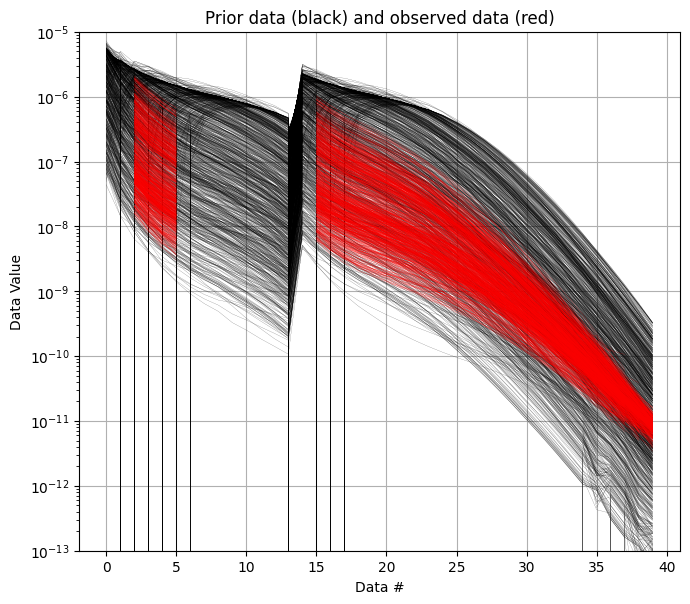

True

In [6]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5], hardcopy=hardcopy)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [7]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   showInfo=1, 
                                   Ncpu = 10,
                                   parallel=parallel)

File /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5 allready exists
Overwriting...
Loading data from ESBJERG_ALL.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 28061/40 data
Loading prior data from PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 50000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=ESBJERG_ALL.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


rejection:   0%|                                              | 0/2807 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2807 [00:00<00:47, 59.08it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<00:58, 47.92it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:02, 44.81it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:08, 40.69it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:14, 37.41it/s]

rejection:   1%|▎                                    | 20/2807 [00:00<01:03, 43.56it/s]

rejection:   0%|                                              | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:20, 34.89it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:16, 36.29it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:28, 31.59it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:15, 36.87it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:19, 35.26it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:48, 25.87it/s]

rejection:   1%|▍                                    | 30/2807 [00:00<01:14, 37.15it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:29, 31.19it/s]

rejection:   0%|▏                                    | 10/2806 [00:00<01:53, 24.72it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:36, 29.02it/s]

rejection:   1%|▍                                    | 30/2806 [00:00<01:22, 33.67it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:29, 31.24it/s]

rejection:   1%|▍                                    | 30/2806 [00:00<01:23, 33.12it/s]

rejection:   1%|▍                                    | 30/2806 [00:00<01:34, 29.48it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:37, 28.55it/s]

rejection:   1%|▌                                    | 40/2807 [00:01<01:20, 34.30it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<02:24, 19.31it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:30, 30.90it/s]

rejection:   1%|▍                                    | 30/2806 [00:00<01:33, 29.78it/s]

rejection:   1%|▍                                    | 30/2806 [00:00<01:29, 31.01it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:25, 32.42it/s]

rejection:   1%|▎                                    | 20/2806 [00:00<01:55, 24.07it/s]

rejection:   1%|▍                                    | 30/2806 [00:01<01:33, 29.82it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:31, 30.20it/s]

rejection:   2%|▋                                    | 50/2807 [00:01<01:22, 33.41it/s]

rejection:   1%|▍                                    | 30/2806 [00:00<01:28, 31.40it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:42, 27.00it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:30, 30.65it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:27, 31.46it/s]

rejection:   1%|▍                                    | 30/2806 [00:01<01:46, 26.14it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:37, 28.18it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:30, 30.48it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:36, 28.66it/s]

rejection:   2%|▊                                    | 60/2807 [00:01<01:24, 32.62it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:28, 31.30it/s]

rejection:   1%|▍                                    | 30/2806 [00:01<02:47, 16.53it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:29, 30.85it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:28, 31.31it/s]

rejection:   1%|▌                                    | 40/2806 [00:01<01:39, 27.90it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:48, 25.51it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:29, 30.76it/s]

rejection:   2%|▉                                    | 70/2807 [00:02<01:25, 32.19it/s]

rejection:   2%|▊                                    | 60/2806 [00:01<01:33, 29.51it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:28, 31.32it/s]

rejection:   2%|▊                                    | 60/2806 [00:02<01:46, 25.83it/s]

rejection:   2%|▊                                    | 60/2806 [00:01<01:28, 30.99it/s]

rejection:   2%|▊                                    | 60/2806 [00:01<01:27, 31.31it/s]

rejection:   2%|▊                                    | 60/2806 [00:02<01:42, 26.72it/s]

rejection:   2%|▊                                    | 60/2806 [00:01<01:29, 30.84it/s]

rejection:   2%|▋                                    | 50/2806 [00:01<01:44, 26.34it/s]

rejection:   3%|█                                    | 80/2807 [00:02<01:25, 31.76it/s]

rejection:   2%|▊                                    | 60/2806 [00:01<01:28, 31.18it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:40, 27.32it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:28, 31.01it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:27, 31.22it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:44, 26.30it/s]

rejection:   1%|▌                                    | 40/2806 [00:02<02:59, 15.41it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:37, 27.98it/s]

rejection:   3%|█▏                                   | 90/2807 [00:02<01:25, 31.65it/s]

rejection:   2%|▊                                    | 60/2806 [00:02<01:44, 26.26it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:36, 28.24it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:28, 30.76it/s]

rejection:   3%|█                                    | 80/2806 [00:02<01:37, 28.08it/s]

rejection:   3%|█                                    | 80/2806 [00:02<01:27, 31.06it/s]

rejection:   3%|█                                    | 80/2806 [00:02<01:27, 31.24it/s]

rejection:   3%|█                                    | 80/2806 [00:02<01:38, 27.67it/s]

rejection:   2%|▉                                    | 70/2806 [00:02<01:38, 27.73it/s]

rejection:   4%|█▎                                  | 100/2807 [00:03<01:25, 31.52it/s]

rejection:   3%|█                                    | 80/2806 [00:02<01:33, 29.18it/s]

rejection:   3%|█                                    | 80/2806 [00:02<01:28, 30.72it/s]

rejection:   3%|█▏                                   | 90/2806 [00:03<01:34, 28.88it/s]

rejection:   3%|█▏                                   | 90/2806 [00:02<01:26, 31.27it/s]

rejection:   3%|█▏                                   | 90/2806 [00:02<01:26, 31.40it/s]

rejection:   3%|█▏                                   | 90/2806 [00:03<01:35, 28.55it/s]

rejection:   2%|▋                                    | 50/2806 [00:03<03:02, 15.09it/s]

rejection:   3%|█                                    | 80/2806 [00:03<02:06, 21.61it/s]

rejection:   4%|█▍                                  | 110/2807 [00:03<01:25, 31.69it/s]

rejection:   3%|█                                    | 80/2806 [00:02<01:34, 28.95it/s]

rejection:   3%|█▏                                   | 90/2806 [00:02<01:28, 30.76it/s]

rejection:   3%|█▏                                   | 90/2806 [00:03<01:33, 29.06it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:32, 29.40it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:26, 31.32it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:26, 31.38it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:32, 29.18it/s]

rejection:   3%|█▏                                   | 90/2806 [00:03<01:57, 23.19it/s]

rejection:   4%|█▌                                  | 120/2807 [00:03<01:25, 31.37it/s]

rejection:   3%|█▏                                   | 90/2806 [00:03<01:34, 28.62it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:27, 30.76it/s]

rejection:   4%|█▍                                  | 110/2806 [00:03<01:26, 31.17it/s]

rejection:   4%|█▍                                  | 110/2806 [00:03<01:30, 29.81it/s]

rejection:   4%|█▍                                  | 110/2806 [00:03<01:26, 31.20it/s]

rejection:   4%|█▍                                  | 110/2806 [00:03<01:30, 29.67it/s]

rejection:   2%|▊                                    | 60/2806 [00:03<03:04, 14.87it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:47, 25.07it/s]

rejection:   5%|█▋                                  | 130/2807 [00:03<01:25, 31.13it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:32, 29.22it/s]

rejection:   4%|█▎                                  | 100/2806 [00:03<01:57, 23.10it/s]

rejection:   4%|█▌                                  | 120/2806 [00:04<01:29, 30.08it/s]

rejection:   4%|█▌                                  | 120/2806 [00:03<01:26, 31.02it/s]

rejection:   4%|█▌                                  | 120/2806 [00:03<01:26, 31.06it/s]

rejection:   4%|█▍                                  | 110/2806 [00:03<01:35, 28.25it/s]

rejection:   4%|█▌                                  | 120/2806 [00:04<01:29, 29.99it/s]

rejection:   4%|█▍                                  | 110/2806 [00:04<01:41, 26.65it/s]

rejection:   5%|█▊                                  | 140/2807 [00:04<01:25, 31.12it/s]

rejection:   4%|█▍                                  | 110/2806 [00:03<01:30, 29.75it/s]

rejection:   4%|█▍                                  | 110/2806 [00:04<01:46, 25.23it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:28, 30.33it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:26, 30.98it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:26, 31.01it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:28, 30.25it/s]

rejection:   4%|█▌                                  | 120/2806 [00:04<01:40, 26.63it/s]

rejection:   4%|█▌                                  | 120/2806 [00:04<01:36, 27.73it/s]

rejection:   2%|▉                                    | 70/2806 [00:04<03:04, 14.82it/s]

rejection:   5%|█▉                                  | 150/2807 [00:04<01:25, 30.99it/s]

rejection:   4%|█▌                                  | 120/2806 [00:04<01:40, 26.75it/s]

rejection:   5%|█▊                                  | 140/2806 [00:04<01:27, 30.41it/s]

rejection:   5%|█▊                                  | 140/2806 [00:04<01:26, 30.87it/s]

rejection:   5%|█▊                                  | 140/2806 [00:04<01:26, 30.89it/s]

rejection:   5%|█▊                                  | 140/2806 [00:04<01:27, 30.35it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:36, 27.74it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:33, 28.59it/s]

rejection:   4%|█▌                                  | 120/2806 [00:04<01:53, 23.74it/s]

rejection:   6%|██                                  | 160/2807 [00:04<01:25, 30.94it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:35, 27.91it/s]

rejection:   5%|█▉                                  | 150/2806 [00:04<01:25, 30.93it/s]

rejection:   5%|█▉                                  | 150/2806 [00:04<01:26, 30.60it/s]

rejection:   5%|█▉                                  | 150/2806 [00:04<01:25, 30.91it/s]

rejection:   5%|█▉                                  | 150/2806 [00:05<01:26, 30.56it/s]

rejection:   5%|█▊                                  | 140/2806 [00:05<01:31, 29.24it/s]

rejection:   6%|██▏                                 | 170/2807 [00:05<01:25, 30.89it/s]

rejection:   5%|█▋                                  | 130/2806 [00:04<01:45, 25.46it/s]

rejection:   3%|█                                    | 80/2806 [00:05<03:04, 14.75it/s]

rejection:   5%|█▊                                  | 140/2806 [00:04<01:32, 28.70it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:25, 30.91it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:26, 30.67it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:25, 30.99it/s]

rejection:   5%|█▊                                  | 140/2806 [00:04<01:50, 24.10it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:25, 30.84it/s]

rejection:   5%|█▉                                  | 150/2806 [00:05<01:28, 29.98it/s]

rejection:   6%|██▎                                 | 180/2807 [00:05<01:24, 31.18it/s]

rejection:   5%|█▉                                  | 150/2806 [00:05<01:29, 29.60it/s]

rejection:   5%|█▊                                  | 140/2806 [00:05<01:43, 25.77it/s]

rejection:   6%|██▏                                 | 170/2806 [00:05<01:27, 30.11it/s]

rejection:   6%|██▏                                 | 170/2806 [00:05<01:27, 30.26it/s]

rejection:   6%|██▏                                 | 170/2806 [00:05<01:25, 30.92it/s]

rejection:   5%|█▉                                  | 150/2806 [00:05<01:42, 25.81it/s]

rejection:   6%|██▏                                 | 170/2806 [00:05<01:32, 28.59it/s]

rejection:   7%|██▍                                 | 190/2807 [00:05<01:23, 31.23it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:27, 30.09it/s]

rejection:   5%|█▉                                  | 150/2806 [00:05<01:37, 27.23it/s]

rejection:   3%|█▏                                   | 90/2806 [00:05<03:07, 14.50it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:37, 27.20it/s]

rejection:   6%|██▎                                 | 180/2806 [00:05<01:26, 30.46it/s]

rejection:   6%|██▎                                 | 180/2806 [00:05<01:25, 30.57it/s]

rejection:   6%|██▎                                 | 180/2806 [00:05<01:24, 31.07it/s]

rejection:   6%|██▎                                 | 180/2806 [00:05<01:29, 29.31it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:49, 24.11it/s]

rejection:   7%|██▌                                 | 200/2807 [00:06<01:23, 31.15it/s]

rejection:   6%|██▏                                 | 170/2806 [00:05<01:26, 30.37it/s]

rejection:   6%|██                                  | 160/2806 [00:05<01:33, 28.25it/s]

rejection:   7%|██▍                                 | 190/2806 [00:06<01:25, 30.62it/s]

rejection:   7%|██▍                                 | 190/2806 [00:06<01:25, 30.69it/s]

rejection:   7%|██▍                                 | 190/2806 [00:06<01:24, 31.00it/s]

rejection:   7%|██▍                                 | 190/2806 [00:06<01:27, 29.81it/s]

rejection:   7%|██▋                                 | 210/2807 [00:06<01:23, 31.22it/s]

rejection:   6%|██▏                                 | 170/2806 [00:06<01:43, 25.41it/s]

rejection:   6%|██▎                                 | 180/2806 [00:06<01:25, 30.66it/s]

rejection:   6%|██▏                                 | 170/2806 [00:06<01:30, 29.12it/s]

rejection:   6%|██▏                                 | 170/2806 [00:06<01:57, 22.49it/s]

rejection:   7%|██▌                                 | 200/2806 [00:06<01:24, 30.83it/s]

rejection:   7%|██▌                                 | 200/2806 [00:06<01:24, 30.88it/s]

rejection:   7%|██▌                                 | 200/2806 [00:06<01:23, 31.18it/s]

rejection:   4%|█▎                                  | 100/2806 [00:06<03:08, 14.35it/s]

rejection:   8%|██▊                                 | 220/2807 [00:06<01:23, 31.15it/s]

rejection:   7%|██▌                                 | 200/2806 [00:06<01:33, 27.82it/s]

rejection:   7%|██▍                                 | 190/2806 [00:06<01:25, 30.72it/s]

rejection:   6%|██▎                                 | 180/2806 [00:06<01:48, 24.15it/s]

rejection:   7%|██▋                                 | 210/2806 [00:06<01:24, 30.85it/s]

rejection:   7%|██▋                                 | 210/2806 [00:06<01:24, 30.89it/s]

rejection:   6%|██▎                                 | 180/2806 [00:06<01:48, 24.26it/s]

rejection:   7%|██▋                                 | 210/2806 [00:06<01:23, 31.06it/s]

rejection:   6%|██▎                                 | 180/2806 [00:06<01:38, 26.75it/s]

rejection:   8%|██▉                                 | 230/2807 [00:07<01:22, 31.27it/s]

rejection:   7%|██▋                                 | 210/2806 [00:06<01:30, 28.82it/s]

rejection:   7%|██▌                                 | 200/2806 [00:06<01:23, 31.06it/s]

rejection:   8%|██▊                                 | 220/2806 [00:07<01:22, 31.24it/s]

rejection:   8%|██▊                                 | 220/2806 [00:07<01:22, 31.21it/s]

rejection:   8%|██▊                                 | 220/2806 [00:07<01:22, 31.35it/s]

rejection:   7%|██▍                                 | 190/2806 [00:06<01:42, 25.43it/s]

rejection:   7%|██▍                                 | 190/2806 [00:06<01:34, 27.77it/s]

rejection:   7%|██▍                                 | 190/2806 [00:07<01:52, 23.27it/s]

rejection:   4%|█▍                                  | 110/2806 [00:07<03:11, 14.11it/s]

rejection:   9%|███                                 | 240/2807 [00:07<01:21, 31.42it/s]

rejection:   7%|██▋                                 | 210/2806 [00:07<01:23, 31.21it/s]

rejection:   8%|██▊                                 | 220/2806 [00:07<01:32, 28.06it/s]

rejection:   8%|██▉                                 | 230/2806 [00:07<01:22, 31.27it/s]

rejection:   8%|██▉                                 | 230/2806 [00:07<01:22, 31.34it/s]

rejection:   8%|██▉                                 | 230/2806 [00:07<01:30, 28.61it/s]

rejection:   7%|██▌                                 | 200/2806 [00:07<01:39, 26.24it/s]

rejection:   7%|██▌                                 | 200/2806 [00:07<01:43, 25.10it/s]

rejection:   9%|███▏                                | 250/2807 [00:07<01:21, 31.35it/s]

rejection:   8%|██▊                                 | 220/2806 [00:07<01:22, 31.22it/s]

rejection:   7%|██▌                                 | 200/2806 [00:07<01:42, 25.43it/s]

rejection:   8%|██▉                                 | 230/2806 [00:07<01:28, 28.96it/s]

rejection:   9%|███                                 | 240/2806 [00:07<01:22, 31.26it/s]

rejection:   9%|███                                 | 240/2806 [00:07<01:21, 31.32it/s]

rejection:   7%|██▋                                 | 210/2806 [00:07<01:37, 26.66it/s]

rejection:   7%|██▋                                 | 210/2806 [00:07<01:39, 26.17it/s]

rejection:   9%|███▎                                | 260/2807 [00:08<01:21, 31.20it/s]

rejection:   4%|█▌                                  | 120/2806 [00:07<03:09, 14.15it/s]

rejection:   8%|██▉                                 | 230/2806 [00:07<01:22, 31.06it/s]

rejection:   7%|██▋                                 | 210/2806 [00:07<01:36, 26.84it/s]

rejection:   9%|███                                 | 240/2806 [00:07<01:27, 29.43it/s]

rejection:   9%|███▏                                | 250/2806 [00:08<01:22, 31.06it/s]

rejection:   9%|███                                 | 240/2806 [00:08<01:47, 23.86it/s]

rejection:   9%|███▏                                | 250/2806 [00:08<01:22, 31.08it/s]

rejection:   8%|██▊                                 | 220/2806 [00:08<01:33, 27.79it/s]

rejection:   8%|██▊                                 | 220/2806 [00:07<01:34, 27.42it/s]

rejection:  10%|███▍                                | 270/2807 [00:08<01:21, 31.15it/s]

rejection:   9%|███                                 | 240/2806 [00:08<01:22, 31.10it/s]

rejection:   8%|██▊                                 | 220/2806 [00:08<01:32, 28.01it/s]

rejection:   9%|███▏                                | 250/2806 [00:08<01:25, 29.97it/s]

rejection:   9%|███▎                                | 260/2806 [00:08<01:23, 30.31it/s]

rejection:   9%|███▏                                | 250/2806 [00:08<01:41, 25.13it/s]

rejection:   8%|██▉                                 | 230/2806 [00:08<01:29, 28.77it/s]

rejection:   8%|██▉                                 | 230/2806 [00:08<01:30, 28.48it/s]

rejection:  10%|███▌                                | 280/2807 [00:08<01:21, 31.17it/s]

rejection:   9%|███▏                                | 250/2806 [00:08<01:22, 31.11it/s]

rejection:   8%|██▉                                 | 230/2806 [00:08<01:29, 28.88it/s]

rejection:   9%|███▎                                | 260/2806 [00:08<01:36, 26.42it/s]

rejection:   5%|█▋                                  | 130/2806 [00:08<03:07, 14.24it/s]

rejection:   9%|███▎                                | 260/2806 [00:08<01:23, 30.33it/s]

rejection:   9%|███▎                                | 260/2806 [00:08<01:35, 26.68it/s]

rejection:  10%|███▍                                | 270/2806 [00:08<01:30, 28.06it/s]

rejection:   9%|███                                 | 240/2806 [00:08<01:27, 29.46it/s]

rejection:   9%|███                                 | 240/2806 [00:08<01:27, 29.24it/s]

rejection:  10%|███▋                                | 290/2807 [00:09<01:20, 31.16it/s]

rejection:   9%|███▎                                | 260/2806 [00:08<01:21, 31.10it/s]

rejection:   9%|███                                 | 240/2806 [00:08<01:29, 28.68it/s]

rejection:  10%|███▍                                | 270/2806 [00:08<01:23, 30.50it/s]

rejection:   5%|█▊                                  | 140/2806 [00:09<02:45, 16.14it/s]

rejection:  10%|███▍                                | 270/2806 [00:09<01:31, 27.78it/s]

rejection:   9%|███▏                                | 250/2806 [00:09<01:25, 29.85it/s]

rejection:   9%|███▏                                | 250/2806 [00:08<01:25, 29.73it/s]

rejection:  11%|███▊                                | 300/2807 [00:09<01:20, 31.09it/s]

rejection:  10%|███▍                                | 270/2806 [00:09<01:21, 31.11it/s]

rejection:  10%|███▍                                | 270/2806 [00:09<01:56, 21.84it/s]

rejection:   9%|███▏                                | 250/2806 [00:09<01:26, 29.44it/s]

rejection:  10%|███▌                                | 280/2806 [00:09<01:22, 30.77it/s]

rejection:   5%|█▉                                  | 150/2806 [00:09<02:20, 18.93it/s]

rejection:  10%|███▌                                | 280/2806 [00:09<01:27, 28.87it/s]

rejection:   9%|███▎                                | 260/2806 [00:09<01:23, 30.41it/s]

rejection:  10%|███▌                                | 280/2806 [00:09<01:56, 21.63it/s]

rejection:  11%|███▉                                | 310/2807 [00:09<01:21, 30.56it/s]

rejection:  10%|███▌                                | 280/2806 [00:09<01:20, 31.26it/s]

rejection:  10%|███▋                                | 290/2806 [00:09<01:21, 30.97it/s]

rejection:   9%|███▎                                | 260/2806 [00:09<01:24, 30.02it/s]

rejection:  10%|███▌                                | 280/2806 [00:09<01:47, 23.53it/s]

rejection:   6%|██                                  | 160/2806 [00:09<02:03, 21.49it/s]

rejection:  10%|███▋                                | 290/2806 [00:09<01:25, 29.59it/s]

rejection:  10%|███▍                                | 270/2806 [00:09<01:22, 30.75it/s]

rejection:  10%|███▋                                | 290/2806 [00:09<01:20, 31.41it/s]

rejection:  11%|████                                | 320/2807 [00:10<01:20, 30.71it/s]

rejection:  11%|███▊                                | 300/2806 [00:09<01:20, 31.20it/s]

rejection:  10%|███▍                                | 270/2806 [00:09<01:23, 30.51it/s]

rejection:   9%|███▎                                | 260/2806 [00:09<01:55, 22.05it/s]

rejection:  10%|███▋                                | 290/2806 [00:10<01:40, 24.99it/s]

rejection:  10%|███▋                                | 290/2806 [00:09<01:53, 22.16it/s]

rejection:  11%|███▊                                | 300/2806 [00:10<01:22, 30.26it/s]

rejection:  10%|███▌                                | 280/2806 [00:10<01:21, 31.14it/s]

rejection:   6%|██▏                                 | 170/2806 [00:10<02:02, 21.49it/s]

rejection:  12%|████▏                               | 330/2807 [00:10<01:19, 31.18it/s]

rejection:  11%|███▊                                | 300/2806 [00:10<01:19, 31.66it/s]

rejection:  10%|███▌                                | 280/2806 [00:10<01:21, 31.03it/s]

rejection:  11%|███▉                                | 310/2806 [00:10<01:21, 30.59it/s]

rejection:  11%|███▊                                | 300/2806 [00:10<01:35, 26.18it/s]

rejection:  11%|███▉                                | 310/2806 [00:10<01:23, 29.93it/s]

rejection:  10%|███▋                                | 290/2806 [00:10<01:20, 31.35it/s]

rejection:  11%|███▊                                | 300/2806 [00:10<01:57, 21.31it/s]

rejection:   6%|██▎                                 | 180/2806 [00:10<01:50, 23.75it/s]

rejection:  11%|███▉                                | 310/2806 [00:10<01:18, 31.68it/s]

rejection:  12%|████▎                               | 340/2807 [00:10<01:18, 31.32it/s]

rejection:  10%|███▋                                | 290/2806 [00:10<01:20, 31.27it/s]

rejection:  11%|███▉                                | 310/2806 [00:10<01:30, 27.53it/s]

rejection:  10%|███▍                                | 270/2806 [00:10<02:15, 18.69it/s]

rejection:  11%|████                                | 320/2806 [00:10<01:21, 30.40it/s]

rejection:  11%|████                                | 320/2806 [00:10<01:29, 27.67it/s]

rejection:  11%|███▊                                | 300/2806 [00:10<01:19, 31.39it/s]

rejection:  12%|████▍                               | 350/2807 [00:11<01:18, 31.30it/s]

rejection:  11%|███▉                                | 310/2806 [00:10<01:48, 23.07it/s]

rejection:  11%|████                                | 320/2806 [00:10<01:18, 31.54it/s]

rejection:  11%|███▊                                | 300/2806 [00:10<01:20, 31.20it/s]

rejection:  11%|████                                | 320/2806 [00:11<01:27, 28.45it/s]

rejection:   7%|██▍                                 | 190/2806 [00:11<01:57, 22.33it/s]

rejection:  12%|████▏                               | 330/2806 [00:11<01:21, 30.57it/s]

rejection:  12%|████▏                               | 330/2806 [00:10<01:26, 28.58it/s]

rejection:  11%|███▉                                | 310/2806 [00:11<01:19, 31.31it/s]

rejection:  12%|████▏                               | 330/2806 [00:11<01:18, 31.47it/s]

rejection:  13%|████▌                               | 360/2807 [00:11<01:18, 31.29it/s]

rejection:  11%|███▉                                | 310/2806 [00:10<01:20, 31.17it/s]

rejection:  11%|████                                | 320/2806 [00:11<01:44, 23.89it/s]

rejection:  12%|████▏                               | 330/2806 [00:11<01:29, 27.69it/s]

rejection:  12%|████▎                               | 340/2806 [00:11<01:24, 29.34it/s]

rejection:  10%|███▌                                | 280/2806 [00:11<02:28, 16.98it/s]

rejection:  12%|████▎                               | 340/2806 [00:11<01:21, 30.21it/s]

rejection:  11%|████                                | 320/2806 [00:11<01:19, 31.27it/s]

rejection:   7%|██▌                                 | 200/2806 [00:11<01:54, 22.79it/s]

rejection:  13%|████▋                               | 370/2807 [00:11<01:17, 31.25it/s]

rejection:  12%|████▎                               | 340/2806 [00:11<01:18, 31.36it/s]

rejection:  12%|████▏                               | 330/2806 [00:11<01:36, 25.66it/s]

rejection:  11%|████                                | 320/2806 [00:11<01:26, 28.61it/s]

rejection:  12%|████▎                               | 340/2806 [00:11<01:28, 27.74it/s]

rejection:  12%|████▍                               | 350/2806 [00:11<01:20, 30.36it/s]

rejection:  12%|████▏                               | 330/2806 [00:11<01:19, 31.20it/s]

rejection:   7%|██▋                                 | 210/2806 [00:11<01:44, 24.81it/s]

rejection:  12%|████▍                               | 350/2806 [00:11<01:31, 26.96it/s]

rejection:  12%|████▍                               | 350/2806 [00:11<01:18, 31.30it/s]

rejection:  14%|████▊                               | 380/2807 [00:11<01:17, 31.20it/s]

rejection:  12%|████▎                               | 340/2806 [00:11<01:33, 26.41it/s]

rejection:  12%|████▏                               | 330/2806 [00:11<01:24, 29.34it/s]

rejection:  12%|████▍                               | 350/2806 [00:12<01:26, 28.27it/s]

rejection:  12%|████▎                               | 340/2806 [00:12<01:18, 31.28it/s]

rejection:   8%|██▊                                 | 220/2806 [00:12<01:37, 26.51it/s]

rejection:  13%|████▌                               | 360/2806 [00:12<01:24, 28.94it/s]

rejection:  10%|███▋                                | 290/2806 [00:11<02:39, 15.74it/s]

rejection:  13%|████▌                               | 360/2806 [00:11<01:17, 31.49it/s]

rejection:  13%|████▌                               | 360/2806 [00:12<01:28, 27.76it/s]

rejection:  14%|█████                               | 390/2807 [00:12<01:21, 29.62it/s]

rejection:  12%|████▎                               | 340/2806 [00:12<01:22, 30.07it/s]

rejection:  12%|████▍                               | 350/2806 [00:12<01:35, 25.78it/s]

rejection:  12%|████▍                               | 350/2806 [00:12<01:18, 31.38it/s]

rejection:   8%|██▉                                 | 230/2806 [00:12<01:32, 27.82it/s]

rejection:  13%|████▌                               | 360/2806 [00:12<01:26, 28.24it/s]

rejection:  13%|████▋                               | 370/2806 [00:12<01:17, 31.39it/s]

rejection:  13%|████▋                               | 370/2806 [00:12<01:26, 28.30it/s]

rejection:  13%|████▋                               | 370/2806 [00:12<01:29, 27.27it/s]

rejection:  14%|█████▏                              | 400/2807 [00:12<01:19, 30.12it/s]

rejection:  13%|████▌                               | 360/2806 [00:12<01:29, 27.32it/s]

rejection:  12%|████▍                               | 350/2806 [00:12<01:26, 28.51it/s]

rejection:  13%|████▌                               | 360/2806 [00:12<01:17, 31.50it/s]

rejection:   9%|███                                 | 240/2806 [00:12<01:28, 28.90it/s]

rejection:  14%|████▉                               | 380/2806 [00:12<01:17, 31.46it/s]

rejection:  13%|████▋                               | 370/2806 [00:12<01:30, 26.91it/s]

rejection:  14%|████▉                               | 380/2806 [00:12<01:25, 28.37it/s]

rejection:  15%|█████▎                              | 410/2807 [00:13<01:18, 30.48it/s]

rejection:  11%|███▊                                | 300/2806 [00:12<02:45, 15.18it/s]

rejection:  13%|████▌                               | 360/2806 [00:12<01:22, 29.52it/s]

rejection:  13%|████▋                               | 370/2806 [00:12<01:26, 28.27it/s]

rejection:  14%|████▉                               | 380/2806 [00:12<01:37, 24.93it/s]

rejection:  13%|████▋                               | 370/2806 [00:13<01:17, 31.28it/s]

rejection:   9%|███▏                                | 250/2806 [00:13<01:26, 29.43it/s]

rejection:  14%|█████                               | 390/2806 [00:12<01:17, 31.22it/s]

rejection:  14%|████▉                               | 380/2806 [00:13<01:26, 27.98it/s]

rejection:  14%|█████                               | 390/2806 [00:13<01:23, 29.04it/s]

rejection:  15%|█████▍                              | 420/2807 [00:13<01:24, 28.10it/s]

rejection:  13%|████▋                               | 370/2806 [00:13<01:21, 29.94it/s]

rejection:  14%|████▉                               | 380/2806 [00:13<01:23, 29.03it/s]

rejection:  14%|████▉                               | 380/2806 [00:13<01:17, 31.17it/s]

rejection:   9%|███▎                                | 260/2806 [00:13<01:25, 29.84it/s]

rejection:  11%|███▉                                | 310/2806 [00:13<02:35, 16.01it/s]

rejection:  14%|█████▏                              | 400/2806 [00:13<01:17, 31.15it/s]

rejection:  14%|█████                               | 390/2806 [00:13<01:23, 28.78it/s]

rejection:  14%|█████▏                              | 400/2806 [00:13<01:21, 29.59it/s]

rejection:  14%|█████                               | 390/2806 [00:13<01:21, 29.59it/s]

rejection:  14%|████▉                               | 380/2806 [00:13<01:20, 30.22it/s]

rejection:  14%|█████                               | 390/2806 [00:13<01:17, 31.16it/s]

rejection:  10%|███▍                                | 270/2806 [00:13<01:23, 30.27it/s]

rejection:  15%|█████▌                              | 430/2807 [00:13<01:30, 26.36it/s]

rejection:  14%|█████                               | 390/2806 [00:13<01:58, 20.39it/s]

rejection:  11%|████                                | 320/2806 [00:13<02:12, 18.77it/s]

rejection:  15%|█████▎                              | 410/2806 [00:13<01:16, 31.21it/s]

rejection:  15%|█████▎                              | 410/2806 [00:13<01:19, 30.13it/s]

rejection:  14%|█████▏                              | 400/2806 [00:13<01:27, 27.36it/s]

rejection:  14%|█████▏                              | 400/2806 [00:14<01:16, 31.28it/s]

rejection:  14%|█████                               | 390/2806 [00:13<01:21, 29.78it/s]

rejection:  10%|███▌                                | 280/2806 [00:14<01:22, 30.61it/s]

rejection:  12%|████▏                               | 330/2806 [00:13<01:56, 21.32it/s]

rejection:  16%|█████▋                              | 440/2807 [00:14<01:26, 27.29it/s]

rejection:  15%|█████▍                              | 420/2806 [00:13<01:16, 31.20it/s]

rejection:  14%|█████▏                              | 400/2806 [00:14<01:33, 25.67it/s]

rejection:  15%|█████▍                              | 420/2806 [00:14<01:18, 30.41it/s]

rejection:  15%|█████▎                              | 410/2806 [00:14<01:24, 28.24it/s]

rejection:  15%|█████▎                              | 410/2806 [00:14<01:16, 31.17it/s]

rejection:  10%|███▋                                | 290/2806 [00:14<01:22, 30.68it/s]

rejection:  16%|█████▊                              | 450/2807 [00:14<01:23, 28.32it/s]

rejection:  12%|████▎                               | 340/2806 [00:14<01:44, 23.52it/s]

rejection:  14%|█████▏                              | 400/2806 [00:14<02:11, 18.25it/s]

rejection:  14%|█████▏                              | 400/2806 [00:14<01:26, 27.67it/s]

rejection:  15%|█████▌                              | 430/2806 [00:14<01:16, 31.13it/s]

rejection:  15%|█████▌                              | 430/2806 [00:14<01:17, 30.56it/s]

rejection:  15%|█████▎                              | 410/2806 [00:14<01:30, 26.35it/s]

rejection:  15%|█████▍                              | 420/2806 [00:14<01:16, 31.17it/s]

rejection:  11%|███▊                                | 300/2806 [00:14<01:21, 30.85it/s]

rejection:  16%|█████▉                              | 460/2807 [00:14<01:20, 29.14it/s]

rejection:  15%|█████▎                              | 410/2806 [00:14<01:23, 28.66it/s]

rejection:  16%|█████▋                              | 440/2806 [00:14<01:15, 31.16it/s]

rejection:  15%|█████▎                              | 410/2806 [00:14<01:55, 20.80it/s]

rejection:  12%|████▍                               | 350/2806 [00:14<01:41, 24.19it/s]

rejection:  15%|█████▍                              | 420/2806 [00:14<01:27, 27.14it/s]

rejection:  16%|█████▋                              | 440/2806 [00:15<01:25, 27.60it/s]

rejection:  15%|█████▌                              | 430/2806 [00:14<01:15, 31.28it/s]

rejection:  15%|█████▍                              | 420/2806 [00:15<01:53, 21.09it/s]

rejection:  11%|███▉                                | 310/2806 [00:14<01:20, 31.20it/s]

rejection:  16%|█████▊                              | 450/2806 [00:14<01:14, 31.48it/s]

rejection:  15%|█████▍                              | 420/2806 [00:14<01:20, 29.62it/s]

rejection:  15%|█████▍                              | 420/2806 [00:14<01:42, 23.28it/s]

rejection:  17%|██████                              | 470/2807 [00:15<01:22, 28.37it/s]

rejection:  15%|█████▌                              | 430/2806 [00:15<01:23, 28.31it/s]

rejection:  13%|████▌                               | 360/2806 [00:14<01:47, 22.76it/s]

rejection:  16%|█████▋                              | 440/2806 [00:15<01:15, 31.46it/s]

rejection:  11%|████                                | 320/2806 [00:15<01:19, 31.24it/s]

rejection:  16%|█████▊                              | 450/2806 [00:15<01:27, 27.02it/s]

rejection:  15%|█████▌                              | 430/2806 [00:15<01:34, 25.22it/s]

rejection:  16%|█████▉                              | 460/2806 [00:15<01:14, 31.41it/s]

rejection:  17%|██████▏                             | 480/2807 [00:15<01:19, 29.15it/s]

rejection:  15%|█████▌                              | 430/2806 [00:15<01:53, 20.92it/s]

rejection:  15%|█████▌                              | 430/2806 [00:15<01:28, 27.00it/s]

rejection:  16%|█████▋                              | 440/2806 [00:15<01:21, 29.11it/s]

rejection:  12%|████▏                               | 330/2806 [00:15<01:19, 31.22it/s]

rejection:  16%|█████▉                              | 460/2806 [00:15<01:23, 27.95it/s]

rejection:  13%|████▋                               | 370/2806 [00:15<01:42, 23.74it/s]

rejection:  17%|██████                              | 470/2806 [00:15<01:14, 31.32it/s]

rejection:  17%|██████▎                             | 490/2807 [00:15<01:17, 29.71it/s]

rejection:  16%|█████▋                              | 440/2806 [00:15<01:41, 23.20it/s]

rejection:  16%|█████▊                              | 450/2806 [00:15<01:19, 29.68it/s]

rejection:  16%|█████▋                              | 440/2806 [00:15<01:24, 28.09it/s]

rejection:  16%|█████▋                              | 440/2806 [00:15<01:44, 22.65it/s]

rejection:  16%|█████▊                              | 450/2806 [00:15<01:38, 23.98it/s]

rejection:  14%|████▉                               | 380/2806 [00:15<01:35, 25.39it/s]

rejection:  12%|████▎                               | 340/2806 [00:15<01:21, 30.24it/s]

rejection:  17%|██████                              | 470/2806 [00:16<01:22, 28.47it/s]

rejection:  17%|██████▏                             | 480/2806 [00:15<01:14, 31.22it/s]

rejection:  18%|██████▍                             | 500/2807 [00:16<01:16, 30.08it/s]

rejection:  16%|█████▊                              | 450/2806 [00:15<01:21, 28.92it/s]

rejection:  16%|█████▉                              | 460/2806 [00:16<01:18, 30.07it/s]

rejection:  16%|█████▊                              | 450/2806 [00:16<01:42, 23.04it/s]

rejection:  16%|█████▊                              | 450/2806 [00:16<01:35, 24.64it/s]

rejection:  14%|█████                               | 390/2806 [00:15<01:29, 26.88it/s]

rejection:  12%|████▍                               | 350/2806 [00:16<01:20, 30.50it/s]

rejection:  17%|██████▎                             | 490/2806 [00:16<01:14, 31.22it/s]

rejection:  18%|██████▌                             | 510/2807 [00:16<01:15, 30.42it/s]

rejection:  17%|██████▏                             | 480/2806 [00:16<01:26, 27.01it/s]

rejection:  16%|█████▉                              | 460/2806 [00:16<01:19, 29.68it/s]

rejection:  16%|█████▉                              | 460/2806 [00:16<01:28, 26.37it/s]

rejection:  17%|██████                              | 470/2806 [00:16<01:23, 28.01it/s]

rejection:  16%|█████▉                              | 460/2806 [00:16<01:34, 24.88it/s]

rejection:  14%|█████▏                              | 400/2806 [00:16<01:25, 28.10it/s]

rejection:  16%|█████▉                              | 460/2806 [00:16<01:59, 19.67it/s]

rejection:  18%|██████▍                             | 500/2806 [00:16<01:13, 31.29it/s]

rejection:  13%|████▌                               | 360/2806 [00:16<01:25, 28.58it/s]

rejection:  17%|██████▎                             | 490/2806 [00:16<01:22, 28.14it/s]

rejection:  17%|██████                              | 470/2806 [00:16<01:17, 30.05it/s]

rejection:  19%|██████▋                             | 520/2807 [00:16<01:21, 28.21it/s]

rejection:  17%|██████▏                             | 480/2806 [00:16<01:20, 28.92it/s]

rejection:  17%|██████                              | 470/2806 [00:16<01:24, 27.66it/s]

rejection:  15%|█████▎                              | 410/2806 [00:16<01:22, 29.16it/s]

rejection:  18%|██████▌                             | 510/2806 [00:16<01:12, 31.51it/s]

rejection:  17%|██████                              | 470/2806 [00:17<01:34, 24.75it/s]

rejection:  18%|██████▍                             | 500/2806 [00:17<01:18, 29.28it/s]

rejection:  17%|██████▏                             | 480/2806 [00:16<01:15, 30.74it/s]

rejection:  13%|████▋                               | 370/2806 [00:17<01:31, 26.73it/s]

rejection:  17%|██████▏                             | 480/2806 [00:17<01:22, 28.08it/s]

rejection:  19%|██████▊                             | 530/2807 [00:17<01:26, 26.33it/s]

rejection:  15%|█████▍                              | 420/2806 [00:16<01:20, 29.80it/s]

rejection:  17%|██████▎                             | 490/2806 [00:17<01:24, 27.43it/s]

rejection:  19%|██████▋                             | 520/2806 [00:17<01:12, 31.45it/s]

rejection:  17%|██████▏                             | 480/2806 [00:17<01:28, 26.42it/s]

rejection:  17%|██████                              | 470/2806 [00:17<02:11, 17.79it/s]

rejection:  18%|██████▌                             | 510/2806 [00:17<01:17, 29.79it/s]

rejection:  17%|██████▎                             | 490/2806 [00:17<01:15, 30.82it/s]

rejection:  14%|████▉                               | 380/2806 [00:17<01:30, 26.75it/s]

rejection:  17%|██████▎                             | 490/2806 [00:17<01:20, 28.94it/s]

rejection:  19%|██████▉                             | 540/2807 [00:17<01:24, 26.90it/s]

rejection:  15%|█████▌                              | 430/2806 [00:17<01:18, 30.18it/s]

rejection:  19%|██████▊                             | 530/2806 [00:17<01:12, 31.36it/s]

rejection:  17%|██████▏                             | 480/2806 [00:17<01:53, 20.48it/s]

rejection:  19%|██████▋                             | 520/2806 [00:17<01:17, 29.61it/s]

rejection:  18%|██████▍                             | 500/2806 [00:17<01:14, 30.86it/s]

rejection:  18%|██████▍                             | 500/2806 [00:17<01:30, 25.54it/s]

rejection:  14%|█████                               | 390/2806 [00:17<01:26, 27.86it/s]

rejection:  18%|██████▍                             | 500/2806 [00:17<01:18, 29.48it/s]

rejection:  16%|█████▋                              | 440/2806 [00:17<01:17, 30.38it/s]

rejection:  19%|██████▉                             | 540/2806 [00:17<01:12, 31.18it/s]

rejection:  20%|███████                             | 550/2807 [00:18<01:25, 26.52it/s]

rejection:  17%|██████▎                             | 490/2806 [00:17<01:41, 22.91it/s]

rejection:  17%|██████▎                             | 490/2806 [00:18<01:52, 20.50it/s]

rejection:  18%|██████▌                             | 510/2806 [00:17<01:14, 30.80it/s]

rejection:  18%|██████▌                             | 510/2806 [00:18<01:25, 26.96it/s]

rejection:  19%|██████▊                             | 530/2806 [00:18<01:25, 26.53it/s]

rejection:  14%|█████▏                              | 400/2806 [00:18<01:24, 28.62it/s]

rejection:  18%|██████▌                             | 510/2806 [00:18<01:17, 29.78it/s]

rejection:  16%|█████▊                              | 450/2806 [00:17<01:17, 30.42it/s]

rejection:  20%|███████                             | 550/2806 [00:18<01:12, 30.97it/s]

rejection:  18%|██████▍                             | 500/2806 [00:18<01:33, 24.74it/s]

rejection:  19%|██████▋                             | 520/2806 [00:18<01:21, 27.94it/s]

rejection:  19%|██████▋                             | 520/2806 [00:18<01:14, 30.70it/s]

rejection:  15%|█████▎                              | 410/2806 [00:18<01:22, 29.18it/s]

rejection:  19%|██████▉                             | 540/2806 [00:18<01:22, 27.61it/s]

rejection:  19%|██████▋                             | 520/2806 [00:18<01:15, 30.08it/s]

rejection:  16%|█████▉                              | 460/2806 [00:18<01:16, 30.57it/s]

rejection:  20%|███████▏                            | 560/2806 [00:18<01:12, 31.03it/s]

rejection:  20%|███████▏                            | 560/2807 [00:18<01:42, 21.87it/s]

rejection:  18%|██████▌                             | 510/2806 [00:18<01:26, 26.41it/s]

rejection:  19%|██████▊                             | 530/2806 [00:18<01:13, 30.94it/s]

rejection:  19%|██████▊                             | 530/2806 [00:18<01:18, 28.91it/s]

rejection:  18%|██████▍                             | 500/2806 [00:18<02:06, 18.26it/s]

rejection:  15%|█████▍                              | 420/2806 [00:18<01:19, 29.85it/s]

rejection:  19%|██████▊                             | 530/2806 [00:18<01:14, 30.44it/s]

rejection:  17%|██████                              | 470/2806 [00:18<01:15, 30.74it/s]

rejection:  20%|███████▎                            | 570/2806 [00:18<01:12, 31.00it/s]

rejection:  20%|███████▎                            | 570/2807 [00:19<01:33, 23.91it/s]

rejection:  19%|██████▋                             | 520/2806 [00:18<01:22, 27.60it/s]

rejection:  20%|███████                             | 550/2806 [00:19<01:27, 25.79it/s]

rejection:  19%|██████▉                             | 540/2806 [00:18<01:13, 30.93it/s]

rejection:  15%|█████▌                              | 430/2806 [00:19<01:18, 30.15it/s]

rejection:  19%|██████▉                             | 540/2806 [00:19<01:25, 26.46it/s]

rejection:  19%|██████▉                             | 540/2806 [00:19<01:14, 30.60it/s]

rejection:  17%|██████▏                             | 480/2806 [00:18<01:15, 30.83it/s]

rejection:  21%|███████▍                            | 580/2806 [00:19<01:11, 31.02it/s]

rejection:  19%|██████▊                             | 530/2806 [00:19<01:19, 28.56it/s]

rejection:  21%|███████▍                            | 580/2807 [00:19<01:26, 25.67it/s]

rejection:  20%|███████                             | 550/2806 [00:19<01:12, 30.95it/s]

rejection:  20%|███████▏                            | 560/2806 [00:19<01:29, 25.11it/s]

rejection:  18%|██████▌                             | 510/2806 [00:19<02:17, 16.65it/s]

rejection:  20%|███████                             | 550/2806 [00:19<01:13, 30.74it/s]

rejection:  20%|███████                             | 550/2806 [00:19<01:21, 27.69it/s]

rejection:  17%|██████▎                             | 490/2806 [00:19<01:14, 30.97it/s]

rejection:  21%|███████▌                            | 590/2806 [00:19<01:11, 31.10it/s]

rejection:  16%|█████▋                              | 440/2806 [00:19<01:26, 27.28it/s]

rejection:  19%|██████▉                             | 540/2806 [00:19<01:17, 29.32it/s]

rejection:  21%|███████▌                            | 590/2807 [00:19<01:21, 27.13it/s]

rejection:  20%|███████▏                            | 560/2806 [00:19<01:12, 31.12it/s]

rejection:  20%|███████▎                            | 570/2806 [00:19<01:29, 24.95it/s]

rejection:  20%|███████▏                            | 560/2806 [00:19<01:12, 31.09it/s]

rejection:  18%|██████▍                             | 500/2806 [00:19<01:13, 31.22it/s]

rejection:  20%|███████▏                            | 560/2806 [00:19<01:21, 27.42it/s]

rejection:  21%|███████▋                            | 600/2806 [00:19<01:10, 31.32it/s]

rejection:  20%|███████                             | 550/2806 [00:19<01:15, 30.05it/s]

rejection:  21%|███████▋                            | 600/2807 [00:20<01:19, 27.65it/s]

rejection:  20%|███████▎                            | 570/2806 [00:19<01:11, 31.28it/s]

rejection:  16%|█████▊                              | 450/2806 [00:20<01:31, 25.67it/s]

rejection:  20%|███████▎                            | 570/2806 [00:19<01:11, 31.09it/s]

rejection:  18%|██████▌                             | 510/2806 [00:19<01:13, 31.14it/s]

rejection:  19%|██████▋                             | 520/2806 [00:20<02:25, 15.70it/s]

rejection:  22%|███████▊                            | 610/2806 [00:20<01:10, 31.19it/s]

rejection:  20%|███████▎                            | 570/2806 [00:20<01:19, 28.30it/s]

rejection:  20%|███████▏                            | 560/2806 [00:20<01:14, 30.27it/s]

rejection:  22%|███████▊                            | 610/2807 [00:20<01:17, 28.51it/s]

rejection:  21%|███████▍                            | 580/2806 [00:20<01:11, 31.08it/s]

rejection:  21%|███████▍                            | 580/2806 [00:20<01:39, 22.47it/s]

rejection:  16%|█████▉                              | 460/2806 [00:20<01:26, 27.04it/s]

rejection:  21%|███████▍                            | 580/2806 [00:20<01:11, 31.03it/s]

rejection:  19%|██████▋                             | 520/2806 [00:20<01:13, 31.09it/s]

rejection:  22%|███████▉                            | 620/2806 [00:20<01:10, 31.17it/s]

rejection:  20%|███████▎                            | 570/2806 [00:20<01:13, 30.61it/s]

rejection:  21%|███████▍                            | 580/2806 [00:20<01:18, 28.35it/s]

rejection:  21%|███████▌                            | 590/2806 [00:20<01:10, 31.23it/s]

rejection:  22%|███████▉                            | 620/2807 [00:20<01:18, 27.78it/s]

rejection:  17%|██████                              | 470/2806 [00:20<01:22, 28.26it/s]

rejection:  21%|███████▌                            | 590/2806 [00:20<01:38, 22.49it/s]

rejection:  21%|███████▌                            | 590/2806 [00:20<01:11, 31.20it/s]

rejection:  22%|████████                            | 630/2806 [00:20<01:09, 31.22it/s]

rejection:  21%|███████▌                            | 590/2806 [00:20<01:16, 29.14it/s]

rejection:  21%|███████▍                            | 580/2806 [00:20<01:12, 30.77it/s]

rejection:  19%|██████▊                             | 530/2806 [00:20<02:31, 14.98it/s]

rejection:  19%|██████▊                             | 530/2806 [00:20<01:21, 28.07it/s]

rejection:  21%|███████▋                            | 600/2806 [00:20<01:10, 31.23it/s]

rejection:  17%|██████▏                             | 480/2806 [00:20<01:19, 29.08it/s]

rejection:  21%|███████▋                            | 600/2806 [00:21<01:29, 24.54it/s]

rejection:  21%|███████▋                            | 600/2806 [00:20<01:10, 31.18it/s]

rejection:  22%|████████                            | 630/2807 [00:21<01:27, 24.94it/s]

rejection:  23%|████████▏                           | 640/2806 [00:20<01:09, 31.22it/s]

rejection:  21%|███████▌                            | 590/2806 [00:21<01:11, 30.90it/s]

rejection:  21%|███████▋                            | 600/2806 [00:21<01:14, 29.70it/s]

rejection:  22%|███████▊                            | 610/2806 [00:21<01:10, 31.26it/s]

rejection:  17%|██████▎                             | 490/2806 [00:21<01:18, 29.66it/s]

rejection:  22%|███████▊                            | 610/2806 [00:21<01:23, 26.23it/s]

rejection:  22%|███████▊                            | 610/2806 [00:21<01:10, 31.18it/s]

rejection:  19%|██████▉                             | 540/2806 [00:21<01:29, 25.24it/s]

rejection:  23%|████████▏                           | 640/2807 [00:21<01:22, 26.31it/s]

rejection:  23%|████████▎                           | 650/2806 [00:21<01:09, 31.23it/s]

rejection:  22%|███████▊                            | 610/2806 [00:21<01:12, 30.21it/s]

rejection:  22%|███████▉                            | 620/2806 [00:21<01:10, 31.20it/s]

rejection:  21%|███████▋                            | 600/2806 [00:21<01:19, 27.71it/s]

rejection:  18%|██████▍                             | 500/2806 [00:21<01:16, 30.10it/s]

rejection:  19%|██████▉                             | 540/2806 [00:21<02:36, 14.48it/s]

rejection:  22%|███████▉                            | 620/2806 [00:21<01:10, 31.22it/s]

rejection:  22%|███████▉                            | 620/2806 [00:21<01:19, 27.54it/s]

rejection:  20%|███████                             | 550/2806 [00:21<01:27, 25.83it/s]

rejection:  24%|████████▍                           | 660/2806 [00:21<01:08, 31.19it/s]

rejection:  22%|███████▉                            | 620/2806 [00:21<01:11, 30.67it/s]

rejection:  23%|████████▎                           | 650/2807 [00:22<01:24, 25.50it/s]

rejection:  22%|████████                            | 630/2806 [00:21<01:09, 31.23it/s]

rejection:  22%|███████▊                            | 610/2806 [00:21<01:16, 28.70it/s]

rejection:  18%|██████▌                             | 510/2806 [00:21<01:19, 28.83it/s]

rejection:  22%|████████                            | 630/2806 [00:21<01:09, 31.27it/s]

rejection:  20%|███████▏                            | 560/2806 [00:21<01:23, 27.03it/s]

rejection:  24%|████████▌                           | 670/2806 [00:21<01:08, 31.31it/s]

rejection:  22%|████████                            | 630/2806 [00:22<01:10, 30.68it/s]

rejection:  22%|████████                            | 630/2806 [00:22<01:22, 26.41it/s]

rejection:  23%|████████▏                           | 640/2806 [00:21<01:09, 31.25it/s]

rejection:  22%|███████▉                            | 620/2806 [00:22<01:14, 29.40it/s]

rejection:  19%|██████▋                             | 520/2806 [00:22<01:17, 29.42it/s]

rejection:  20%|███████                             | 550/2806 [00:22<02:37, 14.34it/s]

rejection:  23%|████████▏                           | 640/2806 [00:22<01:09, 31.19it/s]

rejection:  20%|███████▎                            | 570/2806 [00:22<01:20, 27.91it/s]

rejection:  24%|████████▋                           | 680/2806 [00:22<01:08, 31.14it/s]

rejection:  23%|████████▏                           | 640/2806 [00:22<01:18, 27.58it/s]

rejection:  23%|████████▏                           | 640/2806 [00:22<01:10, 30.68it/s]

rejection:  23%|████████▎                           | 650/2806 [00:22<01:09, 31.02it/s]

rejection:  24%|████████▍                           | 660/2807 [00:22<01:43, 20.78it/s]

rejection:  22%|████████                            | 630/2806 [00:22<01:13, 29.74it/s]

rejection:  19%|██████▊                             | 530/2806 [00:22<01:16, 29.75it/s]

rejection:  23%|████████▎                           | 650/2806 [00:22<01:09, 30.94it/s]

rejection:  25%|████████▊                           | 690/2806 [00:22<01:08, 30.96it/s]

rejection:  21%|███████▍                            | 580/2806 [00:22<01:17, 28.64it/s]

rejection:  23%|████████▎                           | 650/2806 [00:22<01:10, 30.68it/s]

rejection:  23%|████████▎                           | 650/2806 [00:22<01:15, 28.41it/s]

rejection:  24%|████████▍                           | 660/2806 [00:22<01:09, 30.92it/s]

rejection:  23%|████████▏                           | 640/2806 [00:22<01:12, 30.03it/s]

rejection:  19%|██████▉                             | 540/2806 [00:22<01:15, 30.05it/s]

rejection:  24%|████████▍                           | 660/2806 [00:22<01:09, 30.90it/s]

rejection:  20%|███████▏                            | 560/2806 [00:23<02:35, 14.41it/s]

rejection:  21%|███████▌                            | 590/2806 [00:22<01:15, 29.27it/s]

rejection:  25%|████████▉                           | 700/2806 [00:22<01:08, 30.91it/s]

rejection:  24%|████████▍                           | 660/2806 [00:23<01:09, 30.72it/s]

rejection:  24%|████████▍                           | 660/2806 [00:23<01:13, 29.09it/s]

rejection:  24%|████████▌                           | 670/2806 [00:22<01:09, 30.90it/s]

rejection:  23%|████████▎                           | 650/2806 [00:23<01:11, 30.23it/s]

rejection:  24%|████████▌                           | 670/2807 [00:23<01:55, 18.48it/s]

rejection:  20%|███████                             | 550/2806 [00:23<01:14, 30.23it/s]

rejection:  24%|████████▌                           | 670/2806 [00:23<01:09, 30.86it/s]

rejection:  25%|█████████                           | 710/2806 [00:23<01:07, 30.86it/s]

rejection:  21%|███████▋                            | 600/2806 [00:23<01:14, 29.68it/s]

rejection:  24%|████████▌                           | 670/2806 [00:23<01:09, 30.70it/s]

rejection:  24%|████████▌                           | 670/2806 [00:23<01:12, 29.56it/s]

rejection:  24%|████████▋                           | 680/2806 [00:23<01:08, 30.85it/s]

rejection:  24%|████████▍                           | 660/2806 [00:23<01:10, 30.39it/s]

rejection:  20%|███████▏                            | 560/2806 [00:23<01:13, 30.42it/s]

rejection:  24%|████████▋                           | 680/2806 [00:23<01:08, 30.87it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:23<01:07, 30.90it/s]

rejection:  22%|███████▊                            | 610/2806 [00:23<01:13, 30.07it/s]

rejection:  20%|███████▎                            | 570/2806 [00:23<02:34, 14.46it/s]

rejection:  24%|████████▋                           | 680/2806 [00:23<01:08, 30.86it/s]

rejection:  24%|████████▋                           | 680/2806 [00:23<01:10, 30.04it/s]

rejection:  25%|████████▊                           | 690/2806 [00:23<01:08, 30.99it/s]

rejection:  24%|████████▌                           | 670/2806 [00:23<01:09, 30.70it/s]

rejection:  24%|████████▋                           | 680/2807 [00:24<02:03, 17.24it/s]

rejection:  20%|███████▎                            | 570/2806 [00:23<01:12, 30.75it/s]

rejection:  25%|████████▊                           | 690/2806 [00:23<01:08, 31.10it/s]

rejection:  22%|███████▉                            | 620/2806 [00:23<01:11, 30.53it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:23<01:08, 30.33it/s]

rejection:  25%|████████▊                           | 690/2806 [00:24<01:08, 31.08it/s]

rejection:  25%|████████▊                           | 690/2806 [00:24<01:09, 30.49it/s]

rejection:  25%|████████▉                           | 700/2806 [00:23<01:07, 31.20it/s]

rejection:  24%|████████▋                           | 680/2806 [00:24<01:10, 30.05it/s]

rejection:  21%|███████▍                            | 580/2806 [00:24<01:11, 30.94it/s]

rejection:  25%|████████▉                           | 700/2806 [00:24<01:07, 31.15it/s]

rejection:  22%|████████                            | 630/2806 [00:24<01:10, 30.73it/s]

rejection:  25%|████████▉                           | 700/2806 [00:24<01:07, 31.05it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:24<01:07, 30.45it/s]

rejection:  25%|████████▉                           | 700/2806 [00:24<01:08, 30.64it/s]

rejection:  21%|███████▍                            | 580/2806 [00:24<02:34, 14.39it/s]

rejection:  25%|█████████                           | 710/2806 [00:24<01:07, 31.08it/s]

rejection:  25%|████████▊                           | 690/2806 [00:24<01:09, 30.29it/s]

rejection:  21%|███████▌                            | 590/2806 [00:24<01:11, 30.92it/s]

rejection:  25%|████████▊                           | 690/2807 [00:24<02:10, 16.26it/s]

rejection:  25%|█████████                           | 710/2806 [00:24<01:07, 31.05it/s]

rejection:  23%|████████▏                           | 640/2806 [00:24<01:10, 30.77it/s]

rejection:  25%|█████████                           | 710/2806 [00:24<01:07, 31.02it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:24<01:07, 30.59it/s]

rejection:  25%|█████████                           | 710/2806 [00:24<01:08, 30.73it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:24<01:07, 31.02it/s]

rejection:  25%|████████▉                           | 700/2806 [00:24<01:09, 30.46it/s]

rejection:  21%|███████▋                            | 600/2806 [00:24<01:11, 30.92it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:24<01:07, 30.98it/s]

rejection:  23%|████████▎                           | 650/2806 [00:24<01:10, 30.75it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:24<01:06, 30.61it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:24<01:07, 30.90it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:25<01:07, 30.70it/s]

rejection:  25%|████████▉                           | 700/2807 [00:25<02:02, 17.27it/s]

rejection:  21%|███████▌                            | 590/2806 [00:25<02:33, 14.40it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:24<01:07, 30.94it/s]

rejection:  25%|█████████                           | 710/2806 [00:25<01:08, 30.46it/s]

rejection:  22%|███████▊                            | 610/2806 [00:25<01:10, 30.93it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:25<01:10, 29.48it/s]

rejection:  24%|████████▍                           | 660/2806 [00:24<01:09, 30.89it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:25<01:06, 30.80it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:25<01:07, 30.86it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:25<01:10, 29.27it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:25<01:06, 31.04it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:25<01:07, 30.77it/s]

rejection:  22%|███████▉                            | 620/2806 [00:25<01:10, 30.92it/s]

rejection:  24%|████████▌                           | 670/2806 [00:25<01:09, 30.89it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:25<01:09, 29.66it/s]

rejection:  28%|██████████                          | 780/2806 [00:25<01:05, 30.80it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:25<01:06, 30.85it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:25<01:09, 29.68it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:25<01:06, 30.91it/s]

rejection:  25%|█████████                           | 710/2807 [00:25<02:08, 16.37it/s]

rejection:  21%|███████▋                            | 600/2806 [00:25<02:32, 14.49it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:25<01:07, 30.75it/s]

rejection:  22%|████████                            | 630/2806 [00:25<01:10, 30.94it/s]

rejection:  24%|████████▋                           | 680/2806 [00:25<01:08, 30.91it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:25<01:08, 30.04it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:26<01:06, 30.92it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:25<01:05, 30.88it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:26<01:08, 30.09it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:25<01:06, 30.98it/s]

rejection:  26%|█████████▏                          | 720/2807 [00:26<01:52, 18.54it/s]

rejection:  23%|████████▏                           | 640/2806 [00:26<01:10, 30.94it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:26<01:10, 29.13it/s]

rejection:  25%|████████▊                           | 690/2806 [00:25<01:08, 30.95it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:26<01:06, 30.94it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:26<01:04, 30.91it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:26<01:07, 30.36it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:26<01:13, 27.87it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:26<01:05, 31.01it/s]

rejection:  26%|█████████▎                          | 730/2807 [00:26<01:40, 20.71it/s]

rejection:  22%|███████▊                            | 610/2806 [00:26<02:33, 14.32it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:26<01:09, 29.75it/s]

rejection:  25%|████████▉                           | 700/2806 [00:26<01:07, 31.02it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:26<01:04, 31.02it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:26<01:05, 31.03it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:26<01:06, 30.62it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:26<01:10, 28.80it/s]

rejection:  28%|██████████                          | 780/2806 [00:26<01:05, 31.06it/s]

rejection:  26%|█████████▍                          | 740/2807 [00:26<01:29, 23.03it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:26<01:07, 30.13it/s]

rejection:  23%|████████▎                           | 650/2806 [00:26<01:33, 22.96it/s]

rejection:  25%|█████████                           | 710/2806 [00:26<01:07, 31.07it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:26<01:03, 31.05it/s]

rejection:  28%|██████████                          | 780/2806 [00:27<01:05, 31.04it/s]

rejection:  28%|██████████                          | 780/2806 [00:26<01:05, 30.79it/s]

rejection:  28%|██████████                          | 780/2806 [00:26<01:08, 29.48it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:26<01:04, 31.12it/s]

rejection:  27%|█████████▌                          | 750/2807 [00:27<01:22, 24.90it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:27<01:06, 30.44it/s]

rejection:  22%|███████▉                            | 620/2806 [00:27<02:32, 14.36it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:26<01:07, 31.11it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:27<01:03, 31.13it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:27<01:04, 31.12it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:27<01:07, 30.01it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:27<01:05, 30.95it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:27<01:04, 31.17it/s]

rejection:  28%|██████████                          | 780/2806 [00:27<01:07, 30.01it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:27<01:06, 31.20it/s]

rejection:  22%|████████                            | 630/2806 [00:27<02:09, 16.74it/s]

rejection:  24%|████████▍                           | 660/2806 [00:27<01:49, 19.64it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:27<01:02, 31.21it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:27<01:04, 31.22it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:27<01:04, 31.12it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:27<01:05, 30.43it/s]

rejection:  27%|█████████▋                          | 760/2807 [00:27<01:30, 22.68it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:27<01:03, 31.30it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:27<01:06, 30.27it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:27<01:06, 31.25it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:27<01:02, 31.26it/s]

rejection:  23%|████████▏                           | 640/2806 [00:27<01:53, 19.11it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:28<01:03, 31.26it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:27<01:04, 31.11it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:27<01:05, 30.64it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:27<01:03, 31.20it/s]

rejection:  27%|█████████▉                          | 770/2807 [00:28<01:29, 22.85it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:28<01:05, 30.42it/s]

rejection:  31%|███████████                         | 860/2806 [00:28<01:02, 31.07it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:28<01:03, 31.09it/s]

rejection:  23%|████████▎                           | 650/2806 [00:28<01:40, 21.54it/s]

rejection:  24%|████████▌                           | 670/2806 [00:28<01:59, 17.80it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:28<01:04, 31.00it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:28<01:04, 30.68it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:28<01:03, 31.10it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:28<01:18, 26.33it/s]

rejection:  28%|██████████                          | 780/2807 [00:28<01:21, 24.77it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:28<01:05, 30.60it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:28<01:02, 31.10it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:28<01:03, 31.11it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:28<01:03, 31.06it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:28<01:04, 30.82it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:28<01:03, 31.14it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:28<01:13, 27.66it/s]

rejection:  28%|██████████▏                         | 790/2807 [00:28<01:17, 25.97it/s]

rejection:  24%|████████▋                           | 680/2806 [00:28<01:57, 18.07it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:28<01:04, 30.85it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:28<01:01, 31.20it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:28<01:03, 31.20it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:28<01:03, 31.18it/s]

rejection:  24%|████████▍                           | 660/2806 [00:29<01:55, 18.58it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:28<01:02, 31.16it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:28<01:11, 28.61it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:28<01:09, 28.39it/s]

rejection:  25%|████████▊                           | 690/2806 [00:29<01:42, 20.70it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:29<01:03, 30.93it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:29<01:02, 31.19it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:29<01:01, 31.17it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:29<01:02, 31.13it/s]

rejection:  29%|██████████▎                         | 800/2807 [00:29<01:23, 24.01it/s]

rejection:  31%|███████████                         | 860/2806 [00:29<01:02, 31.21it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:29<01:06, 29.26it/s]

rejection:  25%|████████▉                           | 700/2806 [00:29<01:31, 23.01it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:29<01:03, 31.00it/s]

rejection:  28%|██████████                          | 780/2806 [00:29<01:16, 26.39it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:29<01:01, 31.16it/s]

rejection:  31%|███████████                         | 860/2806 [00:29<01:02, 31.16it/s]

rejection:  31%|███████████                         | 860/2806 [00:29<01:04, 30.32it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:29<01:01, 31.23it/s]

rejection:  24%|████████▌                           | 670/2806 [00:29<02:05, 17.00it/s]

rejection:  29%|██████████▍                         | 810/2807 [00:29<01:23, 23.78it/s]

rejection:  31%|███████████                         | 860/2806 [00:29<01:07, 29.00it/s]

rejection:  25%|█████████                           | 710/2806 [00:29<01:23, 25.01it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:29<01:12, 27.73it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:29<01:01, 31.25it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:29<01:00, 31.22it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:29<01:03, 30.59it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:29<01:01, 31.23it/s]

rejection:  29%|██████████▌                         | 820/2807 [00:30<01:18, 25.33it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:29<01:05, 29.64it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:30<01:18, 26.62it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:30<01:21, 23.89it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:29<01:09, 28.75it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:30<01:01, 31.35it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:29<01:00, 31.35it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:30<01:02, 30.84it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:30<01:01, 31.30it/s]

rejection:  24%|████████▋                           | 680/2806 [00:30<02:09, 16.41it/s]

rejection:  30%|██████████▋                         | 830/2807 [00:30<01:13, 26.90it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:30<01:07, 28.57it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:30<01:07, 29.49it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:30<01:19, 26.06it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:30<00:59, 31.35it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:30<01:01, 31.34it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:30<01:00, 31.37it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:30<01:03, 30.26it/s]

rejection:  25%|████████▊                           | 690/2806 [00:30<01:50, 19.15it/s]

rejection:  30%|██████████▊                         | 840/2807 [00:30<01:09, 28.16it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:30<01:05, 29.38it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:30<01:15, 27.30it/s]

rejection:  33%|████████████                        | 940/2806 [00:30<00:59, 31.39it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:30<01:00, 31.38it/s]

rejection:  31%|███████████                         | 860/2806 [00:30<01:38, 19.80it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:30<01:00, 31.34it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:30<01:02, 30.40it/s]

rejection:  25%|████████▉                           | 700/2806 [00:31<01:37, 21.64it/s]

rejection:  30%|██████████▉                         | 850/2807 [00:31<01:07, 28.90it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:30<01:03, 29.82it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:30<01:27, 22.80it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:30<00:59, 31.30it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:31<01:12, 28.28it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:31<01:00, 31.29it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:30<01:00, 31.23it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:31<01:02, 30.58it/s]

rejection:  25%|█████████                           | 710/2806 [00:31<01:28, 23.78it/s]

rejection:  31%|███████████                         | 860/2807 [00:31<01:05, 29.52it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:31<00:59, 31.13it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:31<01:19, 24.71it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:31<01:10, 28.97it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:31<01:00, 31.12it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:31<01:08, 27.73it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:31<01:49, 17.67it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:31<01:00, 31.11it/s]

rejection:  26%|█████████▏                          | 720/2806 [00:31<01:21, 25.54it/s]

rejection:  31%|███████████▏                        | 870/2807 [00:31<01:04, 29.91it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:31<00:59, 31.04it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:31<01:00, 31.05it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:31<01:14, 26.27it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:31<01:13, 25.82it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:31<01:05, 28.63it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:31<01:12, 27.97it/s]

rejection:  33%|████████████                        | 940/2806 [00:31<00:59, 31.13it/s]

rejection:  26%|█████████▎                          | 730/2806 [00:32<01:16, 27.01it/s]

rejection:  31%|███████████▎                        | 880/2807 [00:32<01:03, 30.27it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:31<00:58, 31.09it/s]

rejection:  33%|████████████                        | 940/2806 [00:32<01:00, 31.08it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:32<01:03, 29.32it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:32<01:10, 26.73it/s]

rejection:  28%|██████████                          | 780/2806 [00:32<01:10, 28.84it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:31<00:59, 31.12it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:32<01:56, 16.50it/s]

rejection:  26%|█████████▍                          | 740/2806 [00:32<01:13, 28.22it/s]

rejection:  32%|███████████▍                        | 890/2807 [00:32<01:02, 30.76it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:31<01:23, 23.48it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:32<00:57, 31.46it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:32<00:58, 31.46it/s]

rejection:  33%|████████████                        | 940/2806 [00:32<01:01, 30.17it/s]

rejection:  33%|████████████                        | 940/2806 [00:32<01:07, 27.47it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:32<01:00, 30.52it/s]

rejection:  27%|█████████▌                          | 750/2806 [00:32<01:12, 28.42it/s]

rejection:  32%|███████████▌                        | 900/2807 [00:32<01:01, 30.95it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:32<01:17, 26.05it/s]

rejection:  31%|███████████                         | 860/2806 [00:32<01:16, 25.32it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:32<00:59, 30.55it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:32<01:00, 30.55it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:32<01:04, 28.58it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:32<00:59, 30.83it/s]

rejection:  32%|███████████▋                        | 910/2807 [00:33<01:00, 31.17it/s]

rejection:  27%|█████████▊                          | 760/2806 [00:32<01:09, 29.31it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:33<01:09, 26.64it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:32<02:02, 15.62it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:32<01:11, 26.96it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:32<01:12, 27.51it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:32<00:58, 30.74it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:33<01:03, 29.28it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:32<00:59, 30.91it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:33<01:06, 27.82it/s]

rejection:  27%|█████████▉                          | 770/2806 [00:33<01:08, 29.86it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:33<01:05, 27.88it/s]

rejection:  33%|███████████▊                        | 920/2807 [00:33<01:00, 31.17it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:33<01:09, 28.56it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:33<01:15, 25.54it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:33<00:57, 31.17it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:33<01:00, 30.13it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:33<01:04, 28.61it/s]

rejection:  28%|██████████                          | 780/2806 [00:33<01:06, 30.44it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:33<01:03, 28.97it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:33<01:07, 29.44it/s]

rejection:  33%|███████████▉                        | 930/2807 [00:33<01:03, 29.64it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:33<02:06, 15.07it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:33<01:10, 27.04it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:33<00:56, 31.22it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:33<00:59, 30.51it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:33<01:11, 25.27it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:33<01:01, 29.52it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:33<01:00, 29.78it/s]

rejection:  28%|██████████▏                         | 790/2806 [00:33<01:05, 30.85it/s]

rejection:  33%|████████████                        | 940/2807 [00:34<01:01, 30.21it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:33<00:56, 31.28it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:34<01:13, 26.97it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:34<00:59, 30.73it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:33<01:07, 26.81it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:33<01:11, 26.77it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:34<01:01, 29.40it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:34<00:59, 30.13it/s]

rejection:  34%|████████████▏                       | 950/2807 [00:34<01:00, 30.47it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:34<00:56, 31.21it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:34<01:09, 28.10it/s]

rejection:  29%|██████████▎                         | 800/2806 [00:34<01:14, 26.89it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:34<02:07, 14.85it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:34<00:58, 30.83it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:34<01:04, 27.94it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:34<01:07, 28.09it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:34<00:59, 30.43it/s]

rejection:  34%|████████████▎                       | 960/2807 [00:34<01:00, 30.66it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:34<01:05, 27.38it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:34<01:07, 28.99it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:34<00:55, 31.23it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:34<00:57, 30.97it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:34<01:01, 28.88it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:34<01:05, 28.78it/s]

rejection:  29%|██████████▍                         | 810/2806 [00:34<01:18, 25.38it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:34<00:58, 30.75it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:34<01:03, 28.39it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:34<00:55, 31.27it/s]

rejection:  31%|███████████                         | 860/2806 [00:34<01:05, 29.64it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:34<00:57, 31.08it/s]

rejection:  35%|████████████▍                       | 970/2807 [00:35<01:06, 27.60it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:34<01:03, 29.51it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:35<02:09, 14.62it/s]

rejection:  29%|██████████▌                         | 820/2806 [00:35<01:13, 26.89it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:35<00:57, 30.89it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:34<01:10, 25.27it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:35<01:01, 29.14it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:35<00:55, 31.22it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:35<01:04, 30.06it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:35<00:57, 31.09it/s]

rejection:  33%|████████████                        | 940/2806 [00:35<01:02, 29.92it/s]

rejection:  30%|██████████▋                         | 830/2806 [00:35<01:10, 27.95it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:35<00:57, 30.89it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:35<01:05, 26.77it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:35<00:59, 29.69it/s]

rejection:  35%|████████████▌                       | 980/2807 [00:35<01:17, 23.71it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:35<00:55, 31.18it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:35<01:03, 30.36it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:35<00:56, 31.11it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:35<01:01, 30.30it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:35<00:56, 30.99it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:35<02:10, 14.37it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:35<01:02, 27.92it/s]

rejection:  35%|████████████▋                       | 990/2807 [00:36<01:10, 25.80it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:35<00:58, 30.06it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:35<01:02, 30.57it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:35<00:54, 31.12it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:35<00:56, 31.08it/s]

rejection:  30%|██████████▊                         | 840/2806 [00:36<01:23, 23.68it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:35<01:00, 30.52it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:36<00:56, 31.02it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:35<01:00, 28.84it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:36<00:57, 30.40it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:36<00:54, 31.12it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:36<01:02, 30.72it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:36<00:56, 31.07it/s]

rejection:  30%|██████████▉                         | 850/2806 [00:36<01:17, 25.38it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:36<00:59, 30.63it/s]

rejection:  36%|████████████▍                      | 1000/2807 [00:36<01:15, 24.02it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:36<00:56, 30.96it/s]

rejection:  33%|████████████                        | 940/2806 [00:36<02:11, 14.24it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:36<00:57, 30.57it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:36<01:02, 27.99it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:36<00:54, 31.07it/s]

rejection:  31%|███████████                         | 860/2806 [00:36<01:12, 26.89it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:36<00:59, 30.80it/s]

rejection:  36%|████████████▌                      | 1010/2807 [00:36<01:09, 25.79it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:36<01:07, 28.30it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:36<00:59, 29.27it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:36<01:50, 16.84it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:36<00:56, 30.72it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:36<00:59, 28.77it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:36<00:53, 31.10it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:36<00:58, 30.90it/s]

rejection:  31%|███████████▏                        | 870/2806 [00:37<01:09, 28.02it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:36<00:57, 29.86it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:37<01:04, 29.10it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:37<01:12, 23.90it/s]

rejection:  36%|████████████▋                      | 1020/2807 [00:37<01:10, 25.36it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:37<00:55, 30.86it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:36<00:58, 29.37it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:37<00:53, 31.10it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:36<00:58, 30.93it/s]

rejection:  31%|███████████▎                        | 880/2806 [00:37<01:07, 28.43it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:37<01:03, 29.63it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:37<00:58, 29.32it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:37<01:06, 25.66it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:37<00:55, 30.97it/s]

rejection:  37%|████████████▊                      | 1030/2807 [00:37<01:11, 24.80it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:37<00:57, 29.91it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:37<00:53, 31.15it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:37<01:57, 15.78it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:37<00:57, 31.03it/s]

rejection:  33%|████████████                        | 940/2806 [00:37<01:01, 30.10it/s]

rejection:  32%|███████████▍                        | 890/2806 [00:37<01:09, 27.60it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:37<01:02, 27.10it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:37<01:00, 28.25it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:37<00:56, 30.26it/s]

rejection:  37%|████████████▉                      | 1040/2807 [00:37<01:06, 26.38it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:37<00:52, 31.15it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:37<01:00, 28.14it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:37<00:57, 31.07it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:37<01:01, 30.42it/s]

rejection:  32%|███████████▌                        | 900/2806 [00:38<01:07, 28.29it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:38<00:58, 29.06it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:38<01:06, 25.66it/s]

rejection:  37%|█████████████                      | 1050/2807 [00:38<01:03, 27.64it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:37<00:55, 30.48it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:38<00:52, 31.07it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:37<00:57, 31.05it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:38<01:00, 30.57it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:38<02:01, 15.10it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:38<01:02, 27.07it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:38<00:56, 29.60it/s]

rejection:  32%|███████████▋                        | 910/2806 [00:38<01:08, 27.49it/s]

rejection:  38%|█████████████▏                     | 1060/2807 [00:38<01:01, 28.57it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:38<00:54, 30.64it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:38<00:52, 31.09it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:38<00:56, 31.05it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:38<01:09, 24.42it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:38<01:00, 28.07it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:38<01:02, 29.32it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:38<00:57, 29.37it/s]

rejection:  38%|█████████████▎                     | 1070/2807 [00:38<00:58, 29.46it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:38<00:53, 30.97it/s]

rejection:  33%|███████████▊                        | 920/2806 [00:38<01:10, 26.83it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:38<00:51, 31.25it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:38<00:56, 31.25it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:39<01:04, 26.08it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:38<01:01, 29.66it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:39<02:03, 14.80it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:39<00:55, 29.81it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:38<00:53, 30.94it/s]

rejection:  38%|█████████████▍                     | 1080/2807 [00:39<00:57, 29.86it/s]

rejection:  33%|███████████▉                        | 930/2806 [00:39<01:06, 28.15it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:38<00:51, 31.16it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:39<01:07, 24.83it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:38<00:55, 31.21it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:39<01:00, 27.45it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:39<01:01, 29.31it/s]

rejection:  39%|█████████████▌                     | 1090/2807 [00:39<00:56, 30.34it/s]

rejection:  33%|████████████                        | 940/2806 [00:39<01:03, 29.22it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:39<00:52, 31.10it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:39<00:51, 31.25it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:39<01:05, 25.37it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:39<01:02, 26.40it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:39<00:55, 31.17it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:39<00:58, 28.42it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:39<02:04, 14.58it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:39<00:52, 31.16it/s]

rejection:  39%|█████████████▋                     | 1100/2807 [00:39<00:55, 30.60it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:39<00:50, 31.29it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:39<01:01, 26.77it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:39<00:59, 27.75it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:39<01:10, 25.48it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:39<00:55, 31.28it/s]

rejection:  34%|████████████▏                       | 950/2806 [00:39<01:08, 27.26it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:39<00:56, 29.32it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:39<00:52, 31.20it/s]

rejection:  40%|█████████████▊                     | 1110/2807 [00:40<00:55, 30.81it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:39<00:50, 31.28it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:40<00:57, 28.67it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:39<00:54, 31.22it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:40<01:06, 26.93it/s]

rejection:  34%|████████████▎                       | 960/2806 [00:40<01:06, 27.78it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:40<00:54, 29.81it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:40<01:08, 24.09it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:40<00:51, 31.23it/s]

rejection:  40%|█████████████▉                     | 1120/2807 [00:40<00:54, 30.95it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:40<00:50, 31.26it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:40<02:06, 14.32it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:40<00:55, 29.42it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:40<01:03, 28.12it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:40<00:55, 30.67it/s]

rejection:  35%|████████████▍                       | 970/2806 [00:40<01:03, 28.76it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:40<01:03, 25.87it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:40<01:01, 26.43it/s]

rejection:  40%|██████████████                     | 1130/2807 [00:40<00:53, 31.07it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:40<00:51, 31.24it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:40<00:49, 31.32it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:40<00:53, 30.02it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:40<00:55, 30.66it/s]

rejection:  35%|████████████▌                       | 980/2806 [00:40<01:01, 29.50it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:40<01:52, 15.91it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:40<00:59, 27.30it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:40<00:51, 31.27it/s]

rejection:  41%|██████████████▏                    | 1140/2807 [00:41<00:53, 31.13it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:40<00:49, 31.30it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:41<01:04, 25.07it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:41<00:52, 30.37it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:40<00:54, 31.00it/s]

rejection:  35%|████████████▋                       | 990/2806 [00:41<01:00, 30.00it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:41<01:22, 21.49it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:41<00:57, 28.34it/s]

rejection:  41%|██████████████▎                    | 1150/2807 [00:41<00:53, 31.14it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:41<00:50, 31.21it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:41<01:42, 17.39it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:41<00:49, 31.23it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:41<01:00, 26.60it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:41<00:53, 31.47it/s]

rejection:  36%|████████████▍                      | 1000/2806 [00:41<00:59, 30.28it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:41<00:58, 27.33it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:41<00:55, 29.08it/s]

rejection:  41%|██████████████▍                    | 1160/2807 [00:41<00:53, 31.06it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:41<00:50, 31.13it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:41<00:48, 31.15it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:41<00:57, 27.80it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:41<00:52, 31.58it/s]

rejection:  36%|████████████▌                      | 1010/2806 [00:41<00:58, 30.49it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:41<01:33, 18.82it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:41<00:55, 28.33it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:41<00:53, 29.69it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:42<01:45, 16.82it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:41<00:50, 31.17it/s]

rejection:  42%|██████████████▌                    | 1170/2807 [00:42<00:52, 31.13it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:41<00:48, 31.21it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:41<00:52, 31.49it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:42<00:55, 28.75it/s]

rejection:  36%|████████████▋                      | 1020/2806 [00:42<00:58, 30.77it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:42<00:52, 30.17it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:42<00:57, 27.50it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:42<00:49, 31.23it/s]

rejection:  42%|██████████████▋                    | 1180/2807 [00:42<00:52, 31.19it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:42<00:48, 31.21it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:42<00:52, 31.46it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:42<00:53, 29.46it/s]

rejection:  37%|████████████▊                      | 1030/2806 [00:42<00:57, 30.87it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:42<01:41, 17.28it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:42<00:51, 30.36it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:42<00:54, 28.58it/s]

rejection:  42%|██████████████▊                    | 1190/2807 [00:42<00:51, 31.11it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:42<00:49, 31.12it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:42<01:49, 16.17it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:42<00:48, 31.13it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:42<00:52, 29.88it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:42<00:52, 31.24it/s]

rejection:  37%|████████████▉                      | 1040/2806 [00:42<00:57, 30.93it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:42<00:51, 30.58it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:42<00:49, 31.10it/s]

rejection:  43%|██████████████▉                    | 1200/2807 [00:43<00:51, 31.07it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:42<00:47, 31.06it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:43<01:33, 18.84it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:43<01:32, 18.95it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:43<00:51, 30.17it/s]

rejection:  37%|█████████████                      | 1050/2806 [00:43<00:56, 30.86it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:42<00:58, 27.74it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:43<00:50, 30.66it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:43<00:49, 31.01it/s]

rejection:  43%|███████████████                    | 1210/2807 [00:43<00:51, 31.00it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:43<00:47, 31.00it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:43<01:21, 21.33it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:43<01:11, 21.73it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:43<00:50, 30.38it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:43<01:25, 20.20it/s]

rejection:  38%|█████████████▏                     | 1060/2806 [00:43<00:56, 30.94it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:43<00:59, 27.30it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:43<00:50, 30.89it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:43<00:48, 31.10it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:43<00:47, 31.13it/s]

rejection:  43%|███████████████▏                   | 1220/2807 [00:43<00:52, 30.20it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:43<01:16, 22.60it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:43<00:49, 30.73it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:43<01:16, 22.61it/s]

rejection:  38%|█████████████▎                     | 1070/2806 [00:43<01:03, 27.45it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:43<00:49, 31.02it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:43<00:56, 28.35it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:43<00:48, 31.21it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:43<00:46, 31.22it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:44<00:49, 30.92it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:44<01:09, 24.66it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:44<01:23, 18.61it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:44<01:09, 24.69it/s]

rejection:  44%|███████████████▎                   | 1230/2807 [00:44<00:59, 26.63it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:43<00:54, 29.09it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:44<00:49, 31.00it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:44<00:48, 31.08it/s]

rejection:  38%|█████████████▍                     | 1080/2806 [00:44<01:05, 26.55it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:44<00:46, 31.07it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:44<00:49, 30.88it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:44<01:04, 26.25it/s]

rejection:  44%|███████████████▍                   | 1240/2807 [00:44<00:56, 27.80it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:44<01:13, 23.30it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:44<00:48, 31.04it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:44<00:53, 29.67it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:44<00:47, 31.13it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:44<00:46, 31.12it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:44<00:48, 30.92it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:44<01:01, 27.56it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:44<01:28, 17.27it/s]

rejection:  45%|███████████████▌                   | 1250/2807 [00:44<00:54, 28.71it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:44<01:07, 25.19it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:44<00:52, 30.13it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:44<00:48, 31.09it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:44<00:47, 31.19it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:44<00:45, 31.22it/s]

rejection:  39%|█████████████▌                     | 1090/2806 [00:45<01:22, 20.84it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:45<00:51, 29.30it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:45<01:16, 19.84it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:45<01:00, 27.79it/s]

rejection:  45%|███████████████▋                   | 1260/2807 [00:45<00:52, 29.44it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:45<00:48, 31.09it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:44<00:51, 30.40it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:44<00:47, 31.12it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:45<00:45, 31.12it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:45<00:58, 28.70it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:45<00:49, 29.79it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:45<01:09, 21.87it/s]

rejection:  45%|███████████████▊                   | 1270/2807 [00:45<00:51, 29.87it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:45<01:19, 21.39it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:45<00:50, 30.67it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:45<00:47, 31.13it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:45<00:46, 31.14it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:45<00:45, 31.19it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:45<00:48, 30.33it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:45<00:56, 29.51it/s]

rejection:  39%|█████████████▋                     | 1100/2806 [00:45<01:32, 18.38it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:45<01:04, 23.44it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:45<01:11, 23.51it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:45<00:50, 30.80it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:45<00:47, 31.14it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:45<00:46, 31.14it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:45<00:44, 31.08it/s]

rejection:  46%|███████████████▉                   | 1280/2807 [00:46<01:00, 25.09it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:46<00:55, 29.76it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:46<00:48, 30.32it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:46<00:59, 25.13it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:46<01:06, 25.19it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:45<00:50, 30.66it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:45<00:46, 30.91it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:46<00:44, 30.90it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:46<00:53, 27.57it/s]

rejection:  46%|████████████████                   | 1290/2807 [00:46<00:57, 26.50it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:46<00:47, 30.54it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:46<00:54, 30.10it/s]

rejection:  40%|█████████████▊                     | 1110/2806 [00:46<01:40, 16.87it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:46<00:56, 26.09it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:46<00:49, 30.93it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:46<01:05, 25.50it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:46<00:45, 31.15it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:46<00:44, 31.20it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:46<00:51, 28.09it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:46<00:46, 31.02it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:46<00:54, 29.84it/s]

rejection:  46%|████████████████▏                  | 1300/2807 [00:46<00:58, 25.94it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:46<00:48, 31.17it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:46<00:45, 31.28it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:46<00:43, 31.27it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:46<00:57, 25.51it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:46<00:50, 28.89it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:47<00:46, 30.96it/s]

rejection:  47%|████████████████▎                  | 1310/2807 [00:47<00:54, 27.26it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:47<00:53, 30.13it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:47<01:10, 23.37it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:46<00:48, 31.20it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:46<00:44, 31.30it/s]

rejection:  40%|█████████████▉                     | 1120/2806 [00:47<01:47, 15.74it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:47<00:43, 31.29it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:47<00:48, 29.54it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:47<00:58, 25.01it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:47<00:45, 31.04it/s]

rejection:  47%|████████████████▍                  | 1320/2807 [00:47<00:52, 28.34it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:47<01:08, 24.08it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:47<00:47, 31.19it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:47<00:57, 28.06it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:47<00:44, 31.25it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:47<00:43, 31.24it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:47<00:47, 30.06it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:47<00:45, 31.13it/s]

rejection:  47%|████████████████▌                  | 1330/2807 [00:47<00:50, 29.16it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:47<00:58, 24.72it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:47<00:47, 31.17it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:47<00:55, 28.89it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:47<00:44, 31.19it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:47<00:42, 31.22it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:47<01:08, 23.75it/s]

rejection:  40%|██████████████                     | 1130/2806 [00:47<01:51, 15.02it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:48<00:45, 31.16it/s]

rejection:  48%|████████████████▋                  | 1340/2807 [00:48<00:49, 29.79it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:47<00:50, 28.06it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:47<00:54, 26.40it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:47<00:47, 31.21it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:47<00:44, 31.24it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:47<00:42, 31.19it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:48<01:04, 25.37it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:48<00:44, 31.10it/s]

rejection:  48%|████████████████▊                  | 1350/2807 [00:48<00:48, 30.13it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:48<00:51, 27.63it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:48<01:07, 23.63it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:48<00:50, 28.05it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:48<00:47, 31.15it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:48<00:43, 31.20it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:48<00:42, 31.21it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:48<01:00, 26.87it/s]

rejection:  41%|██████████████▏                    | 1140/2806 [00:48<01:52, 14.84it/s]

rejection:  48%|████████████████▉                  | 1360/2807 [00:48<00:47, 30.43it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:48<00:49, 28.58it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:48<01:02, 25.36it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:48<00:49, 28.41it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:48<00:46, 31.16it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:48<00:43, 31.18it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:48<00:52, 26.42it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:48<00:41, 31.14it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:48<00:57, 28.04it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:48<00:48, 29.29it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:49<00:58, 26.80it/s]

rejection:  49%|█████████████████                  | 1370/2807 [00:49<00:51, 28.11it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:48<00:48, 28.77it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:48<00:46, 31.06it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:48<00:43, 31.12it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:48<00:41, 31.13it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:49<00:55, 28.91it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:49<00:53, 25.68it/s]

rejection:  41%|██████████████▎                    | 1150/2806 [00:49<01:53, 14.53it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:49<00:55, 28.11it/s]

rejection:  49%|█████████████████▏                 | 1380/2807 [00:49<00:48, 29.15it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:49<00:46, 30.70it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:49<00:42, 31.39it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:49<00:51, 27.17it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:49<00:53, 29.82it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:49<00:50, 27.44it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:49<00:43, 29.75it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:49<00:51, 26.71it/s]

rejection:  50%|█████████████████▎                 | 1390/2807 [00:49<00:46, 30.15it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:49<00:41, 31.72it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:49<00:55, 27.83it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:49<00:49, 28.32it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:49<00:47, 28.70it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:49<00:48, 29.23it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:49<00:54, 28.79it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:49<00:44, 28.74it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:50<00:53, 25.37it/s]

rejection:  50%|█████████████████▍                 | 1400/2807 [00:50<00:46, 30.56it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:49<00:41, 31.67it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:50<00:53, 28.86it/s]

rejection:  41%|██████████████▍                    | 1160/2806 [00:50<01:55, 14.20it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:49<00:47, 29.22it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:49<00:45, 29.52it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:49<00:51, 27.72it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:50<00:56, 27.66it/s]

rejection:  50%|█████████████████▌                 | 1410/2807 [00:50<00:45, 30.73it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:50<00:50, 26.85it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:50<00:41, 31.55it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:50<00:52, 29.53it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:50<00:46, 29.87it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:50<00:44, 30.09it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [00:50<00:52, 24.00it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:50<00:49, 28.57it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:50<00:54, 28.71it/s]

rejection:  51%|█████████████████▋                 | 1420/2807 [00:50<00:44, 30.95it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:50<00:50, 30.05it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:50<00:41, 31.47it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:50<00:50, 26.62it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:50<00:45, 30.21it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:50<00:43, 30.38it/s]

rejection:  42%|██████████████▌                    | 1170/2806 [00:50<01:56, 14.05it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [00:50<00:49, 25.24it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:50<00:53, 29.06it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:50<00:51, 27.02it/s]

rejection:  51%|█████████████████▊                 | 1430/2807 [00:51<00:44, 30.99it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:50<00:49, 30.38it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:50<00:40, 31.38it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:50<00:44, 30.51it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:50<00:43, 30.62it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [00:50<00:46, 26.75it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:51<00:52, 29.47it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:50<00:49, 28.05it/s]

rejection:  51%|█████████████████▉                 | 1440/2807 [00:51<00:44, 30.99it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:51<00:40, 31.24it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:51<00:59, 22.40it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:51<00:49, 30.51it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:51<00:43, 30.60it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:51<00:42, 30.65it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [00:51<00:45, 27.12it/s]

rejection:  42%|██████████████▋                    | 1180/2806 [00:51<01:54, 14.17it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:51<00:51, 29.85it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:51<00:47, 28.85it/s]

rejection:  52%|██████████████████                 | 1450/2807 [00:51<00:43, 30.99it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [00:51<00:40, 31.22it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:51<00:53, 24.47it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:51<00:43, 30.83it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:51<00:42, 30.91it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:51<00:52, 28.27it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:51<00:49, 30.35it/s]

rejection:  52%|██████████████████▏                | 1460/2807 [00:52<00:43, 31.12it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:51<00:48, 28.00it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:52<00:49, 26.17it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [00:51<00:40, 31.23it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:51<00:42, 30.90it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:51<00:41, 30.90it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:52<00:51, 29.00it/s]

rejection:  42%|██████████████▊                    | 1190/2806 [00:52<01:52, 14.35it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [00:51<00:56, 21.58it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:52<00:49, 30.47it/s]

rejection:  52%|██████████████████▎                | 1470/2807 [00:52<00:43, 30.99it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:52<00:47, 27.37it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:51<00:47, 28.73it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [00:52<00:40, 31.03it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:52<00:42, 30.83it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:52<00:41, 30.83it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:52<00:50, 29.47it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:52<00:48, 30.73it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [00:52<00:53, 22.91it/s]

rejection:  53%|██████████████████▍                | 1480/2807 [00:52<00:42, 31.15it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [00:52<00:39, 31.22it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:52<00:45, 28.51it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:52<00:42, 31.05it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:52<00:41, 31.08it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:52<00:51, 28.28it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:52<00:48, 30.80it/s]

rejection:  43%|██████████████▉                    | 1200/2806 [00:52<01:51, 14.45it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [00:52<00:48, 24.87it/s]

rejection:  53%|██████████████████▌                | 1490/2807 [00:53<00:42, 31.14it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [00:52<00:39, 31.18it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:53<00:43, 29.24it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:52<00:59, 22.72it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:52<00:41, 31.09it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [00:52<00:40, 31.08it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:53<00:49, 29.25it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [00:53<00:47, 30.94it/s]

rejection:  53%|██████████████████▋                | 1500/2807 [00:53<00:42, 31.10it/s]

rejection:  57%|████████████████████               | 1610/2806 [00:53<00:46, 25.81it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [00:52<00:39, 31.10it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:52<00:54, 24.54it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:53<00:41, 31.04it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [00:53<00:40, 31.10it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:53<00:48, 29.85it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [00:53<00:49, 25.63it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [00:53<00:47, 31.04it/s]

rejection:  54%|██████████████████▊                | 1510/2807 [00:53<00:41, 31.15it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [00:53<00:43, 27.24it/s]

rejection:  43%|███████████████                    | 1210/2806 [00:53<01:50, 14.42it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:53<00:40, 31.13it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:53<00:50, 26.10it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [00:53<00:40, 31.11it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [00:53<00:42, 28.57it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [00:53<00:46, 26.77it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:53<00:50, 28.49it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [00:53<00:46, 30.99it/s]

rejection:  54%|██████████████████▉                | 1520/2807 [00:53<00:41, 31.08it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [00:53<00:42, 27.51it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [00:53<00:40, 31.04it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [00:53<00:39, 31.09it/s]

rejection:  57%|████████████████████               | 1610/2806 [00:53<00:40, 29.27it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [00:54<00:44, 27.95it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:53<00:55, 23.66it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [00:54<00:46, 31.02it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:54<00:48, 29.22it/s]

rejection:  55%|███████████████████                | 1530/2807 [00:54<00:41, 31.06it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [00:54<00:40, 28.46it/s]

rejection:  43%|███████████████▏                   | 1220/2806 [00:54<01:51, 14.28it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [00:54<00:39, 31.03it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [00:54<00:39, 29.73it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [00:54<00:44, 28.47it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [00:54<00:43, 28.74it/s]

rejection:  49%|█████████████████                  | 1370/2806 [00:54<00:46, 30.93it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:54<00:47, 29.64it/s]

rejection:  55%|███████████████████▏               | 1540/2807 [00:54<00:40, 30.96it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [00:54<00:39, 29.13it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [00:54<00:39, 31.02it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [00:54<00:39, 29.48it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [00:54<00:42, 29.24it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:54<01:02, 21.00it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [00:54<00:41, 29.51it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:54<00:46, 30.21it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [00:54<00:45, 31.10it/s]

rejection:  55%|███████████████████▎               | 1550/2807 [00:54<00:40, 31.18it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [00:54<00:38, 29.81it/s]

rejection:  44%|███████████████▎                   | 1230/2806 [00:54<01:49, 14.36it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [00:54<00:41, 29.82it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [00:54<00:41, 29.37it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [00:54<00:39, 29.81it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [00:55<00:40, 30.03it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [00:55<00:45, 31.15it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:55<00:45, 30.50it/s]

rejection:  56%|███████████████████▍               | 1560/2807 [00:55<00:39, 31.20it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:54<01:02, 20.81it/s]

rejection:  57%|████████████████████               | 1610/2806 [00:55<00:39, 29.93it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [00:55<00:40, 30.23it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [00:55<00:42, 26.71it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [00:55<00:39, 29.10it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [00:55<00:39, 30.37it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [00:55<00:45, 31.20it/s]

rejection:  56%|███████████████████▌               | 1570/2807 [00:55<00:39, 31.15it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:55<00:50, 27.69it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:55<00:55, 23.11it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [00:55<00:39, 30.25it/s]

rejection:  44%|███████████████▍                   | 1240/2806 [00:55<01:49, 14.35it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [00:55<00:40, 27.81it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [00:55<00:38, 29.96it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [00:55<00:41, 29.61it/s]

rejection:  57%|████████████████████               | 1610/2806 [00:55<00:39, 30.58it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [00:55<00:44, 31.21it/s]

rejection:  56%|███████████████████▋               | 1580/2807 [00:55<00:39, 31.23it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:55<00:50, 25.06it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:55<00:50, 27.17it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [00:55<00:38, 30.63it/s]

rejection:  60%|█████████████████████              | 1690/2806 [00:55<00:39, 28.50it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [00:56<00:38, 30.84it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [00:55<00:38, 29.56it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [00:56<00:44, 31.29it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [00:56<00:44, 27.18it/s]

rejection:  57%|███████████████████▊               | 1590/2807 [00:56<00:38, 31.38it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:56<00:48, 28.22it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [00:56<00:37, 30.98it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [00:56<00:37, 29.54it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [00:55<00:53, 23.85it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [00:56<00:37, 30.32it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [00:56<00:43, 31.51it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [00:56<00:38, 30.32it/s]

rejection:  45%|███████████████▌                   | 1250/2806 [00:56<01:49, 14.23it/s]

rejection:  57%|███████████████████▉               | 1600/2807 [00:56<00:39, 30.57it/s]

rejection:  57%|████████████████████               | 1610/2806 [00:56<00:45, 26.23it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:56<00:46, 29.17it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [00:56<00:36, 30.07it/s]

rejection:  60%|█████████████████████              | 1690/2806 [00:56<00:36, 30.59it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [00:56<00:43, 31.39it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [00:56<00:39, 29.83it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [00:56<00:41, 27.53it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [00:56<00:52, 23.75it/s]

rejection:  57%|████████████████████               | 1610/2807 [00:56<00:38, 30.73it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [00:56<00:43, 27.50it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:56<00:45, 29.69it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [00:56<00:35, 30.30it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [00:56<00:36, 30.64it/s]

rejection:  52%|██████████████████                 | 1450/2806 [00:56<00:43, 31.23it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [00:57<00:38, 29.98it/s]

rejection:  45%|███████████████▋                   | 1260/2806 [00:57<01:47, 14.38it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [00:56<00:48, 25.63it/s]

rejection:  58%|████████████████████▏              | 1620/2807 [00:57<00:38, 30.71it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [00:57<00:41, 28.37it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [00:57<00:45, 25.20it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:57<00:44, 29.97it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [00:57<00:35, 30.43it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [00:57<00:35, 30.67it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [00:57<00:37, 30.19it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [00:57<00:45, 26.95it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [00:57<00:47, 28.49it/s]

rejection:  58%|████████████████████▎              | 1630/2807 [00:57<00:38, 30.72it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [00:57<00:40, 29.08it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [00:57<00:42, 26.63it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [00:57<00:34, 30.51it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:57<00:47, 27.76it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [00:57<00:35, 30.70it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [00:57<00:38, 29.49it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [00:57<00:43, 27.99it/s]

rejection:  58%|████████████████████▍              | 1640/2807 [00:57<00:37, 30.75it/s]

rejection:  45%|███████████████▊                   | 1270/2806 [00:57<01:47, 14.34it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [00:57<00:39, 29.56it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [00:57<00:40, 27.81it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [00:57<00:52, 25.59it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [00:57<00:34, 30.69it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [00:57<00:34, 30.85it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:57<00:45, 28.69it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [00:58<00:37, 29.99it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [00:57<00:43, 28.09it/s]

rejection:  59%|████████████████████▌              | 1650/2807 [00:58<00:39, 29.14it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [00:58<00:38, 30.03it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [00:58<00:34, 30.76it/s]

rejection:  46%|███████████████▉                   | 1280/2806 [00:58<01:36, 15.80it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [00:58<00:49, 26.97it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:58<00:44, 29.33it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [00:57<00:34, 30.84it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [00:58<00:41, 28.87it/s]

rejection:  59%|████████████████████▋              | 1660/2807 [00:58<00:38, 29.61it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [00:58<00:37, 30.23it/s]

rejection:  60%|█████████████████████              | 1690/2806 [00:58<00:41, 27.10it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [00:58<00:46, 28.10it/s]

rejection:  46%|████████████████                   | 1290/2806 [00:58<01:21, 18.53it/s]

rejection:  63%|██████████████████████             | 1770/2806 [00:58<00:33, 30.84it/s]

rejection:  60%|█████████████████████              | 1690/2806 [00:58<00:52, 21.45it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:58<00:43, 29.83it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [00:58<00:38, 27.60it/s]

rejection:  57%|████████████████████               | 1610/2806 [00:58<00:40, 29.49it/s]

rejection:  59%|████████████████████▊              | 1670/2807 [00:58<00:37, 30.09it/s]

rejection:  46%|████████████████▏                  | 1300/2806 [00:58<01:11, 21.08it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [00:58<00:45, 28.91it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [00:58<00:46, 23.75it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [00:58<00:33, 30.90it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [00:58<00:42, 26.04it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:58<00:42, 30.16it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [00:58<00:39, 29.98it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [00:58<00:45, 24.62it/s]

rejection:  60%|████████████████████▉              | 1680/2807 [00:59<00:37, 30.39it/s]

rejection:  47%|████████████████▎                  | 1310/2806 [00:59<01:04, 23.36it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [00:59<00:42, 25.60it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [00:59<00:43, 29.58it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [00:58<00:32, 31.01it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [00:58<00:42, 24.57it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:59<00:41, 30.53it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [00:58<00:38, 30.38it/s]

rejection:  60%|█████████████████████              | 1690/2807 [00:59<00:36, 30.62it/s]

rejection:  60%|█████████████████████              | 1690/2806 [00:59<00:45, 24.53it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [00:59<00:32, 31.01it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [00:59<00:40, 27.00it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [00:59<00:43, 29.44it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [00:59<00:41, 30.64it/s]

rejection:  63%|██████████████████████             | 1770/2806 [00:59<00:39, 26.17it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [00:59<00:52, 21.05it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [00:59<00:38, 30.64it/s]

rejection:  47%|████████████████▍                  | 1320/2806 [00:59<01:07, 21.98it/s]

rejection:  61%|█████████████████████▏             | 1700/2807 [00:59<00:35, 30.80it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [00:59<00:42, 26.22it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [00:59<00:38, 28.17it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [00:59<00:32, 31.09it/s]

rejection:  55%|███████████████████                | 1530/2806 [00:59<00:42, 29.86it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [00:59<00:37, 27.55it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [00:59<00:37, 30.87it/s]

rejection:  47%|████████████████▌                  | 1330/2806 [01:00<01:02, 23.76it/s]

rejection:  61%|█████████████████████▎             | 1710/2807 [01:00<00:35, 31.03it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [01:00<00:39, 27.63it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [01:00<00:51, 24.53it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [01:00<00:36, 29.13it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [00:59<00:31, 31.26it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [01:00<00:41, 30.18it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [00:59<00:35, 28.64it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [01:00<00:59, 18.40it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [00:59<00:36, 31.27it/s]

rejection:  61%|█████████████████████▍             | 1720/2807 [01:00<00:35, 31.03it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [01:00<00:38, 28.55it/s]

rejection:  48%|████████████████▋                  | 1340/2806 [01:00<01:00, 24.29it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [01:00<00:35, 29.69it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:00<00:31, 31.21it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [01:00<00:47, 26.06it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [01:00<00:41, 30.50it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:00<00:37, 27.08it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [01:00<00:36, 31.46it/s]

rejection:  62%|█████████████████████▌             | 1730/2807 [01:00<00:35, 30.28it/s]

rejection:  48%|████████████████▊                  | 1350/2806 [01:00<00:57, 25.48it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [01:00<00:44, 27.49it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:00<00:30, 31.28it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [01:00<00:34, 30.19it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [01:00<00:40, 30.75it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [01:00<00:40, 26.58it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [01:00<00:35, 31.47it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [01:01<01:03, 16.83it/s]

rejection:  62%|█████████████████████▋             | 1740/2807 [01:01<00:34, 30.57it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:00<00:30, 31.25it/s]

rejection:  48%|████████████████▉                  | 1360/2806 [01:01<00:53, 26.94it/s]

rejection:  63%|██████████████████████             | 1770/2806 [01:00<00:33, 30.48it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [01:01<00:43, 28.48it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [01:01<00:40, 30.83it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [01:01<00:38, 27.60it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:00<00:43, 22.79it/s]

rejection:  60%|█████████████████████              | 1690/2806 [01:00<00:34, 31.91it/s]

rejection:  62%|█████████████████████▊             | 1750/2807 [01:01<00:34, 30.83it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [01:01<00:33, 30.79it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:01<00:30, 31.33it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [01:01<00:39, 31.05it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [01:01<00:43, 27.73it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:01<00:39, 24.71it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [01:01<00:34, 31.99it/s]

rejection:  49%|█████████████████                  | 1370/2806 [01:01<00:56, 25.31it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [01:01<00:39, 26.73it/s]

rejection:  63%|█████████████████████▉             | 1760/2807 [01:01<00:33, 30.89it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [01:01<01:07, 15.87it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:01<00:29, 31.36it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [01:01<00:32, 30.96it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [01:01<00:38, 31.20it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [01:01<00:41, 28.82it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:01<00:36, 26.48it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [01:01<00:34, 31.85it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [01:01<00:37, 27.84it/s]

rejection:  49%|█████████████████▏                 | 1380/2806 [01:02<00:56, 25.15it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:01<00:29, 31.47it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:01<00:32, 31.19it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [01:02<00:38, 31.35it/s]

rejection:  63%|██████████████████████             | 1770/2807 [01:02<00:37, 28.03it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:01<00:34, 27.84it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [01:01<00:34, 31.77it/s]

rejection:  63%|██████████████████████             | 1770/2806 [01:02<00:35, 28.84it/s]

rejection:  50%|█████████████████▎                 | 1390/2806 [01:02<00:52, 26.75it/s]

rejection:  57%|████████████████████               | 1610/2806 [01:02<00:46, 25.51it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:02<00:28, 31.60it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:02<00:31, 31.40it/s]

rejection:  57%|████████████████████               | 1610/2806 [01:02<00:38, 31.47it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [01:02<01:09, 15.19it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:02<00:33, 28.86it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [01:02<00:33, 31.70it/s]

rejection:  63%|██████████████████████▏            | 1780/2807 [01:02<00:38, 26.67it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [01:02<00:34, 29.59it/s]

rejection:  50%|█████████████████▍                 | 1400/2806 [01:02<00:51, 27.28it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:02<00:31, 31.30it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:02<00:28, 31.42it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [01:02<00:37, 31.33it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:02<00:32, 29.48it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [01:02<00:50, 23.49it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [01:02<00:33, 31.59it/s]

rejection:  64%|██████████████████████▎            | 1790/2807 [01:02<00:36, 27.81it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [01:02<00:33, 29.97it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:02<00:28, 31.31it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:02<00:31, 31.22it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [01:03<00:37, 31.29it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:02<00:31, 29.99it/s]

rejection:  50%|█████████████████▌                 | 1410/2806 [01:03<00:57, 24.38it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [01:02<00:33, 31.12it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [01:03<00:46, 25.04it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [01:03<01:10, 14.81it/s]

rejection:  64%|██████████████████████▍            | 1800/2807 [01:03<00:34, 28.83it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:03<00:33, 30.41it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:03<00:28, 31.40it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [01:03<00:37, 31.37it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:03<00:30, 30.43it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:03<00:34, 28.08it/s]

rejection:  51%|█████████████████▋                 | 1420/2806 [01:03<00:52, 26.22it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [01:03<00:33, 31.28it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:03<00:32, 30.76it/s]

rejection:  64%|██████████████████████▌            | 1810/2807 [01:03<00:33, 29.58it/s]

rejection:  63%|██████████████████████             | 1770/2806 [01:03<01:03, 16.20it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:03<00:27, 31.47it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [01:03<00:36, 31.45it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:03<00:29, 30.81it/s]

rejection:  63%|██████████████████████             | 1770/2806 [01:03<00:33, 31.37it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:03<00:33, 28.93it/s]

rejection:  65%|██████████████████████▋            | 1820/2807 [01:03<00:32, 30.16it/s]

rejection:  51%|█████████████████▊                 | 1430/2806 [01:03<00:52, 26.14it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [01:03<00:57, 20.25it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:03<00:34, 28.46it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:03<00:27, 31.33it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [01:04<00:36, 31.30it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:03<00:29, 30.81it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [01:04<00:57, 17.84it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [01:03<00:32, 31.21it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:03<00:32, 29.48it/s]

rejection:  65%|██████████████████████▊            | 1830/2807 [01:04<00:32, 30.32it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:04<00:33, 29.07it/s]

rejection:  51%|█████████████████▉                 | 1440/2806 [01:04<00:53, 25.35it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:04<00:27, 31.15it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [01:04<00:37, 30.19it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:04<00:29, 30.81it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [01:04<00:50, 20.03it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [01:04<00:32, 31.10it/s]

rejection:  66%|██████████████████████▉            | 1840/2807 [01:04<00:31, 30.50it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:04<00:32, 29.58it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [01:04<01:04, 17.96it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:04<00:35, 26.21it/s]

rejection:  52%|██████████████████                 | 1450/2806 [01:04<00:50, 26.81it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:04<00:27, 31.13it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:04<00:32, 31.18it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:04<00:29, 29.99it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:04<00:44, 22.41it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [01:04<00:40, 27.53it/s]

rejection:  66%|███████████████████████            | 1850/2807 [01:04<00:32, 29.04it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:04<00:31, 30.14it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:04<00:33, 27.49it/s]

rejection:  52%|██████████████████▏                | 1460/2806 [01:04<00:47, 28.06it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:04<00:26, 31.21it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:04<00:31, 31.53it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:04<00:28, 30.36it/s]

rejection:  60%|█████████████████████              | 1690/2806 [01:05<00:39, 28.27it/s]

rejection:  66%|███████████████████████▏           | 1860/2807 [01:05<00:32, 29.59it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:05<00:43, 22.87it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:05<00:31, 30.43it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:05<00:32, 28.51it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [01:05<01:08, 16.73it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:05<00:26, 31.22it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:05<00:31, 31.20it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:05<00:28, 30.71it/s]

rejection:  52%|██████████████████▎                | 1470/2806 [01:05<00:53, 25.01it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [01:05<00:37, 29.19it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:05<00:39, 24.95it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:05<00:30, 30.74it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:05<00:30, 29.31it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:05<00:26, 31.26it/s]

rejection:  67%|███████████████████████▎           | 1870/2807 [01:05<00:35, 26.34it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:05<00:27, 30.84it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:05<00:31, 31.09it/s]

rejection:  53%|██████████████████▍                | 1480/2806 [01:05<00:50, 26.35it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:05<00:36, 26.48it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:05<00:30, 30.75it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:05<00:30, 29.74it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:05<00:25, 31.08it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [01:05<01:10, 16.13it/s]

rejection:  67%|███████████████████████▍           | 1880/2807 [01:06<00:33, 27.53it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:05<00:27, 30.80it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:05<00:31, 31.01it/s]

rejection:  53%|██████████████████▌                | 1490/2806 [01:06<00:47, 27.52it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [01:06<00:48, 22.73it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:06<00:34, 27.67it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:06<00:29, 30.83it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:06<00:29, 30.10it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:06<00:25, 31.12it/s]

rejection:  67%|███████████████████████▌           | 1890/2807 [01:06<00:32, 28.53it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:05<00:30, 31.19it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:06<00:26, 30.99it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:06<00:33, 28.77it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [01:06<00:44, 24.62it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [01:06<01:06, 17.00it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:06<00:29, 31.07it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:06<00:25, 31.27it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:06<00:29, 29.28it/s]

rejection:  68%|███████████████████████▋           | 1900/2807 [01:06<00:31, 29.08it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:06<00:26, 31.18it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:06<00:32, 29.54it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:06<00:32, 29.52it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [01:06<00:40, 26.33it/s]

rejection:  53%|██████████████████▋                | 1500/2806 [01:06<01:01, 21.22it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:06<00:28, 31.25it/s]

rejection:  60%|█████████████████████              | 1690/2806 [01:06<00:58, 19.01it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:06<00:24, 31.45it/s]

rejection:  68%|███████████████████████▊           | 1910/2807 [01:07<00:30, 29.46it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:06<00:25, 31.43it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:06<00:32, 26.66it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:06<00:31, 30.15it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:07<00:31, 30.17it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:07<00:28, 31.35it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [01:07<00:52, 21.16it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:06<00:24, 31.41it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [01:07<00:44, 23.92it/s]

rejection:  68%|███████████████████████▉           | 1920/2807 [01:07<00:29, 29.85it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:07<00:25, 31.26it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:07<00:30, 27.76it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:07<00:30, 30.38it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:07<00:28, 31.24it/s]

rejection:  54%|██████████████████▊                | 1510/2806 [01:07<01:10, 18.44it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:07<00:24, 31.27it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [01:07<00:46, 23.36it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:07<00:34, 26.48it/s]

rejection:  69%|████████████████████████           | 1930/2807 [01:07<00:29, 30.16it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [01:07<00:41, 25.63it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:07<00:25, 31.14it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:07<00:29, 28.63it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:07<00:27, 31.17it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:07<00:31, 28.86it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:07<00:23, 31.21it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [01:07<00:44, 24.66it/s]

rejection:  69%|████████████████████████▏          | 1940/2807 [01:08<00:28, 30.49it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [01:07<00:38, 27.12it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:07<00:25, 31.21it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:08<00:35, 25.91it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:07<00:30, 29.63it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:07<00:27, 31.27it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:07<00:32, 26.01it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:07<00:23, 31.35it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [01:08<00:40, 26.40it/s]

rejection:  54%|██████████████████▉                | 1520/2806 [01:08<01:16, 16.75it/s]

rejection:  69%|████████████████████████▎          | 1950/2807 [01:08<00:27, 30.86it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:07<00:24, 31.39it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:08<00:33, 27.38it/s]

rejection:  63%|██████████████████████             | 1770/2806 [01:08<00:40, 25.78it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:08<00:27, 30.93it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:08<00:30, 29.52it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:08<00:22, 31.65it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [01:08<00:38, 28.00it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:08<00:31, 26.11it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:08<00:24, 31.64it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:08<00:31, 28.51it/s]

rejection:  70%|████████████████████████▍          | 1960/2807 [01:08<00:29, 28.70it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [01:08<00:38, 26.52it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:08<00:29, 30.07it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:08<00:27, 29.93it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [01:08<00:36, 28.87it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:08<00:29, 27.43it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:08<00:23, 31.51it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:08<00:26, 27.45it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:08<00:30, 29.25it/s]

rejection:  70%|████████████████████████▌          | 1970/2807 [01:09<00:28, 29.38it/s]

rejection:  55%|███████████████████                | 1530/2806 [01:08<01:21, 15.62it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:08<00:28, 30.35it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [01:09<00:38, 26.29it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:09<00:27, 30.21it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [01:09<00:35, 29.48it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:08<00:23, 31.36it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:09<00:24, 28.41it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:09<00:29, 29.35it/s]

rejection:  71%|████████████████████████▋          | 1980/2807 [01:09<00:27, 29.92it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:09<00:28, 30.70it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:09<00:34, 23.36it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:09<00:26, 30.60it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:09<00:36, 27.24it/s]

rejection:  63%|██████████████████████             | 1770/2806 [01:09<00:34, 30.05it/s]

rejection:  55%|███████████████████▏               | 1540/2806 [01:09<01:14, 16.95it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:09<00:23, 29.13it/s]

rejection:  71%|████████████████████████▊          | 1990/2807 [01:09<00:27, 30.24it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:09<00:30, 28.27it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:09<00:28, 30.33it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:09<00:31, 25.20it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:09<00:26, 30.32it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:09<00:35, 28.33it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [01:09<00:33, 30.51it/s]

rejection:  55%|███████████████████▎               | 1550/2806 [01:09<01:07, 18.68it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:09<00:23, 28.82it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:09<00:32, 22.33it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:10<00:29, 28.97it/s]

rejection:  71%|████████████████████████▉          | 2000/2807 [01:10<00:28, 28.67it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:09<00:29, 26.61it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [01:10<00:32, 30.90it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:10<00:33, 29.08it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:09<00:26, 30.44it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:09<00:30, 27.60it/s]

rejection:  56%|███████████████████▍               | 1560/2806 [01:10<00:58, 21.28it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:10<00:28, 29.62it/s]

rejection:  72%|█████████████████████████          | 2010/2807 [01:10<00:27, 29.41it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:10<00:24, 27.56it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:10<00:32, 31.01it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:10<00:32, 29.70it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:10<00:32, 22.38it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:10<00:28, 27.11it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:10<00:29, 28.56it/s]

rejection:  56%|███████████████████▌               | 1570/2806 [01:10<00:56, 22.07it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:10<00:27, 30.19it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:10<00:23, 28.68it/s]

rejection:  72%|█████████████████████████▏         | 2020/2807 [01:10<00:27, 28.33it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:10<00:31, 31.14it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:10<00:31, 30.22it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:10<00:29, 24.28it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:10<00:34, 22.55it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:10<00:28, 29.03it/s]

rejection:  56%|███████████████████▋               | 1580/2806 [01:10<00:50, 24.20it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:10<00:27, 30.56it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:10<00:32, 23.63it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:10<00:22, 29.43it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:11<00:31, 30.56it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:10<00:31, 31.20it/s]

rejection:  72%|█████████████████████████▎         | 2030/2807 [01:11<00:26, 28.89it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:10<00:27, 26.06it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:10<00:29, 27.74it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:11<00:26, 30.60it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:11<00:21, 29.78it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:11<00:29, 25.36it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:11<00:31, 31.08it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:11<00:30, 30.62it/s]

rejection:  73%|█████████████████████████▍         | 2040/2807 [01:11<00:26, 29.44it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:11<00:37, 20.43it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:11<00:25, 27.29it/s]

rejection:  57%|███████████████████▊               | 1590/2806 [01:11<00:54, 22.47it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:11<00:28, 28.43it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:11<00:21, 29.24it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:11<00:28, 28.24it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:11<00:30, 30.69it/s]

rejection:  73%|█████████████████████████▌         | 2050/2807 [01:11<00:25, 29.86it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:11<00:31, 31.00it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:11<00:24, 28.34it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:11<00:33, 22.68it/s]

rejection:  57%|███████████████████▉               | 1600/2806 [01:11<00:49, 24.51it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:11<00:29, 26.81it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:11<00:20, 29.81it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:11<00:36, 20.63it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:11<00:30, 31.10it/s]

rejection:  73%|█████████████████████████▋         | 2060/2807 [01:12<00:24, 30.28it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:11<00:30, 30.86it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:12<00:28, 28.32it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:11<00:23, 29.12it/s]

rejection:  57%|████████████████████               | 1610/2806 [01:12<00:45, 26.21it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:11<00:28, 27.82it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:12<00:20, 30.17it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:12<00:30, 31.03it/s]

rejection:  74%|█████████████████████████▊         | 2070/2807 [01:12<00:24, 30.46it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:12<00:32, 22.73it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:12<00:22, 29.65it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:12<00:27, 28.94it/s]

rejection:  58%|████████████████████▏              | 1620/2806 [01:12<00:43, 27.44it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:12<00:39, 19.15it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:12<00:34, 26.83it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:12<00:19, 30.34it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:12<00:27, 27.86it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:12<00:30, 30.96it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:12<00:29, 24.67it/s]

rejection:  74%|█████████████████████████▉         | 2080/2807 [01:12<00:23, 30.54it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:12<00:21, 29.97it/s]

rejection:  58%|████████████████████▎              | 1630/2806 [01:12<00:41, 28.37it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:12<00:32, 27.88it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:12<00:31, 24.49it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:12<00:19, 30.47it/s]

rejection:  74%|██████████████████████████         | 2090/2807 [01:13<00:23, 30.66it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:12<00:27, 26.27it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:12<00:26, 28.69it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:12<00:29, 30.93it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:12<00:21, 30.29it/s]

rejection:  58%|████████████████████▍              | 1640/2806 [01:13<00:40, 29.13it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:13<00:42, 17.55it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:13<00:33, 26.54it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:13<00:19, 30.70it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:13<00:29, 30.99it/s]

rejection:  75%|██████████████████████████▏        | 2100/2807 [01:13<00:22, 30.79it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:13<00:25, 27.54it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:12<00:25, 29.37it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:13<00:20, 30.48it/s]

rejection:  59%|████████████████████▌              | 1650/2806 [01:13<00:39, 29.60it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:13<00:33, 22.73it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:13<00:38, 19.10it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:13<00:18, 30.77it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:13<00:29, 30.95it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:13<00:25, 29.79it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:13<00:25, 27.76it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:13<00:20, 30.65it/s]

rejection:  59%|████████████████████▋              | 1660/2806 [01:13<00:38, 30.08it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:13<00:36, 24.10it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:13<00:30, 24.77it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:13<00:33, 21.66it/s]

rejection:  75%|██████████████████████████▎        | 2110/2807 [01:13<00:28, 24.85it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:13<00:18, 30.98it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:13<00:29, 30.47it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:13<00:19, 30.90it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:13<00:23, 28.76it/s]

rejection:  60%|████████████████████▊              | 1670/2806 [01:14<00:37, 30.45it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:14<00:28, 26.41it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:14<00:30, 23.79it/s]

rejection:  76%|██████████████████████████▍        | 2120/2807 [01:14<00:25, 26.55it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:14<00:17, 30.96it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:14<00:28, 30.60it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:14<00:19, 30.88it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:14<00:23, 29.34it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:14<00:40, 21.56it/s]

rejection:  60%|████████████████████▉              | 1680/2806 [01:14<00:36, 30.58it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:13<00:33, 22.17it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:14<00:26, 27.60it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:14<00:27, 25.60it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:14<00:17, 31.03it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:14<00:28, 30.74it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:14<00:19, 31.00it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:14<00:22, 29.91it/s]

rejection:  76%|██████████████████████████▌        | 2130/2807 [01:14<00:26, 25.22it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:14<00:36, 23.63it/s]

rejection:  60%|█████████████████████              | 1690/2806 [01:14<00:36, 30.80it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:14<00:25, 27.09it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:14<00:28, 25.91it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:14<00:17, 31.15it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:14<00:18, 31.08it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:14<00:21, 30.30it/s]

rejection:  76%|██████████████████████████▋        | 2140/2807 [01:15<00:24, 26.69it/s]

rejection:  61%|█████████████████████▏             | 1700/2806 [01:14<00:35, 30.99it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:14<00:33, 25.52it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:15<00:31, 27.58it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:14<00:38, 18.67it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:15<00:24, 28.37it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:14<00:16, 31.41it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:15<00:27, 26.03it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:15<00:20, 30.82it/s]

rejection:  61%|█████████████████████▎             | 1710/2806 [01:15<00:35, 31.31it/s]

rejection:  77%|██████████████████████████▊        | 2150/2807 [01:15<00:23, 28.09it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:15<00:33, 25.29it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:15<00:29, 28.76it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:15<00:20, 27.54it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:15<00:16, 31.52it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:15<00:25, 27.52it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:15<00:24, 27.07it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:15<00:20, 31.09it/s]

rejection:  61%|█████████████████████▍             | 1720/2806 [01:15<00:34, 31.40it/s]

rejection:  77%|██████████████████████████▉        | 2160/2807 [01:15<00:23, 27.54it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:15<00:29, 28.90it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:15<00:31, 26.18it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:15<00:21, 26.94it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:15<00:42, 16.98it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:15<00:16, 31.45it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:15<00:23, 28.21it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:15<00:20, 31.15it/s]

rejection:  62%|█████████████████████▌             | 1730/2806 [01:15<00:34, 31.35it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:16<00:26, 26.10it/s]

rejection:  77%|███████████████████████████        | 2170/2807 [01:16<00:22, 28.57it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:15<00:28, 29.55it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:16<00:31, 26.17it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:15<00:19, 28.13it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:15<00:15, 31.55it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:16<00:19, 31.40it/s]

rejection:  62%|█████████████████████▋             | 1740/2806 [01:16<00:33, 31.53it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:15<00:39, 18.09it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:16<00:25, 27.18it/s]

rejection:  78%|███████████████████████████▏       | 2180/2807 [01:16<00:22, 28.00it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:16<00:27, 29.99it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:16<00:29, 27.56it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:16<00:15, 31.41it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:16<00:19, 31.25it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:16<00:30, 21.84it/s]

rejection:  62%|█████████████████████▊             | 1750/2806 [01:16<00:33, 31.38it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:16<00:21, 25.62it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:16<00:33, 20.67it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:16<00:23, 28.22it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:16<00:26, 30.29it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:16<00:28, 28.52it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:16<00:15, 31.36it/s]

rejection:  78%|███████████████████████████▎       | 2190/2807 [01:16<00:23, 25.88it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:16<00:19, 31.25it/s]

rejection:  63%|█████████████████████▉             | 1760/2806 [01:16<00:33, 31.32it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:16<00:19, 26.98it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:16<00:29, 23.00it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:16<00:26, 30.53it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:17<00:27, 29.22it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:16<00:14, 31.17it/s]

rejection:  78%|███████████████████████████▍       | 2200/2807 [01:17<00:22, 27.19it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:17<00:27, 24.35it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:17<00:18, 31.10it/s]

rejection:  63%|██████████████████████             | 1770/2806 [01:17<00:33, 31.14it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:16<00:27, 24.87it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:16<00:18, 27.93it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:17<00:34, 18.85it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:17<00:14, 31.02it/s]

rejection:  79%|███████████████████████████▌       | 2210/2807 [01:17<00:21, 28.14it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:17<00:28, 27.86it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:17<00:25, 26.07it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:17<00:29, 26.59it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:17<00:18, 30.96it/s]

rejection:  63%|██████████████████████▏            | 1780/2806 [01:17<00:33, 31.03it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:17<00:17, 28.75it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:17<00:25, 26.39it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:17<00:14, 31.11it/s]

rejection:  79%|███████████████████████████▋       | 2220/2807 [01:17<00:20, 29.03it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:17<00:23, 27.38it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:17<00:27, 28.21it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:17<00:28, 27.87it/s]

rejection:  64%|██████████████████████▎            | 1790/2806 [01:17<00:32, 31.14it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:17<00:19, 29.58it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:17<00:17, 29.54it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:17<00:36, 17.26it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:17<00:26, 25.16it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:17<00:13, 31.17it/s]

rejection:  79%|███████████████████████████▊       | 2230/2807 [01:18<00:19, 29.71it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:18<00:26, 28.84it/s]

rejection:  64%|██████████████████████▍            | 1800/2806 [01:18<00:32, 31.20it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:18<00:23, 27.51it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:18<00:18, 30.07it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:17<00:16, 30.05it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:17<00:23, 27.05it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:18<00:30, 25.20it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:18<00:13, 31.51it/s]

rejection:  80%|███████████████████████████▉       | 2240/2807 [01:18<00:18, 30.40it/s]

rejection:  65%|██████████████████████▌            | 1810/2806 [01:18<00:32, 30.80it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:18<00:27, 28.17it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:18<00:17, 30.45it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:18<00:15, 30.62it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:18<00:23, 26.78it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:18<00:37, 16.89it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:18<00:22, 28.09it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:18<00:13, 31.57it/s]

rejection:  80%|████████████████████████████       | 2250/2807 [01:18<00:18, 30.78it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:18<00:15, 30.91it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:18<00:17, 30.78it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:18<00:22, 27.83it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:18<00:31, 19.60it/s]

rejection:  65%|██████████████████████▋            | 1820/2806 [01:18<00:35, 27.58it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:18<00:21, 28.95it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:18<00:29, 25.51it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:18<00:12, 31.48it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:19<00:37, 20.30it/s]

rejection:  81%|████████████████████████████▏      | 2260/2807 [01:19<00:17, 30.94it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:18<00:15, 31.04it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:19<00:21, 28.78it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:18<00:20, 29.57it/s]

rejection:  65%|██████████████████████▊            | 1830/2806 [01:19<00:34, 28.51it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:19<00:27, 27.03it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:19<00:29, 20.76it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:19<00:19, 26.90it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:19<00:12, 31.35it/s]

rejection:  81%|████████████████████████████▎      | 2270/2807 [01:19<00:17, 30.98it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:19<00:34, 21.56it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:19<00:15, 30.20it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:19<00:20, 30.27it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:19<00:26, 28.20it/s]

rejection:  66%|██████████████████████▉            | 1840/2806 [01:19<00:33, 28.52it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:19<00:25, 23.10it/s]

rejection:  81%|████████████████████████████▍      | 2280/2807 [01:19<00:16, 31.10it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:19<00:30, 23.76it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:19<00:13, 28.47it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:19<00:25, 23.70it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:19<00:14, 30.49it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:19<00:22, 23.42it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:19<00:19, 30.58it/s]

rejection:  66%|███████████████████████            | 1850/2806 [01:19<00:32, 29.36it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:19<00:23, 25.10it/s]

rejection:  82%|████████████████████████████▌      | 2290/2807 [01:20<00:16, 31.16it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:20<00:28, 25.58it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:19<00:12, 29.48it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:19<00:14, 30.70it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:20<00:20, 25.09it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:19<00:19, 30.56it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:20<00:21, 26.67it/s]

rejection:  66%|███████████████████████▏           | 1860/2806 [01:20<00:31, 29.87it/s]

rejection:  82%|████████████████████████████▋      | 2300/2807 [01:20<00:16, 31.18it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:20<00:33, 21.69it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:20<00:12, 30.05it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:20<00:27, 25.83it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:20<00:13, 30.87it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:20<00:29, 19.67it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:20<00:18, 26.52it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:20<00:18, 30.70it/s]

rejection:  67%|███████████████████████▎           | 1870/2806 [01:20<00:31, 30.19it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:20<00:20, 27.82it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:20<00:29, 23.93it/s]

rejection:  82%|████████████████████████████▊      | 2310/2807 [01:20<00:15, 31.11it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:20<00:11, 30.34it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:20<00:13, 30.87it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:20<00:17, 27.67it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:20<00:18, 30.73it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:20<00:19, 28.64it/s]

rejection:  67%|███████████████████████▍           | 1880/2806 [01:20<00:30, 30.34it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:20<00:27, 25.62it/s]

rejection:  83%|████████████████████████████▉      | 2320/2807 [01:21<00:15, 30.97it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:20<00:11, 30.41it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:20<00:13, 30.79it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:21<00:33, 21.14it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:21<00:16, 28.49it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:21<00:32, 17.97it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:20<00:18, 30.68it/s]

rejection:  67%|███████████████████████▌           | 1890/2806 [01:21<00:30, 30.41it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:21<00:18, 29.17it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:21<00:25, 26.93it/s]

rejection:  83%|█████████████████████████████      | 2330/2807 [01:21<00:15, 30.84it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:21<00:11, 30.44it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:21<00:12, 30.70it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:21<00:16, 29.06it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:21<00:31, 21.93it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:21<00:17, 30.63it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:21<00:18, 29.57it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:21<00:28, 19.82it/s]

rejection:  68%|███████████████████████▋           | 1900/2806 [01:21<00:29, 30.43it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:21<00:10, 30.52it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2807 [01:21<00:16, 27.51it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:21<00:12, 30.74it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:21<00:15, 29.61it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:21<00:17, 30.77it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:21<00:28, 24.05it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:21<00:24, 22.25it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:21<00:17, 29.34it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:21<00:31, 21.48it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:21<00:10, 30.71it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2807 [01:22<00:16, 28.51it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:21<00:12, 30.87it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:21<00:14, 30.03it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:22<00:26, 25.78it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:21<00:17, 30.81it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:22<00:22, 24.30it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:22<00:17, 29.82it/s]

rejection:  68%|███████████████████████▊           | 1910/2806 [01:22<00:39, 22.83it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:22<00:09, 30.79it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2807 [01:22<00:15, 29.27it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:22<00:11, 30.96it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:22<00:14, 30.41it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:22<00:32, 20.91it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:22<00:16, 30.98it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:22<00:24, 27.22it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:22<00:20, 26.06it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:22<00:16, 30.20it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2807 [01:22<00:14, 29.81it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:22<00:10, 29.21it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:22<00:11, 31.03it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:22<00:28, 23.20it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:22<00:16, 31.04it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:22<00:23, 28.30it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:22<00:19, 27.39it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:22<00:16, 30.34it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:22<00:15, 26.66it/s]

rejection:  68%|███████████████████████▉           | 1920/2806 [01:22<00:46, 19.19it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2807 [01:23<00:14, 30.14it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:22<00:11, 31.01it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:23<00:22, 29.01it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:22<00:16, 30.97it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:23<00:26, 25.05it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:22<00:10, 26.63it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:23<00:18, 28.34it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:23<00:15, 30.53it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:23<00:10, 31.08it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2807 [01:23<00:13, 30.46it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:23<00:24, 26.65it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:23<00:21, 29.66it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:23<00:15, 31.07it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:23<00:17, 23.53it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:23<00:09, 27.89it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:23<00:15, 30.73it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:23<00:18, 26.76it/s]

rejection:  69%|████████████████████████           | 1930/2806 [01:23<00:50, 17.48it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2807 [01:23<00:13, 30.56it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:23<00:10, 30.98it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:23<00:15, 31.05it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:23<00:20, 30.01it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:23<00:22, 27.79it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:23<00:09, 28.70it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:23<00:15, 30.75it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:23<00:17, 27.99it/s]

rejection:  86%|██████████████████████████████     | 2410/2807 [01:24<00:12, 30.69it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:23<00:10, 30.99it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:24<00:20, 30.27it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:23<00:15, 30.94it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:24<00:21, 28.64it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:23<00:08, 29.34it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:24<00:14, 30.78it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:24<00:20, 19.74it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:24<00:16, 28.78it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2807 [01:24<00:12, 30.66it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:24<00:09, 30.87it/s]

rejection:  69%|████████████████████████▏          | 1940/2806 [01:24<00:52, 16.54it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:24<00:14, 30.86it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:24<00:21, 29.21it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:24<00:19, 30.36it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:24<00:08, 29.70it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:24<00:18, 21.82it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:24<00:15, 29.54it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:24<00:16, 29.39it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:24<00:09, 30.97it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2807 [01:24<00:12, 29.30it/s]

rejection:  69%|████████████████████████▎          | 1950/2806 [01:24<00:45, 18.72it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:24<00:14, 31.04it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:24<00:07, 30.24it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:24<00:21, 27.92it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:24<00:16, 24.02it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:24<00:14, 30.09it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:24<00:09, 31.07it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2807 [01:25<00:12, 29.63it/s]

rejection:  70%|████████████████████████▍          | 1960/2806 [01:25<00:40, 21.00it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:24<00:14, 31.06it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:24<00:07, 30.48it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:25<00:25, 22.94it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:25<00:20, 28.77it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:25<00:14, 25.81it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:25<00:14, 30.42it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:25<00:20, 22.21it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:24<00:08, 31.12it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:24<00:13, 31.44it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2807 [01:25<00:12, 29.01it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:25<00:23, 24.78it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:25<00:19, 29.31it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:25<00:13, 27.43it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:25<00:13, 30.41it/s]

rejection:  70%|████████████████████████▌          | 1970/2806 [01:25<00:39, 20.95it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:25<00:07, 27.72it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:25<00:18, 24.00it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:25<00:08, 30.54it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:25<00:13, 31.45it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:25<00:21, 26.46it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2807 [01:25<00:12, 28.57it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:25<00:19, 29.87it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:25<00:13, 30.65it/s]

rejection:  71%|████████████████████████▋          | 1980/2806 [01:25<00:35, 23.10it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:25<00:17, 25.77it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:25<00:08, 29.98it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:25<00:12, 31.48it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2807 [01:26<00:11, 29.26it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:26<00:20, 27.65it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:26<00:18, 30.19it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:26<00:12, 30.74it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:26<00:16, 21.69it/s]

rejection:  71%|████████████████████████▊          | 1990/2806 [01:26<00:32, 25.00it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:26<00:09, 21.74it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:26<00:16, 27.11it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:26<00:08, 30.08it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:25<00:12, 31.66it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:26<00:19, 28.53it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2807 [01:26<00:11, 29.70it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:26<00:18, 30.38it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:26<00:12, 30.75it/s]

rejection:  71%|████████████████████████▉          | 2000/2806 [01:26<00:30, 26.52it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:26<00:15, 28.16it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:26<00:12, 31.95it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:26<00:07, 30.40it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:26<00:17, 20.33it/s]

rejection:  89%|███████████████████████████████    | 2490/2807 [01:26<00:10, 30.22it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:26<00:18, 29.35it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:26<00:17, 30.69it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:26<00:12, 31.02it/s]

rejection:  72%|█████████████████████████          | 2010/2806 [01:26<00:28, 27.83it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:26<00:10, 18.82it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:26<00:11, 31.97it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:26<00:07, 30.63it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2807 [01:27<00:10, 30.46it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:26<00:14, 22.65it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:27<00:17, 29.83it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:27<00:17, 30.89it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:27<00:17, 24.43it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:27<00:11, 31.15it/s]

rejection:  72%|█████████████████████████▏         | 2020/2806 [01:27<00:27, 28.91it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:26<00:11, 31.75it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:27<00:07, 29.32it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:27<00:17, 30.53it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:27<00:13, 24.30it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2807 [01:27<00:09, 30.08it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:27<00:15, 26.27it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:27<00:11, 31.36it/s]

rejection:  72%|█████████████████████████▎         | 2030/2806 [01:27<00:26, 29.69it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:27<00:19, 26.67it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:27<00:11, 31.68it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:27<00:10, 17.11it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:27<00:16, 30.84it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2807 [01:27<00:09, 30.52it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:27<00:12, 26.10it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:27<00:14, 27.69it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:27<00:10, 31.48it/s]

rejection:  73%|█████████████████████████▍         | 2040/2806 [01:27<00:25, 30.31it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:27<00:08, 25.12it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:27<00:10, 31.84it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:27<00:18, 27.44it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:27<00:16, 31.24it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2807 [01:28<00:08, 31.05it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:27<00:10, 31.65it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:28<00:13, 28.84it/s]

rejection:  73%|█████████████████████████▌         | 2050/2806 [01:28<00:25, 29.93it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:27<00:11, 25.66it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:27<00:10, 31.90it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:28<00:17, 28.35it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:27<00:07, 24.53it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:28<00:15, 31.35it/s]

rejection:  90%|███████████████████████████████▋   | 2540/2807 [01:28<00:08, 31.14it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:28<00:11, 15.94it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:28<00:10, 31.61it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:28<00:13, 28.01it/s]

rejection:  73%|█████████████████████████▋         | 2060/2806 [01:28<00:26, 28.10it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:28<00:10, 31.68it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:28<00:17, 28.61it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:28<00:12, 24.09it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:28<00:15, 31.43it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:28<00:07, 26.04it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2807 [01:28<00:08, 31.32it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:28<00:09, 31.60it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:28<00:12, 29.00it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:28<00:09, 31.79it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:28<00:16, 29.08it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:28<00:11, 25.78it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:28<00:15, 31.29it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:28<00:06, 27.35it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2807 [01:29<00:07, 31.24it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:28<00:09, 31.47it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:28<00:10, 15.44it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:29<00:12, 29.62it/s]

rejection:  74%|█████████████████████████▊         | 2070/2806 [01:29<00:31, 23.59it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:28<00:09, 31.63it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:29<00:16, 29.74it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:29<00:14, 31.28it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:28<00:05, 28.41it/s]

rejection:  92%|████████████████████████████████   | 2570/2807 [01:29<00:07, 31.16it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:29<00:09, 30.19it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:29<00:11, 30.04it/s]

rejection:  74%|█████████████████████████▉         | 2080/2806 [01:29<00:28, 25.48it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:29<00:11, 23.11it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:29<00:09, 31.43it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:29<00:15, 30.25it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:29<00:14, 31.36it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2807 [01:29<00:07, 31.29it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:29<00:11, 30.40it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:29<00:09, 29.87it/s]

rejection:  74%|██████████████████████████         | 2090/2806 [01:29<00:26, 26.94it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:29<00:10, 15.09it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:29<00:10, 24.97it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:29<00:09, 31.61it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:29<00:06, 24.19it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:29<00:14, 30.53it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:29<00:14, 31.33it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2807 [01:30<00:06, 31.32it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:29<00:09, 30.28it/s]

rejection:  75%|██████████████████████████▏        | 2100/2806 [01:30<00:25, 28.08it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:29<00:09, 26.53it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:29<00:05, 25.69it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:29<00:09, 29.99it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:30<00:14, 30.54it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:30<00:14, 31.11it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2807 [01:30<00:06, 31.10it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:30<00:08, 30.54it/s]

rejection:  75%|██████████████████████████▎        | 2110/2806 [01:30<00:23, 29.02it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:30<00:08, 27.88it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:30<00:14, 22.44it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:30<00:09, 14.81it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:30<00:08, 30.96it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:30<00:05, 27.07it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:30<00:14, 30.99it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:30<00:13, 31.39it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:30<00:08, 30.99it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:30<00:08, 29.02it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2807 [01:30<00:07, 26.92it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:30<00:08, 31.57it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:30<00:04, 28.41it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:30<00:13, 31.34it/s]

rejection:  76%|██████████████████████████▍        | 2120/2806 [01:30<00:25, 26.50it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:30<00:13, 31.64it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:30<00:07, 31.36it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:30<00:07, 29.90it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2807 [01:31<00:06, 28.28it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:30<00:03, 29.45it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:31<00:13, 31.52it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:31<00:16, 18.93it/s]

rejection:  76%|██████████████████████████▌        | 2130/2806 [01:31<00:24, 27.79it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:31<00:12, 31.67it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:30<00:09, 14.54it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:30<00:08, 28.12it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:31<00:07, 30.89it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:31<00:07, 30.43it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2807 [01:31<00:06, 28.56it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:31<00:03, 30.09it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:31<00:12, 31.64it/s]

rejection:  76%|██████████████████████████▋        | 2140/2806 [01:31<00:22, 29.10it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:31<00:12, 31.84it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:31<00:08, 28.33it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:31<00:07, 31.00it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:31<00:06, 30.95it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:31<00:03, 30.72it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:31<00:12, 31.81it/s]

rejection:  77%|██████████████████████████▊        | 2150/2806 [01:31<00:21, 29.94it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:31<00:12, 31.92it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:31<00:17, 17.35it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:31<00:07, 29.68it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:31<00:08, 14.41it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:31<00:06, 31.28it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:31<00:06, 31.31it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:31<00:02, 31.19it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:32<00:12, 32.01it/s]

rejection:  77%|██████████████████████████▉        | 2160/2806 [01:32<00:21, 30.48it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:32<00:11, 32.09it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2807 [01:32<00:07, 22.02it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:31<00:06, 31.00it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:32<00:06, 31.73it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:32<00:05, 31.73it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:32<00:02, 31.63it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:32<00:11, 32.25it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:32<00:11, 32.30it/s]

rejection:  94%|█████████████████████████████████  | 2650/2807 [01:32<00:06, 23.97it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:32<00:06, 31.65it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:32<00:18, 16.37it/s]

rejection:  77%|███████████████████████████        | 2170/2806 [01:32<00:23, 27.30it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:32<00:06, 32.02it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:32<00:05, 31.96it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:32<00:08, 14.29it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:32<00:11, 32.36it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:32<00:10, 32.42it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:32<00:02, 30.19it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:32<00:06, 32.10it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2807 [01:32<00:06, 24.04it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:32<00:05, 32.25it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:32<00:05, 32.33it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:32<00:10, 32.51it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:32<00:06, 16.58it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:32<00:01, 30.98it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:32<00:10, 32.55it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:32<00:06, 30.42it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:33<00:05, 32.39it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:33<00:04, 32.37it/s]

rejection:  78%|███████████████████████████▏       | 2180/2806 [01:33<00:28, 21.69it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:33<00:18, 15.73it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2807 [01:33<00:05, 23.86it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:33<00:10, 32.49it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:33<00:04, 19.42it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:33<00:10, 32.54it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:33<00:05, 31.56it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:33<00:01, 27.50it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:33<00:05, 32.47it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:33<00:04, 32.56it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:33<00:10, 32.66it/s]

rejection:  95%|█████████████████████████████████▍ | 2680/2807 [01:33<00:05, 25.04it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:33<00:09, 32.60it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:33<00:04, 20.58it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:33<00:05, 32.13it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:33<00:04, 31.62it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:33<00:04, 32.29it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:33<00:01, 25.94it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:33<00:10, 32.35it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:33<00:17, 15.34it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:33<00:09, 32.35it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2807 [01:34<00:04, 26.72it/s]

rejection:  78%|███████████████████████████▎       | 2190/2806 [01:33<00:33, 18.32it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:33<00:04, 32.77it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:33<00:03, 21.56it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:33<00:03, 32.41it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:34<00:04, 31.68it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:33<00:00, 27.62it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:34<00:09, 32.45it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:34<00:15, 17.72it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:33<00:04, 32.92it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:34<00:10, 28.93it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:34<00:02, 23.92it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:34<00:03, 32.32it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:34<00:00, 28.76it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:34<00:09, 32.26it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:34<00:12, 20.44it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:34<00:04, 32.84it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2807 [01:34<00:05, 21.28it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:34<00:10, 29.75it/s]

rejection:  78%|███████████████████████████▍       | 2200/2806 [01:34<00:36, 16.78it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:34<00:02, 25.88it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:34<00:03, 32.21it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:34<00:05, 23.29it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:34<00:00, 29.78it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:34<00:08, 32.29it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:34<00:03, 33.26it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:34<00:10, 23.00it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:34<00:09, 30.51it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:34<00:02, 32.37it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:34<00:01, 27.60it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:35<00:08, 32.67it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:34<00:03, 33.51it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:35<00:09, 25.41it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:35<00:05, 23.12it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:35<00:09, 31.46it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2807 [01:35<00:05, 18.80it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:35<00:02, 32.86it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:35<00:01, 29.25it/s]

rejection:  79%|███████████████████████████▌       | 2210/2806 [01:35<00:37, 16.07it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:35<00:08, 32.95it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:35<00:03, 33.98it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:35<00:08, 27.43it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:35<00:08, 32.09it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:35<00:04, 25.52it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:35<00:02, 33.07it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:35<00:00, 30.44it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2807 [01:35<00:04, 20.05it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:35<00:02, 34.47it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:35<00:07, 33.18it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:35<00:07, 29.03it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:35<00:08, 32.57it/s]

rejection:  79%|███████████████████████████▋       | 2220/2806 [01:35<00:34, 17.04it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:35<00:00, 31.42it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:35<00:01, 33.30it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:35<00:02, 34.68it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:36<00:07, 33.39it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:36<00:06, 30.36it/s]

rejection:  97%|██████████████████████████████████ | 2730/2807 [01:36<00:03, 21.72it/s]

rejection:  79%|███████████████████████████▊       | 2230/2806 [01:36<00:28, 20.09it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:36<00:05, 21.04it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:36<00:01, 33.61it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:36<00:00, 32.20it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:35<00:02, 34.46it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:36<00:06, 33.73it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:36<00:06, 31.61it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2807 [01:36<00:02, 24.41it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:36<00:09, 25.77it/s]

rejection:  80%|███████████████████████████▉       | 2240/2806 [01:36<00:24, 22.97it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:36<00:01, 34.39it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:36<00:01, 35.41it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:36<00:04, 21.91it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:36<00:05, 32.94it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2807 [01:36<00:02, 26.99it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:36<00:06, 32.68it/s]

rejection:  80%|████████████████████████████       | 2250/2806 [01:36<00:21, 25.37it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:36<00:01, 34.76it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:36<00:01, 36.28it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:36<00:03, 24.73it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:36<00:05, 33.75it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2807 [01:37<00:01, 29.19it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:36<00:06, 33.62it/s]

rejection:  81%|████████████████████████████▏      | 2260/2806 [01:37<00:19, 27.77it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:36<00:11, 21.74it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:36<00:00, 35.10it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:36<00:01, 36.72it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:37<00:04, 34.46it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:37<00:02, 26.97it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2807 [01:37<00:01, 30.97it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:37<00:06, 34.32it/s]

rejection:  81%|████████████████████████████▎      | 2270/2806 [01:37<00:17, 29.82it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:37<00:00, 35.62it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:36<00:00, 37.23it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:37<00:04, 35.22it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:37<00:02, 29.15it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2807 [01:37<00:00, 32.54it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:37<00:05, 33.06it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:37<00:11, 21.16it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:37<00:00, 35.77it/s]

rejection:  81%|████████████████████████████▍      | 2280/2806 [01:37<00:17, 30.70it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:37<00:00, 37.08it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:37<00:04, 35.30it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:37<00:01, 30.76it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2807 [01:37<00:00, 33.39it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:37<00:09, 24.15it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:37<00:05, 33.25it/s]

rejection:  82%|████████████████████████████▌      | 2290/2806 [01:37<00:15, 32.29it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:37<00:00, 37.73it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:38<00:03, 36.17it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:37<00:01, 32.73it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2807 [01:38<00:00, 34.83it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:38<00:07, 27.33it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:38<00:05, 34.70it/s]

rejection:  82%|████████████████████████████▋      | 2300/2806 [01:38<00:14, 34.18it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:37<00:00, 38.47it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:38<00:03, 37.45it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:38<00:01, 34.77it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:38<00:04, 36.92it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:38<00:06, 30.06it/s]

rejection:  82%|████████████████████████████▊      | 2310/2806 [01:38<00:13, 36.64it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:38<00:02, 40.10it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:38<00:00, 38.04it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:38<00:05, 34.07it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:38<00:03, 39.93it/s]

rejection:  83%|████████████████████████████▉      | 2320/2806 [01:38<00:12, 39.77it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:38<00:02, 42.67it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:38<00:00, 40.96it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:38<00:04, 37.67it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:38<00:03, 41.80it/s]

rejection:  83%|█████████████████████████████      | 2330/2806 [01:38<00:11, 42.33it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:38<00:02, 44.58it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:38<00:00, 43.28it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:38<00:04, 40.71it/s]

rejection:  83%|█████████████████████████████▏     | 2340/2806 [01:38<00:10, 44.38it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:38<00:03, 43.55it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:39<00:01, 46.22it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:39<00:03, 44.13it/s]

rejection:  84%|█████████████████████████████▎     | 2350/2806 [01:39<00:09, 46.35it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:39<00:02, 45.26it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:39<00:01, 47.88it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:39<00:03, 47.44it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:39<00:02, 48.00it/s]

rejection:  84%|█████████████████████████████▍     | 2360/2806 [01:39<00:09, 47.93it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:39<00:01, 49.07it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:39<00:02, 50.05it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:39<00:02, 50.34it/s]

rejection:  84%|█████████████████████████████▌     | 2370/2806 [01:39<00:08, 49.13it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:39<00:01, 50.03it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:39<00:02, 52.16it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:39<00:01, 51.44it/s]

rejection:  85%|█████████████████████████████▋     | 2380/2806 [01:39<00:08, 50.09it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:39<00:02, 53.44it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:39<00:00, 50.68it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:39<00:01, 53.19it/s]

rejection:  85%|█████████████████████████████▊     | 2390/2806 [01:39<00:08, 50.78it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:39<00:02, 53.42it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:40<00:00, 51.15it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:40<00:01, 54.47it/s]

rejection:  86%|█████████████████████████████▉     | 2400/2806 [01:40<00:07, 51.24it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:40<00:01, 54.18it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:40<00:00, 51.65it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:40<00:01, 53.86it/s]

rejection:  86%|██████████████████████████████     | 2410/2806 [01:40<00:07, 51.78it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:40<00:01, 54.86it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:40<00:00, 52.00it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:40<00:01, 54.68it/s]

rejection:  86%|██████████████████████████████▏    | 2420/2806 [01:40<00:07, 51.96it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:40<00:01, 55.34it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:40<00:00, 52.49it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:40<00:00, 55.15it/s]

rejection:  87%|██████████████████████████████▎    | 2430/2806 [01:40<00:07, 52.51it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:40<00:01, 55.96it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:40<00:00, 55.93it/s]

rejection:  87%|██████████████████████████████▍    | 2440/2806 [01:40<00:06, 55.01it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:40<00:01, 57.96it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:40<00:00, 55.86it/s]

rejection:  87%|██████████████████████████████▌    | 2450/2806 [01:41<00:06, 55.24it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:40<00:00, 59.61it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:41<00:00, 56.09it/s]

rejection:  88%|██████████████████████████████▋    | 2460/2806 [01:41<00:06, 55.84it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:41<00:00, 58.90it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:41<00:00, 56.26it/s]

rejection:  88%|██████████████████████████████▊    | 2470/2806 [01:41<00:05, 57.11it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:41<00:00, 58.34it/s]

rejection:  88%|██████████████████████████████▉    | 2480/2806 [01:41<00:05, 58.59it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:41<00:00, 60.72it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:41<00:00, 63.76it/s]

rejection:  89%|███████████████████████████████    | 2490/2806 [01:41<00:05, 60.67it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:41<00:00, 65.51it/s]

rejection:  89%|███████████████████████████████▏   | 2500/2806 [01:41<00:04, 63.52it/s]

rejection:  89%|███████████████████████████████▎   | 2510/2806 [01:41<00:04, 66.41it/s]

rejection:  90%|███████████████████████████████▍   | 2520/2806 [01:42<00:04, 69.83it/s]

rejection:  90%|███████████████████████████████▌   | 2530/2806 [01:42<00:03, 73.17it/s]

rejection:  91%|███████████████████████████████▋   | 2540/2806 [01:42<00:03, 76.84it/s]

rejection:  91%|███████████████████████████████▊   | 2550/2806 [01:42<00:03, 79.51it/s]

rejection:  91%|███████████████████████████████▉   | 2560/2806 [01:42<00:03, 81.79it/s]

rejection:  92%|████████████████████████████████   | 2570/2806 [01:42<00:02, 83.39it/s]

rejection:  92%|████████████████████████████████▏  | 2580/2806 [01:42<00:02, 84.81it/s]

rejection:  92%|████████████████████████████████▎  | 2590/2806 [01:42<00:02, 83.03it/s]

rejection:  93%|████████████████████████████████▍  | 2600/2806 [01:43<00:02, 81.78it/s]

rejection:  93%|████████████████████████████████▌  | 2610/2806 [01:43<00:02, 80.93it/s]

rejection:  93%|████████████████████████████████▋  | 2620/2806 [01:43<00:02, 80.84it/s]

rejection:  94%|████████████████████████████████▊  | 2630/2806 [01:43<00:02, 82.27it/s]

rejection:  94%|████████████████████████████████▉  | 2640/2806 [01:43<00:01, 83.89it/s]

rejection:  94%|█████████████████████████████████  | 2650/2806 [01:43<00:01, 85.11it/s]

rejection:  95%|█████████████████████████████████▏ | 2660/2806 [01:43<00:01, 85.85it/s]

rejection:  95%|█████████████████████████████████▎ | 2670/2806 [01:43<00:01, 86.57it/s]

rejection:  96%|█████████████████████████████████▍ | 2680/2806 [01:43<00:01, 86.65it/s]

rejection:  96%|█████████████████████████████████▌ | 2690/2806 [01:44<00:01, 86.87it/s]

rejection:  96%|█████████████████████████████████▋ | 2700/2806 [01:44<00:01, 87.14it/s]

rejection:  97%|█████████████████████████████████▊ | 2710/2806 [01:44<00:01, 87.32it/s]

rejection:  97%|█████████████████████████████████▉ | 2720/2806 [01:44<00:00, 87.08it/s]

rejection:  97%|██████████████████████████████████ | 2730/2806 [01:44<00:00, 87.17it/s]

rejection:  98%|██████████████████████████████████▏| 2740/2806 [01:44<00:00, 85.75it/s]

rejection:  98%|██████████████████████████████████▎| 2750/2806 [01:44<00:00, 83.52it/s]

rejection:  98%|██████████████████████████████████▍| 2760/2806 [01:44<00:00, 82.52it/s]

rejection:  99%|██████████████████████████████████▌| 2770/2806 [01:45<00:00, 81.89it/s]

rejection:  99%|██████████████████████████████████▋| 2780/2806 [01:45<00:00, 81.49it/s]

rejection:  99%|██████████████████████████████████▊| 2790/2806 [01:45<00:00, 80.93it/s]

rejection: 100%|██████████████████████████████████▉| 2800/2806 [01:45<00:00, 82.05it/s]

integrate_rejection: Time=105.7s/28061 soundings,  3.8ms/sounding, 265.5it/s. T_av=60.7, EV_av=-73.1
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=28061, nr=400
M_mean.shape=(28061, 90)
Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


poststat:   0%|                                              | 0/28061 [00:00<?, ?it/s]

poststat:  10%|███▍                             | 2875/28061 [00:01<00:08, 2874.91it/s]

poststat:  20%|██████▊                          | 5750/28061 [00:02<00:07, 2813.82it/s]

poststat:  31%|██████████                       | 8577/28061 [00:03<00:06, 2819.29it/s]

poststat:  41%|████████████▉                   | 11397/28061 [00:04<00:05, 2797.86it/s]

poststat:  51%|████████████████▎               | 14251/28061 [00:05<00:04, 2817.78it/s]

poststat:  61%|███████████████████▍            | 17070/28061 [00:06<00:03, 2787.95it/s]

poststat:  71%|██████████████████████▋         | 19859/28061 [00:07<00:02, 2767.36it/s]

poststat:  81%|█████████████████████████▊      | 22642/28061 [00:08<00:01, 2772.03it/s]

poststat:  91%|█████████████████████████████   | 25492/28061 [00:09<00:00, 2796.02it/s]

M2: CONTINUOUS
nm=15, nsounding=28061, nr=400
M_mean.shape=(28061, 15)
Creating /M2/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


poststat:   0%|                                              | 0/28061 [00:00<?, ?it/s]

poststat:  30%|██████████                       | 8552/28061 [00:01<00:02, 8551.29it/s]

poststat:  61%|███████████████████▌            | 17104/28061 [00:02<00:01, 8433.19it/s]

poststat:  91%|█████████████████████████████   | 25539/28061 [00:03<00:00, 8421.84it/s]

M3: CONTINUOUS
nm=1, nsounding=28061, nr=400
M_mean.shape=(28061, 1)
Creating /M3/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


poststat:   0%|                                              | 0/28061 [00:00<?, ?it/s]

### Plot some statistic from $\sigma(\mathbf{m})$

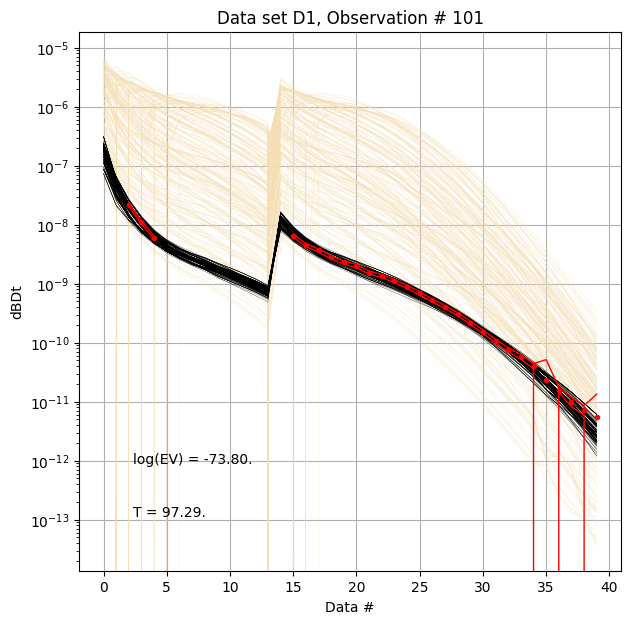

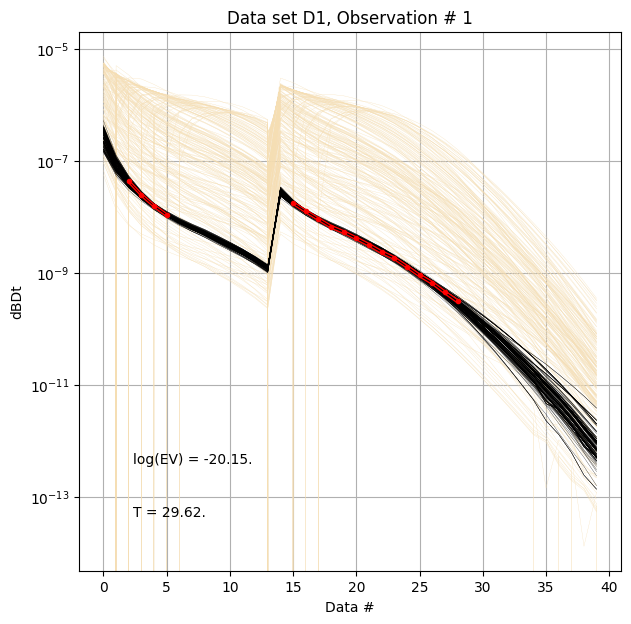

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)

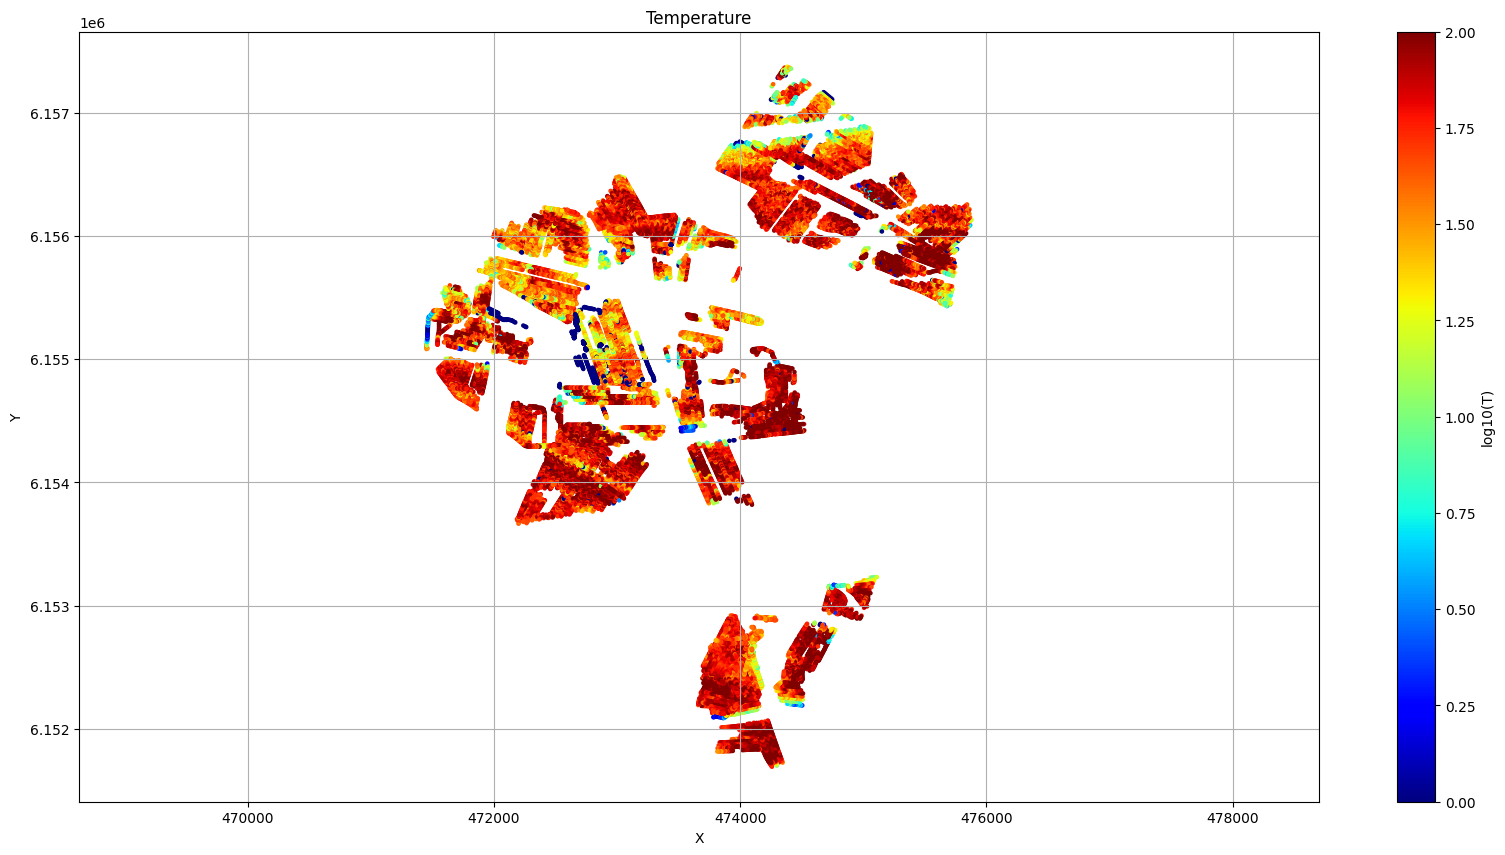

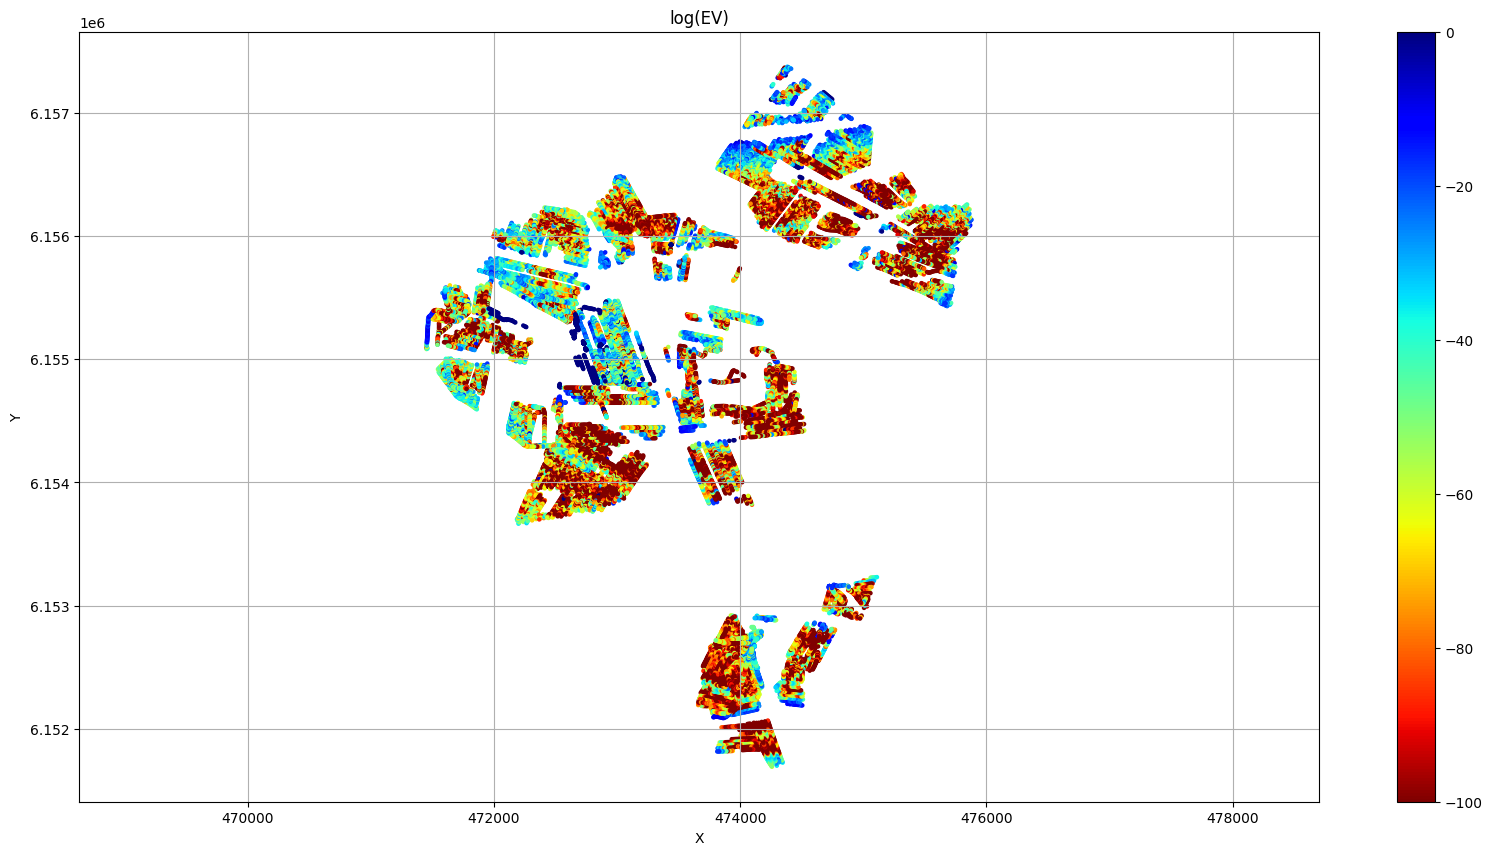

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
# Plot the evidnence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

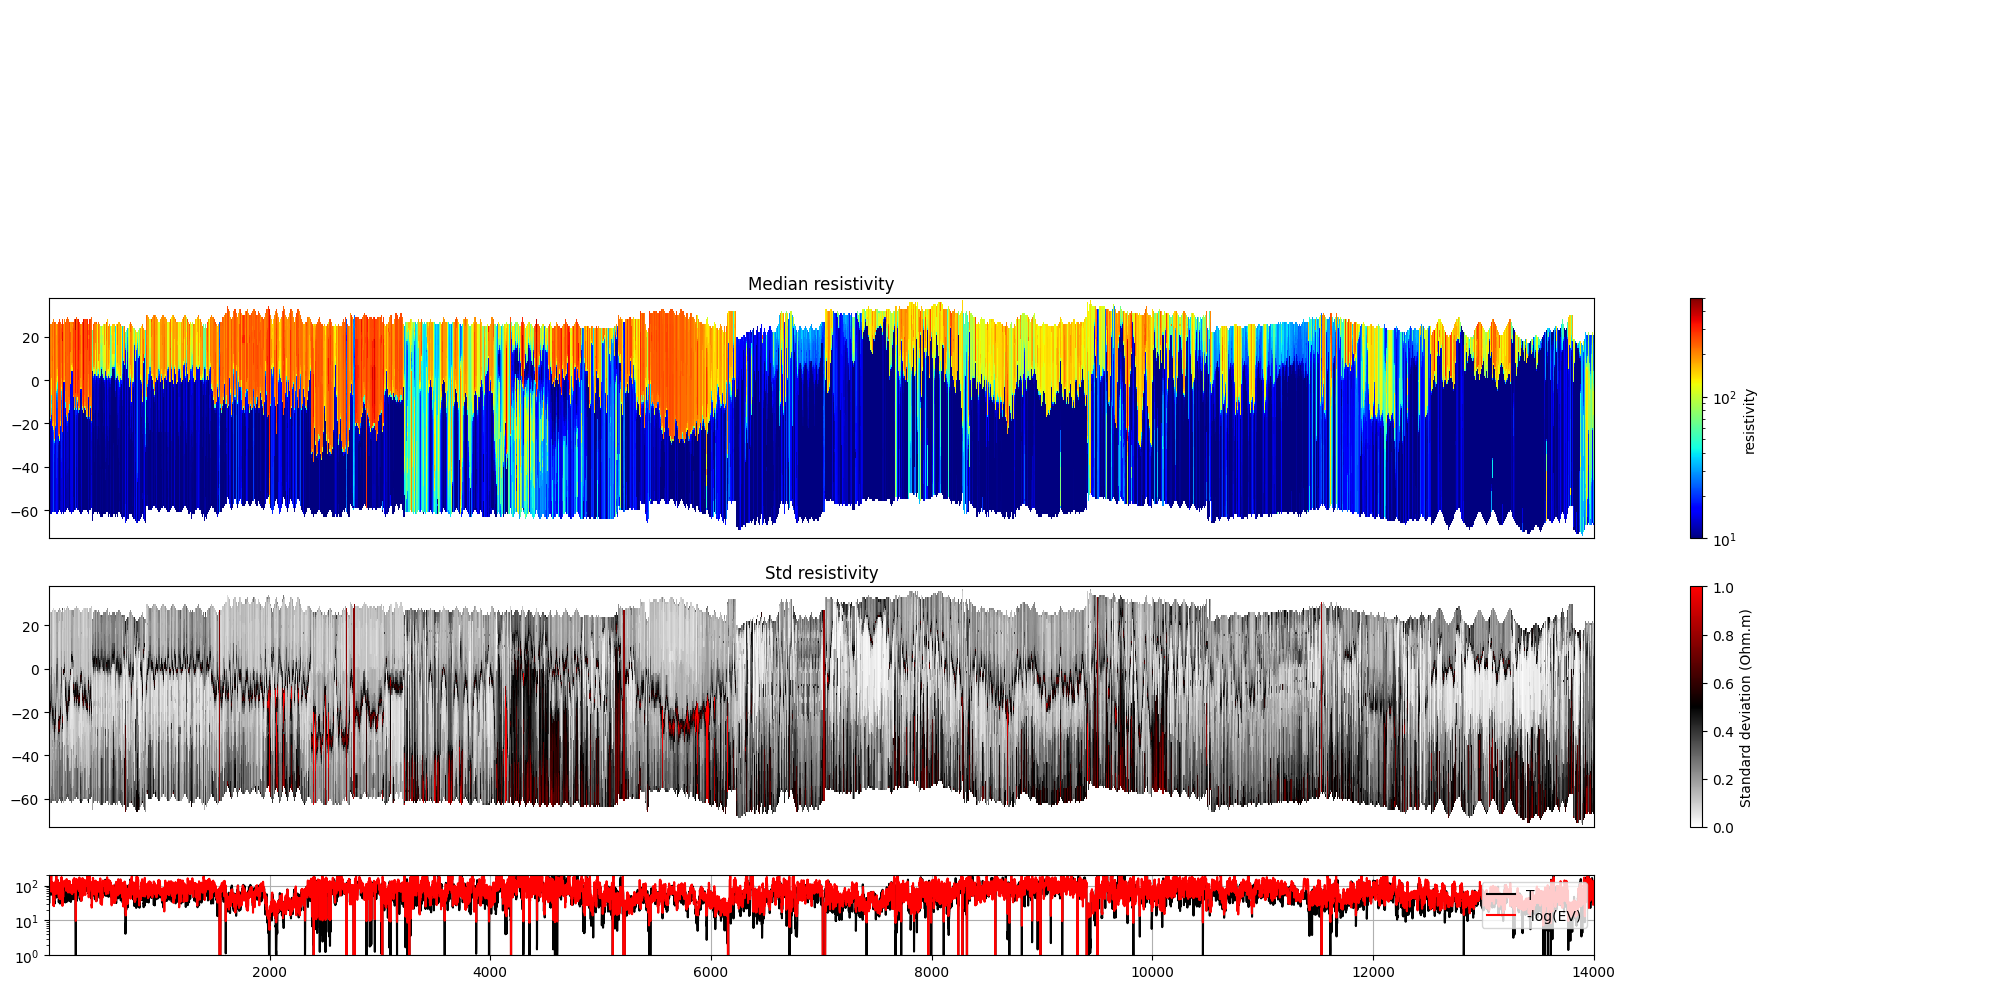

In [10]:
# find index id of data points wher LINE==1000
#i_plot= np.where( np.abs(LINE-1200)<1  )[0]
#ig.plot_profile(f_post_h5, i1=i_plot[0], i2=i_plot[-1], im=1)
ig.plot_profile(f_post_h5, i_plot=10000, i2=14000, im=1, hardcopy=hardcopy)
#ig.plot_profile(f_post_h5, i_plot=0, i2=2000, im=2)h yg sa

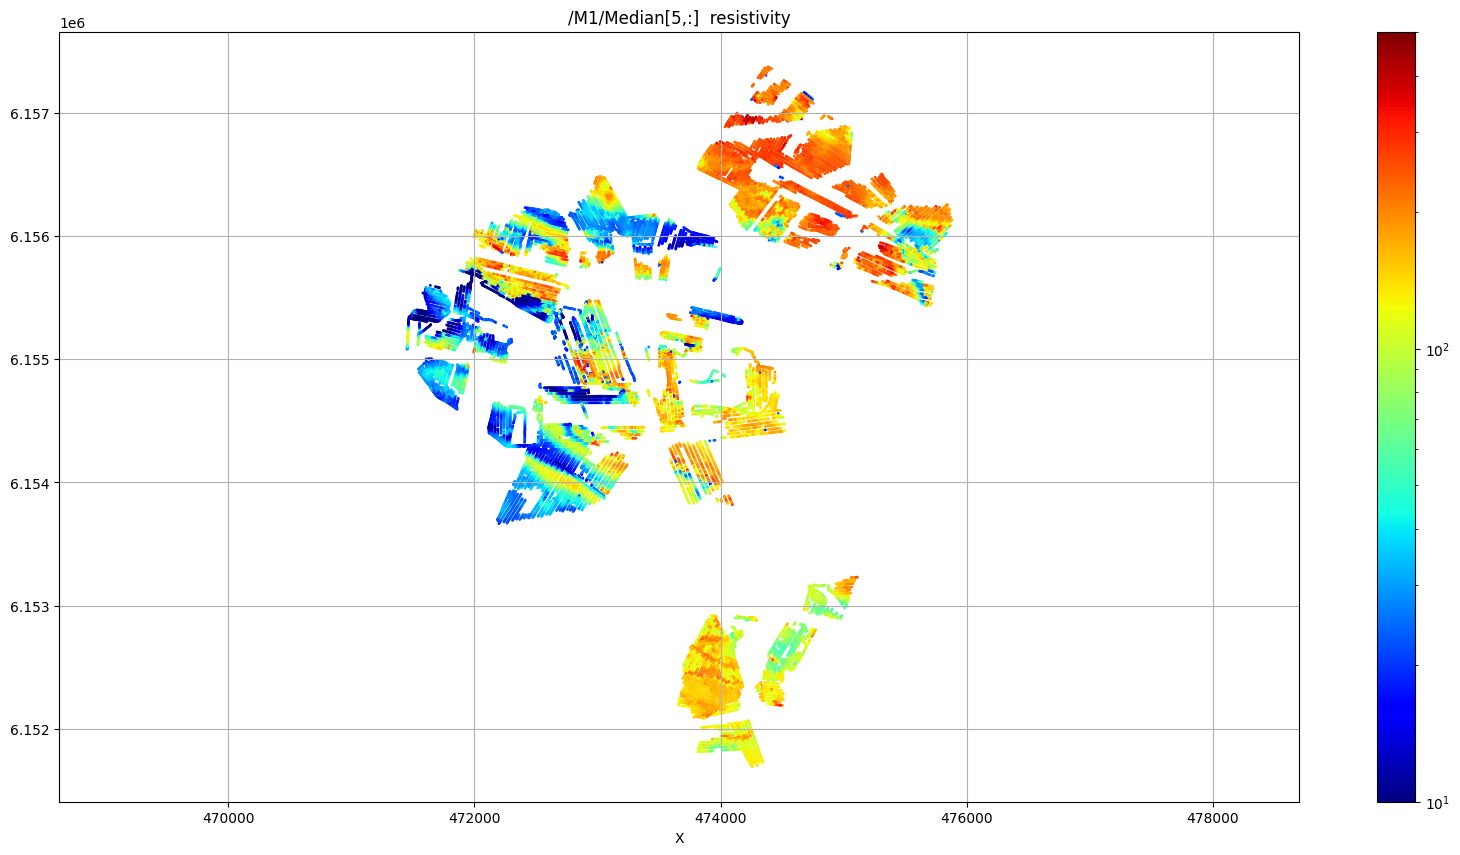

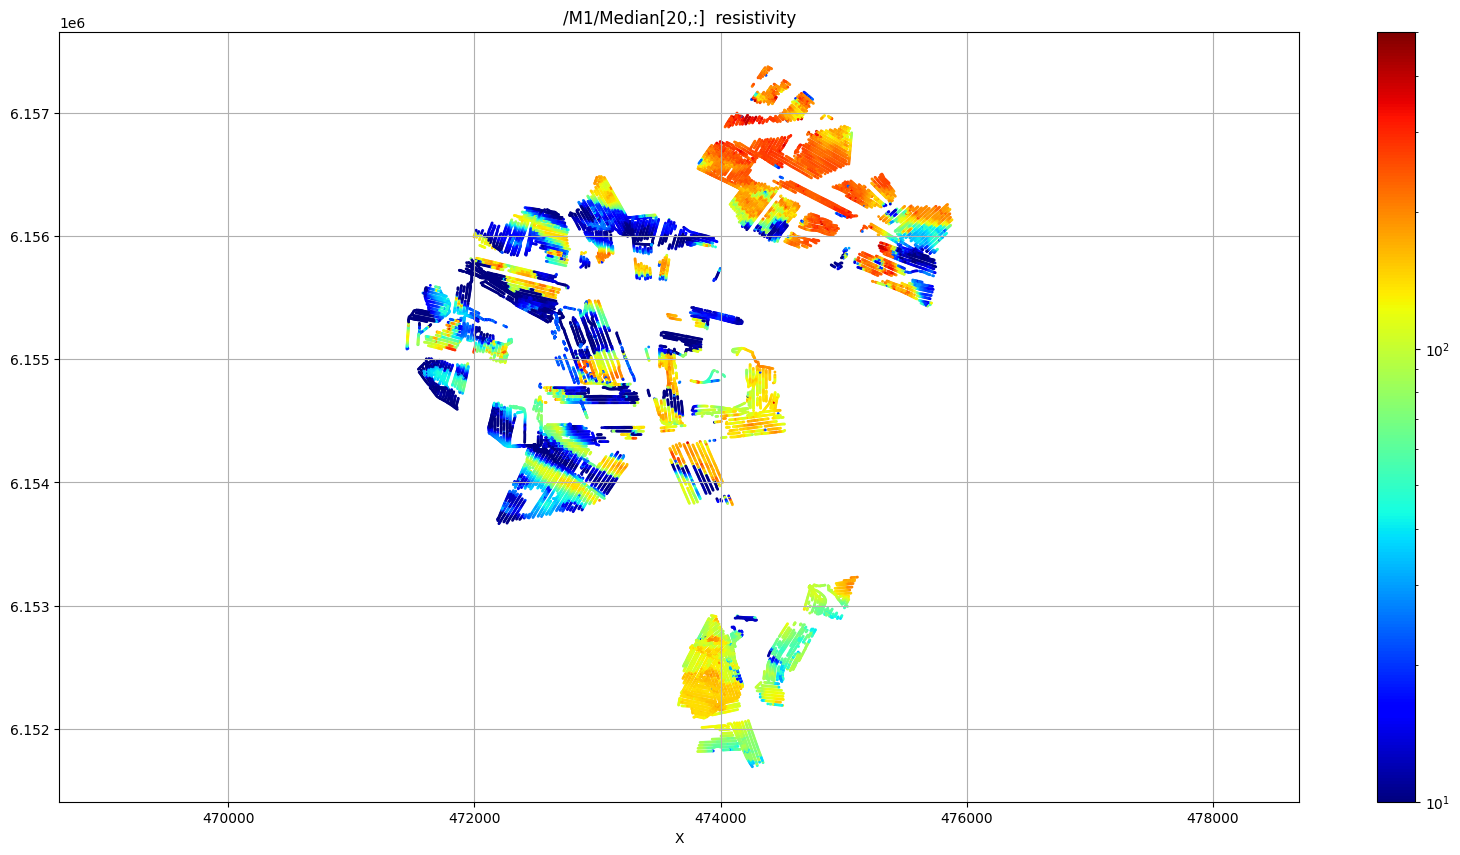

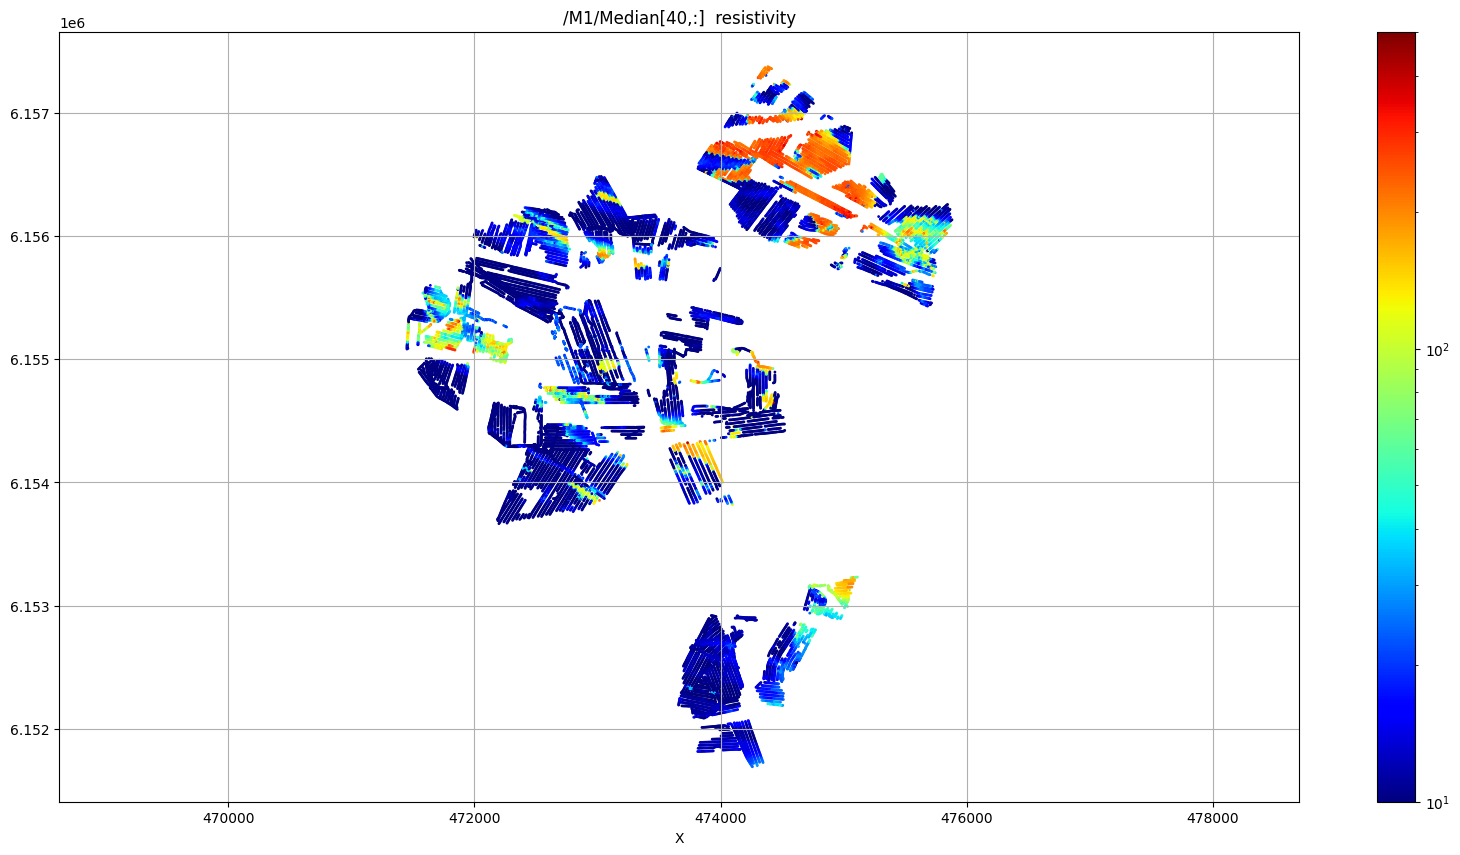

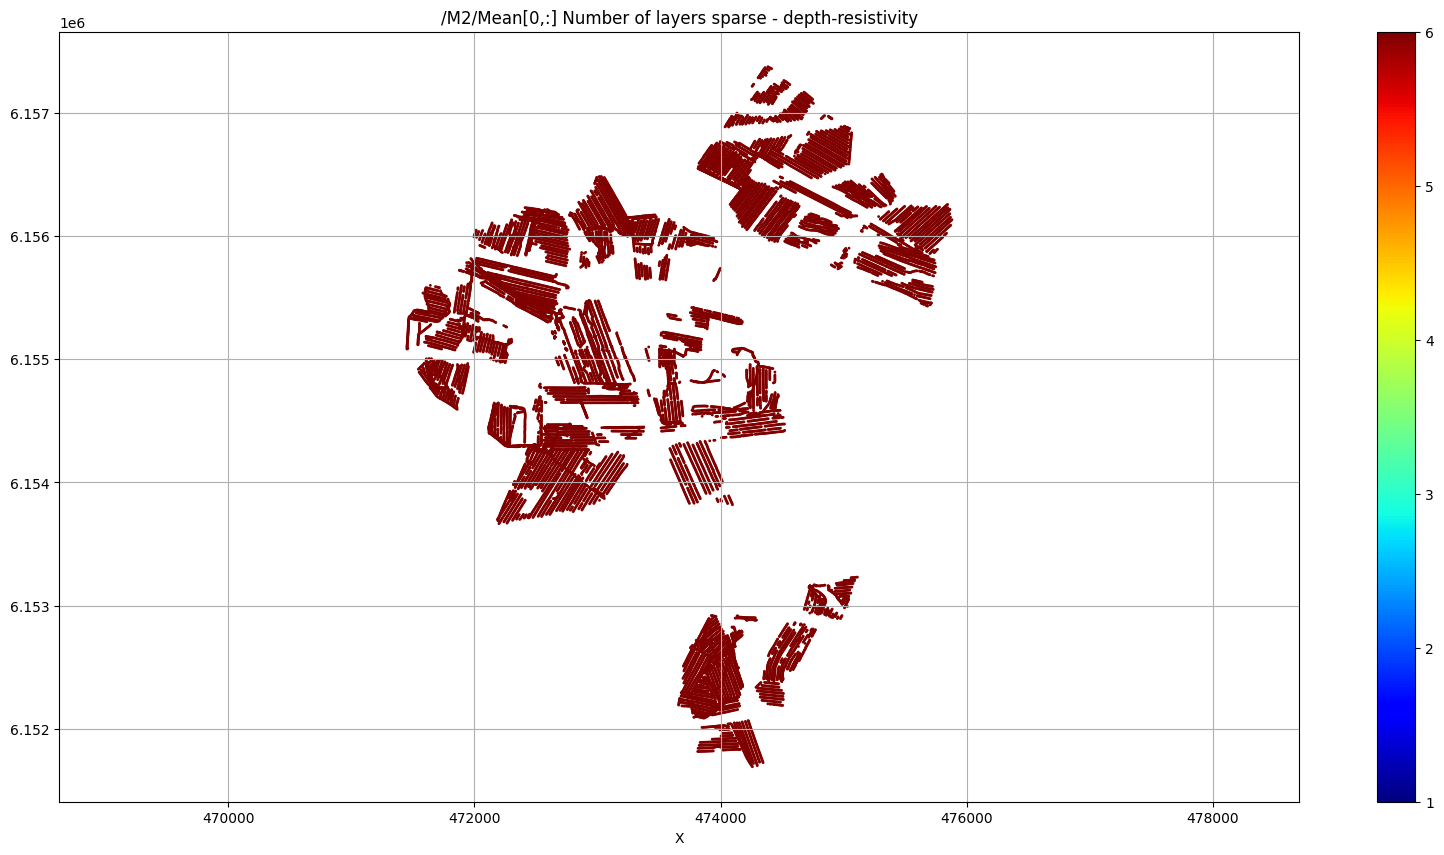

In [11]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=40, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()

#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Mean', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=1, hardcopy=hardcopy)
    plt.show()
except:
    pass

In [12]:
# f_csv, f_point_csv = ig.post_to_csv(f_post_h5)